In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import ROOT 

from tqdm.notebook import tqdm

Welcome to JupyROOT 6.24/06


# Data Aquirement

In [2]:
#Flag for laptop
Laptop = False

In [3]:
#Example for reading a tree from a single root-file
#inFile = ROOT.TFile.Open("1/GammaCaloMergedML_1540.root", "READ")
#tree = inFile.Get("00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Pio")

#Reading out a RDataFrame, works well for everything simple Int and float
#df = ROOT.RDataFrame("00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Pio", "1/GammaCaloMergedML_1540.root")
#ClusterType = df.AsNumpy(columns=["Cluster"])
#print(ClusterType)

In [4]:
#Creates a list filled with a TChain for every tree that should be read out
#The location of all root-files is needed as input, written in a file, one path per line
#Takes a list of the names of all trees
def create_chains(filelist, tree_name):
    f = open(filelist, "r")
    chainlist = []
    for name in tree_name:        
        chainlist.append(ROOT.TChain(name))
        
    
    print("Path to all root-files:")    
    for line in f:
        path = line.strip()
        print("{}".format(path))
        for i in range(len(tree_name)):
            chainlist[i].Add("{}".format(path))
    
    print()
    for i in range(len(tree_name)):
        print("Number of clusters in {}: {}".format(tree_name[i], chainlist[i].GetEntries()))
    f.close()
    return chainlist

In [5]:
#List with names of the trees
Tree_Name = ["00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Pio"
            ,"00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Eta"
            ,"00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Bck"]

In [6]:
if Laptop:
    Chain_laptop = create_chains("/home/jhonerma/ALICE_Train_Output/MergedMLPath.txt", Tree_Name)

In [7]:
if not Laptop:
    Chain_pi0 = create_chains("/media/DATA/ALICE_Train_Output/MergedMLPath_pi0.txt", Tree_Name)

Path to all root-files:
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17d18_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17d3_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17e5_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17d17_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17f5_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17d16_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4105_20210917-1114/Child1/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4105_20210917-1114/Child3/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4105_20210917-1114/Child2/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4105_20210917-1114/Child4/GammaCalo

In [8]:
if not Laptop:
    Chain_eta_bck = create_chains("/media/DATA/ALICE_Train_Output/MergedMLPath_etabck.txt", Tree_Name)

Path to all root-files:
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17d18_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17d3_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17e5_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17d17_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17f5_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4104_20210917-1114/LHC17d16_extra_GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4105_20210917-1114/Child1/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4105_20210917-1114/Child6/003/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4105_20210917-1114/Child6/002/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_4105_20210917-1114/Child6/0

In [9]:
#Print the first entry as an example
if Laptop:
    Chain_laptop[0].Show(0)
else:
    Chain_pi0[0].Show(0)

======> EVENT:0
 ClusterCellN    = 6
 Cluster         = 4.36412, 
                  0.415503, 0.205074, 0.186091, 0.256328, 0.61237
 ClusterTiming   = 6.17307e-07, 
                  6.17149e-07, 6.12308e-07, 6.15526e-07, 6.08208e-07, 6.20166e-07
 ClusterType     = 2
 ClusterE        = 6.78114
 ClusterPt       = 5.88902
 ClusterModuleNumber = 18, 
                  18, 18, 18, 18, 18
 ClusterCol      = 8, 
                  8, 7, 9, 9, 8
 ClusterRow      = 4, 
                  3, 4, 4, 5, 5
 ClusterDistFromVert = 518.416
 PartIsPrimary   = 1
 PartPID         = 111
 PartPt          = 5.55803
 PartE           = 6.40002
 PartEta         = 0.543717
 PartPhi         = 5.65424
 ClusterM02      = 0.486842
 PartM20         = 0.237428


In [10]:
def readout_chain(chain, part):
    print("----------------------------------------")
    print("--------- Start reading out "+part+" --------\n")
    nentries = chain.GetEntries()
    
    # Get size of cluster first, to set up the size of further arrays
    ClusterN = np.zeros((nentries), dtype=np.ubyte)
    _clusterN = np.zeros((1), dtype=np.ubyte)
    chain.SetBranchAddress("ClusterCellN", _clusterN)
    
    print("Reading out branch ClusterN")
    for i in tqdm(range(nentries)):
        chain.GetEntry(i)
        ClusterN[i] = _clusterN
    
    maxClusN = int(np.max(ClusterN))
    
    print("Setting up arrays")
    # arrays for the data
    Cluster = np.empty((nentries, maxClusN), dtype=np.float32)
    Cluster[:] = np.NaN
    ClusterTiming = np.empty((nentries, maxClusN), dtype=np.float32)
    ClusterTiming[:] = np.NaN
    ClusterType = np.zeros((nentries), dtype=np.ubyte)
    ClusterE = np.zeros((nentries), dtype=np.float32)
    ClusterPt = np.zeros((nentries), dtype=np.float32)
    # There currently is no NaN for integer, so a too large value is used for non-entries
    # max s-mod =17, max row=23, max col =47
    ClusterModuleNumber = np.full((nentries, maxClusN), 100, dtype=np.ubyte)    
    ClusterCol = np.full((nentries, maxClusN), 100, dtype=np.ubyte)
    ClusterRow = np.full((nentries, maxClusN), 100, dtype=np.ubyte)
    ClusterM20 = np.zeros((nentries), dtype=np.float32)
    ClusterM02 = np.zeros((nentries), dtype= np.float32)
    ClusterDistFromVert = np.zeros((nentries), dtype=np.float32)
    PartE = np.zeros((nentries), dtype=np.float32)
    PartPt = np.zeros((nentries), dtype=np.float32)
    PartEta = np.zeros((nentries), dtype=np.float32)
    PartPhi = np.zeros((nentries), dtype=np.float32)
    PartIsPrimary = np.zeros((nentries), dtype=bool)
    PartPID = np.zeros((nentries), dtype=np.short)
    
    Width = np.zeros((nentries), dtype=np.ubyte)
    Height = np.zeros((nentries), dtype=np.ubyte)
    
    # Temp Variables to hold the values from each entry
    _Cluster = np.zeros((maxClusN), dtype=np.float32)
    _ClusterTiming = np.zeros((maxClusN), dtype=np.float32)
    _ClusterType = np.zeros((1), dtype=np.ubyte)
    _ClusterE = np.zeros((1), dtype=np.float32)
    _ClusterPt = np.zeros((1), dtype=np.float32)
    _ClusterModuleNumber = np.zeros((maxClusN), dtype=np.ubyte)
    _ClusterCol = np.zeros((maxClusN), dtype=np.ubyte)
    _ClusterRow = np.zeros((maxClusN), dtype=np.ubyte)
    _ClusterM20 = np.zeros((1), dtype=np.float32)
    _ClusterM02 = np.zeros((1), dtype= np.float32)
    _ClusterDistFromVert = np.zeros((1), dtype=np.float32)
    _PartE = np.zeros((1), dtype=np.float32)
    _PartPt = np.zeros((1), dtype=np.float32)
    _PartEta = np.zeros((1), dtype=np.float32)
    _PartPhi = np.zeros((1), dtype=np.float32)
    _PartIsPrimary = np.zeros((1), dtype=bool)
    _PartPID = np.zeros((1), dtype=np.short)
   
    #Set up all the branchaddresses accordingly
    chain.SetBranchAddress("Cluster", _Cluster)
    chain.SetBranchAddress("ClusterTiming", _ClusterTiming)
    chain.SetBranchAddress("ClusterType", _ClusterType)
    chain.SetBranchAddress("ClusterE", _ClusterE)
    chain.SetBranchAddress("ClusterPt", _ClusterPt)
    chain.SetBranchAddress("ClusterModuleNumber", _ClusterModuleNumber)
    chain.SetBranchAddress("ClusterCol", _ClusterCol)
    chain.SetBranchAddress("ClusterRow", _ClusterRow)
    chain.SetBranchAddress("ClusterM20", _ClusterM20)
    chain.SetBranchAddress("ClusterM02", _ClusterM02)
    chain.SetBranchAddress("ClusterDistFromVert", _ClusterDistFromVert)
    chain.SetBranchAddress("PartE", _PartE)
    chain.SetBranchAddress("PartPt", _PartPt)
    chain.SetBranchAddress("PartEta", _PartEta)
    chain.SetBranchAddress("PartPhi", _PartPhi)
    if(part != "bck"):
        chain.SetBranchAddress("PartIsPrimary", _PartIsPrimary)
    chain.SetBranchAddress("PartPID", _PartPID)
    
    #loop over all entries
    print("Reading out all other branches")
    for i in tqdm(range(0, nentries )):
        chain.GetEntry(i)        
        Cluster[i, :ClusterN[i]] = _Cluster[:ClusterN[i]]
        ClusterTiming[i, :ClusterN[i]] = _ClusterTiming[:ClusterN[i]]
        ClusterType[i] = _ClusterType
        ClusterE[i] = _ClusterE
        ClusterPt[i] = _ClusterPt
        ClusterModuleNumber[i, :ClusterN[i]] = _ClusterModuleNumber[:ClusterN[i]]
        ClusterCol[i, :ClusterN[i]] = _ClusterCol[:ClusterN[i]]
        ClusterRow[i, :ClusterN[i]] = _ClusterRow[:ClusterN[i]]
        ClusterM20[i] = _ClusterM20
        ClusterM02[i] = _ClusterM02
        ClusterDistFromVert[i] = _ClusterDistFromVert
        PartE[i] = _PartE
        PartPt[i] = _PartPt
        PartEta[i] = _PartEta
        PartPhi[i] = _PartPhi
        PartIsPrimary[i] = _PartIsPrimary
        PartPID[i] = _PartPID
        
        #calculate cluster width and height
        _clusn = ClusterN[i].copy()
        _col = _ClusterCol[:_clusn].copy()
        _row = _ClusterRow[:_clusn].copy()
        _modnum = _ClusterModuleNumber[:_clusn].copy()
        #adjust row and col number if cluster stretches over several super modules
        if not np.all( _modnum[0] == _modnum):
            ModNumDif = _modnum - np.min(_modnum)
            mask = np.where(ModNumDif == 1)            
            _col[mask] += 48
            mask = np.where(ModNumDif == 2)
            _row[mask] += 24
            mask = np.where(ModNumDif == 3)
            _col[mask] += 48
            _row[mask] += 24
        
        mincol = np.min(_col)
        #The Padding for col, row and supmod have been set to 100, since 0 is a meaningful number
        #Therefore max has to checked with restriction of smaller than max number of row/col
        maxcol = np.max(_col, where= _col<48, initial=0)
        minrow = np.min(_row)
        maxrow = np.max(_row, where= _row<24, initial =0)
        Width[i] = (maxcol - mincol + 1)
        Height[i] = (maxrow - minrow + 1)

    #Put data in dict and return it
    if(part == "bck"):
        dict_cluster = {  "ClusterN" : ClusterN, "ClusterWidth" : Width, "ClusterHeight" : Height
                        , "Cluster" : Cluster, "ClusterTiming" : ClusterTiming
                        , "ClusterType" : ClusterType, "ClusterE" : ClusterE
                        , "ClusterPt" : ClusterPt, "ClusterModuleNumber" : ClusterModuleNumber
                        , "ClusterCol" : ClusterCol, "ClusterRow" : ClusterRow, "ClusterM20" : ClusterM20
                        , "ClusterM02" : ClusterM02, "ClusterDistFromVert" : ClusterDistFromVert
                        , "PartE" : PartE, "PartPt" : PartPt, "PartEta" : PartEta
                        , "PartPhi" : PartPhi, "PartPID" : PartPID}
    else:
        dict_cluster = {  "ClusterN" : ClusterN, "ClusterWidth" : Width, "ClusterHeight" : Height
                        , "Cluster" : Cluster, "ClusterTiming" : ClusterTiming
                        , "ClusterType" : ClusterType, "ClusterE" : ClusterE
                        , "ClusterPt" : ClusterPt, "ClusterModuleNumber" : ClusterModuleNumber
                        , "ClusterCol" : ClusterCol, "ClusterRow" : ClusterRow, "ClusterM20" : ClusterM20
                        , "ClusterM02" : ClusterM02, "ClusterDistFromVert" : ClusterDistFromVert
                        , "PartE" : PartE, "PartPt" : PartPt, "PartEta" : PartEta
                        , "PartPhi" : PartPhi, "PartIsPrimary" : PartIsPrimary, "PartPID" : PartPID}
    
    print("------- Finished reading out "+part+" -------")
    print("----------------------------------------")
    print()
    return dict_cluster

In [11]:
#Read out all information from the trees and store it in dicts
if Laptop:
    pi0 = readout_chain(Chain_laptop[0], "pi0")
    eta = readout_chain(Chain_laptop[1], "eta")
    bck = readout_chain(Chain_laptop[2], "bck")
else:
    pi0 = readout_chain(Chain_pi0[0], "pi0")
    eta = readout_chain(Chain_eta_bck[1], "eta")
    bck = readout_chain(Chain_eta_bck[2], "bck")

----------------------------------------
--------- Start reading out pi0 --------

Reading out branch ClusterN


  0%|          | 0/10728013 [00:00<?, ?it/s]

Setting up arrays
Reading out all other branches


  0%|          | 0/10728013 [00:00<?, ?it/s]

------- Finished reading out pi0 -------
----------------------------------------

----------------------------------------
--------- Start reading out eta --------

Reading out branch ClusterN


  0%|          | 0/7405120 [00:00<?, ?it/s]

Setting up arrays
Reading out all other branches


  0%|          | 0/7405120 [00:00<?, ?it/s]

------- Finished reading out eta -------
----------------------------------------

----------------------------------------
--------- Start reading out bck --------

Reading out branch ClusterN


  0%|          | 0/11417448 [00:00<?, ?it/s]

Setting up arrays
Reading out all other branches


  0%|          | 0/11417448 [00:00<?, ?it/s]

------- Finished reading out bck -------
----------------------------------------



# General Statistic

In [12]:
# prints averages and standard deviation for various properties
# aswell as minimum and mixamum values of each property
def print_stats(dict_list):
    for i, dic in enumerate(dict_list):
        print("============================= {} =============================".format(names[i]))
        print()
        print("Number of merged clusters: {}".format(len(dic["ClusterType"])))
        print()
        
        print("---------------- Clusters -----------------")        
        print("Average Size of Clusters: {0:5.2f} \u00B1 {1:5.2f}".format(np.average(dic["ClusterN"]), np.std( dic["ClusterN"] )))
        print("Min Size of Clusters: {0:2d}   Max. Size of Clusters: {1:2d}".format(np.min( dic["ClusterN"]) ,np.max( dic["ClusterN"])) )
        print("Average Height of Clusters: {0:5.2f} \u00B1 {1:5.2f}".format(np.average(dic["ClusterHeight"]), np.std(dic["ClusterHeight"])))
        print("Min Height of Clusters: {0:2d}   Max. Height of Clusters: {1:2d}".format(np.min(dic["ClusterHeight"]) ,np.max(dic["ClusterHeight"])) )
        print("Average Width of Clusters: {0:5.2f} \u00B1 {1:5.2f}".format(np.average(dic["ClusterWidth"]), np.std(dic["ClusterWidth"])))
        print("Min Width of Clusters: {0:2d}   Max. Width of Clusters: {1:2d}".format(np.min(dic["ClusterWidth"]) ,np.max(dic["ClusterWidth"]))) 
        print("Average Dist from Vertex: {0:5.2f} \u00B1 {1:5.2f} cm".format(np.average(dic["ClusterDistFromVert"]), np.std( dic["ClusterDistFromVert"] )))
        print("Min Dist from Vert: {0:5.2f} cm   Max. Dist from Vert: {1:5.2f} cm".format(np.min( dic["ClusterDistFromVert"]) ,np.max( dic["ClusterDistFromVert"])) )
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Cluster Energy", np.average(dic["ClusterE"]), np.std(dic["ClusterE"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Cluster Energy", np.min(dic["ClusterE"]), np.max(dic["ClusterE"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Cluster Pt", np.average(dic["ClusterPt"]), np.std(dic["ClusterPt"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Cluster Pt", np.min(dic["ClusterPt"]), np.max(dic["ClusterPt"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Cluster M02", np.average(dic["ClusterM02"]), np.std(dic["ClusterM02"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Cluster M02", np.min(dic["ClusterM02"]), np.max(dic["ClusterM02"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Cluster M20", np.average(dic["ClusterM20"]), np.std(dic["ClusterM20"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Cluster M20", np.min(dic["ClusterM20"]), np.max(dic["ClusterM20"])))
        print()
        
        print("---------------- Particles ----------------")
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Particle Energy", np.average(dic["PartE"]), np.std(dic["PartE"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Particle Energy", np.min(dic["PartE"]), np.max(dic["PartE"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Particle Pt", np.average(dic["PartPt"]), np.std(dic["PartPt"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Particle Pt", np.min(dic["PartPt"]), np.max(dic["PartPt"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f}".format("Particle Eta", np.average(dic["PartEta"]), np.std(dic["PartEta"])))
        print("Min. {0}: {1:5.2f}    Max. {0}: {2:5.2f}".format("Particle Eta", np.min(dic["PartEta"]), np.max(dic["PartEta"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f}".format("Particle Phi", np.average(dic["PartPhi"]), np.std(dic["PartPhi"])))
        print("Min. {0}: {1:5.2f}    Max. {0}: {2:5.2f}".format("Particle Phi", np.min(dic["PartPhi"]), np.max(dic["PartPhi"])))
        print()
        print()

In [13]:
labels = [r"$\pi_0$", r"$\eta$","Bck"]
dicts = [pi0, eta, bck]
names = ['\u03C0'+'0', '\u03B7', 'Bck']

In [14]:
print_stats(dicts)

============================= π0 =============================

Number of merged clusters: 10728013

---------------- Clusters -----------------
Average Size of Clusters:  8.33 ±  5.05
Min Size of Clusters:  2   Max. Size of Clusters: 71
Average Height of Clusters:  3.63 ±  1.44
Min Height of Clusters:  1   Max. Height of Clusters: 16
Average Width of Clusters:  3.23 ±  1.30
Min Width of Clusters:  1   Max. Width of Clusters: 14
Average Dist from Vertex: 477.75 ± 25.69 cm
Min Dist from Vert: 438.91 cm   Max. Dist from Vert: 542.70 cm
Average Cluster Energy: 18.26 ± 21.11 GeV
Min. Cluster Energy:  6.36 GeV   Max. Cluster Energy: 2439.87 GeV
Average Cluster Pt: 17.10 ± 19.75 GeV
Min. Cluster Pt:  5.36 GeV   Max. Cluster Pt: 2171.38 GeV
Average Cluster M02:  0.56 ±  0.33 GeV
Min. Cluster M02:  0.10 GeV   Max. Cluster M02:  5.82 GeV
Average Cluster M20:  0.22 ±  0.13 GeV
Min. Cluster M20: -0.00 GeV   Max. Cluster M20:  1.78 GeV

---------------- Particles ----------------
Average Particle 

# Plots

In [15]:
#Unify size of plots
plt.rcParams['figure.dpi'] = 300

def single_plot():
    plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    return ax

def cl_plot():
    plt.rcParams['figure.figsize'] = [48/2.54, 16/2.54]
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    return fig, axs

## Cluster

In [16]:
def z_score(data):
    mean = np.nanmean(data)
    std = np.nanstd(data)
    return (data - mean) / std 

def norm(data):
    return data/np.nanmax(data)

In [17]:
def reconstruct_cluster(ncell, modnum, row, col, data, arrsize=20):
    #Adjust row and column numbers if cluster strechtes over several smodules
    if not np.all( modnum[0] == modnum[:ncell]):
        ModNumDif = modnum - np.min(modnum[:ncell])
        mask = np.where(ModNumDif == 1)
        col[mask] += 48
        mask = np.where(ModNumDif == 2)
        row[mask] += 24
        mask = np.where(ModNumDif == 3)
        row[mask] += 24
        col[mask] += 48

    arr = np.zeros((arrsize,arrsize))
    
    #calculate width and height of cluster
    col_min = np.nanmin(col[:ncell])
    row_min = np.nanmin(row[:ncell])
    width = np.nanmax(col[:ncell]) - col_min
    height = np.nanmax(row[:ncell]) - row_min
    #Calculate values to centre cluster in 2d array
    offset_h = int((arrsize-height)/2)
    offset_w = int((arrsize-width)/2)
        
    #reconstruct cluster    
    for i in range(ncell):
        arr[ row[i] - row_min + offset_h, col[i] - col_min + offset_w ] = data[i]
   
    return arr

In [18]:
def plot_cluster(dic, title, key, norm01=False):
    #Number of plots
    Num = 16
    
    #Create Num random numbers within a range of nentries
    rand = np.random.randint(0,dic["ClusterN"].shape[0], size=Num)
    
    #Get necessary values from dict
    ncell = dic["ClusterN"][rand].copy()
    supmod = dic["ClusterModuleNumber"][rand].copy()
    row = dic["ClusterRow"][rand].copy()
    col = dic["ClusterCol"][rand].copy()
    data = dic[key][rand].copy()
    
    if norm01:
        data = norm(data)
    
    #empty list to hold arrays
    arrs = []
    
    #reconstruct the cluster
    for i in range(Num):
        arr = reconstruct_cluster(ncell[i], supmod[i], row[i], col[i], data[i], arrsize=10)
        arrs.append(arr)

    arrs = np.asarray(arrs, dtype=np.float32)
    
    #Plot
    pCols = 4
    pRows = int(np.ceil(Num/pCols))
    

    max_d = np.nanmax(data)
    
    fig, axs = plt.subplots(pRows, pCols, figsize=(12,12), subplot_kw={'xticks': [], 'yticks': []}, constrained_layout=True)
    
    for i, ax in enumerate(axs.flat):
        im = ax.imshow(arrs[i], cmap='viridis', vmin=0, vmax=max_d*0.6) #, interpolation='catrom'
    
    if key == "Cluster":
        label_cb = "Energy [GeV]"
    if key == "ClusterTiming":
        label_cb = "Time [s]"
    
    fig.colorbar(im, ax=axs.ravel().tolist(), label=label_cb)
    plt.suptitle("Merged {0} Clusters in 13TeV pp-collision".format(title))

    plt.savefig("Plots/mergedcluster_"+title+key+".pdf", dpi=300, bbox_inches='tight')

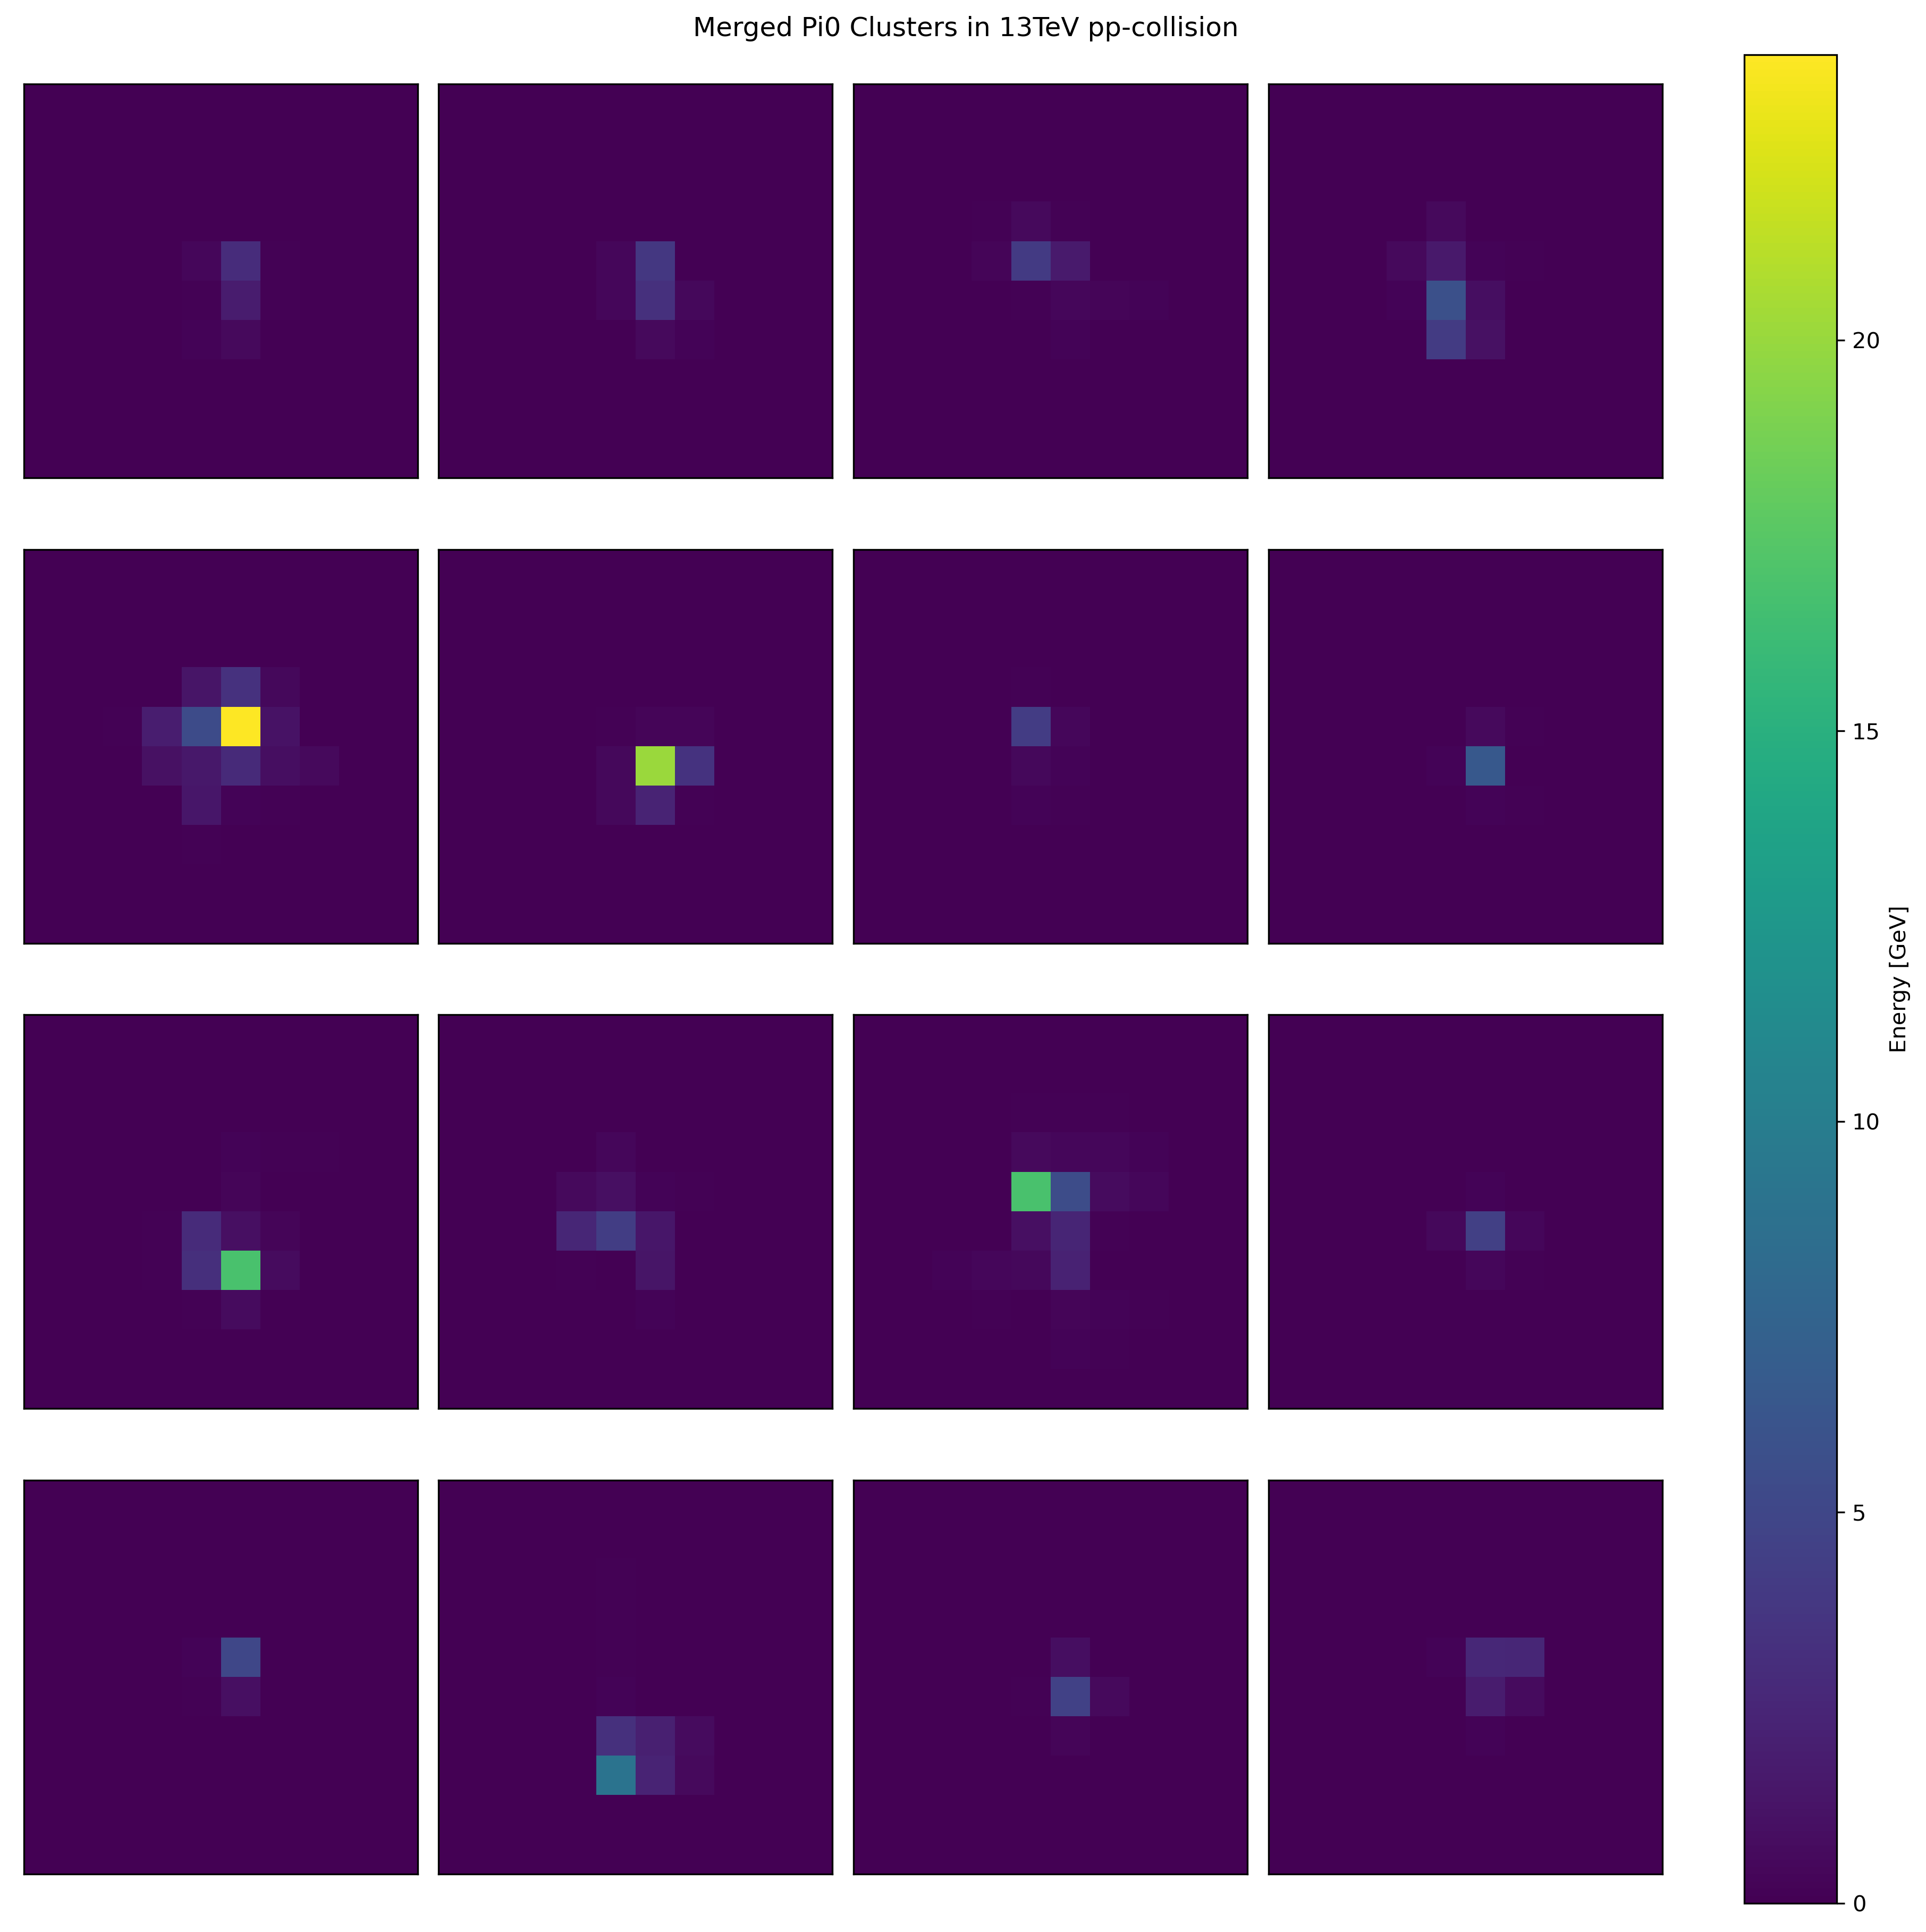

In [19]:
plot_cluster(pi0, "Pi0", "Cluster")

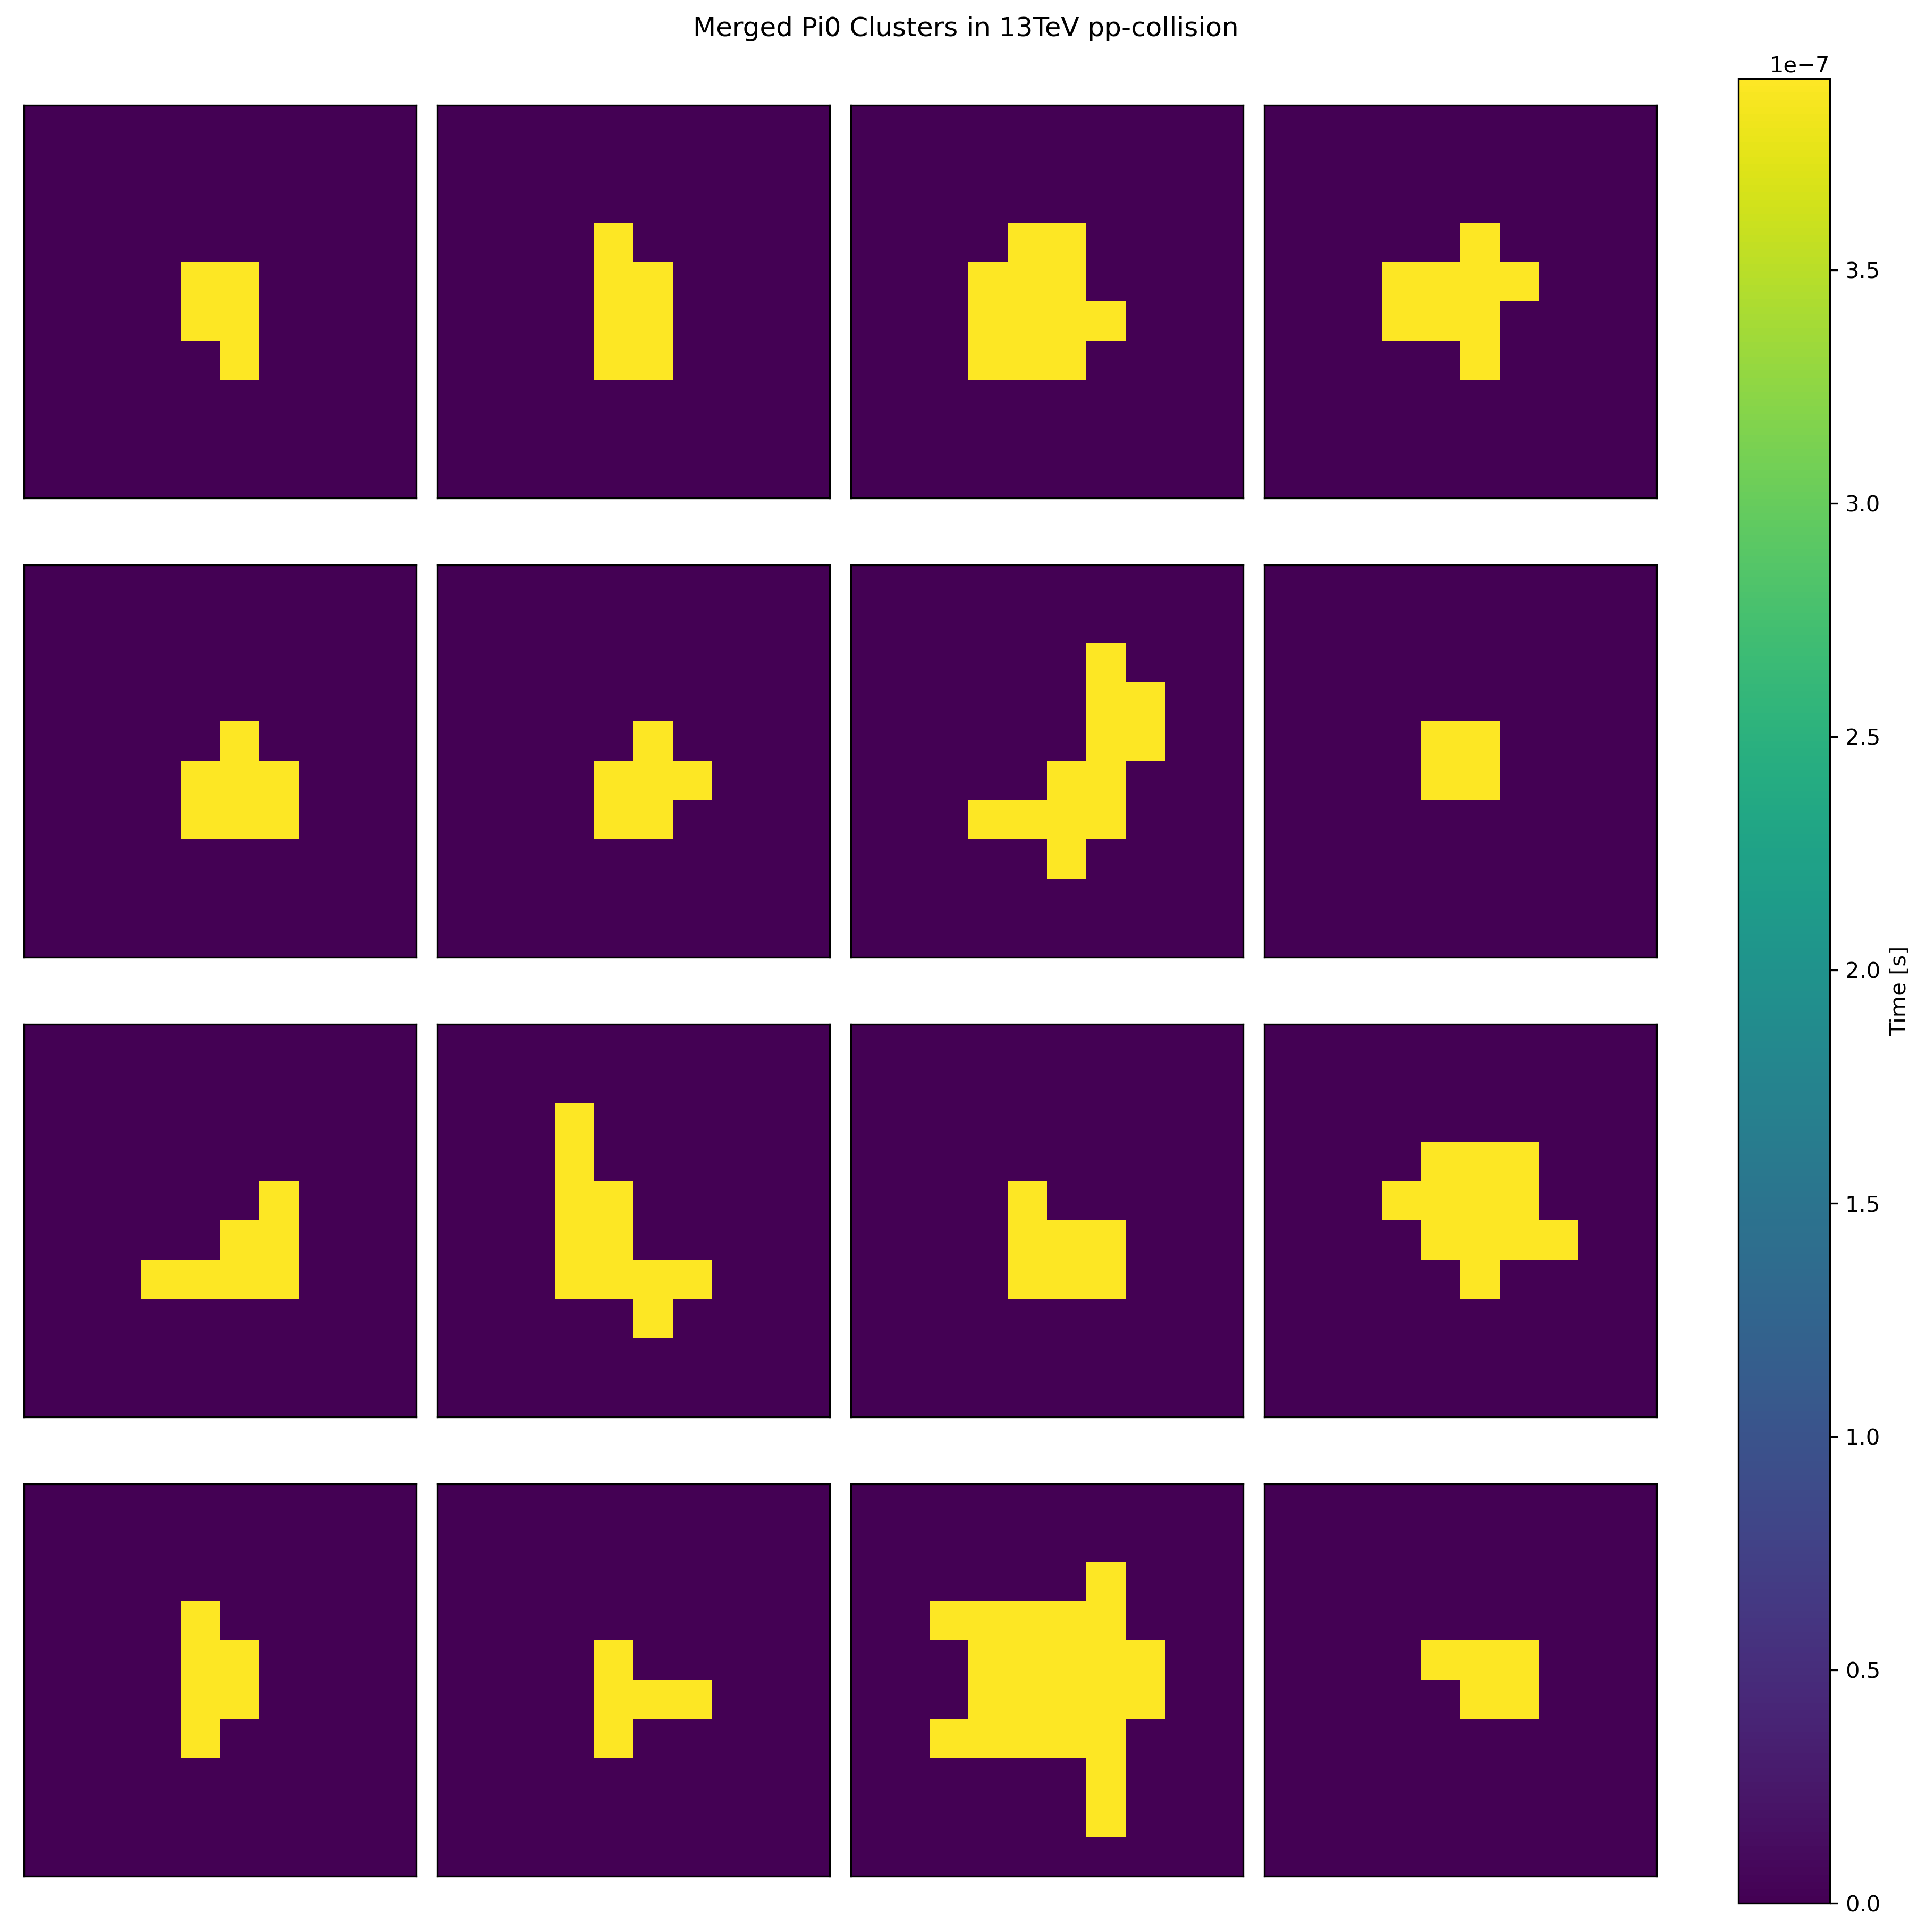

In [20]:
plot_cluster(pi0, "Pi0", "ClusterTiming")

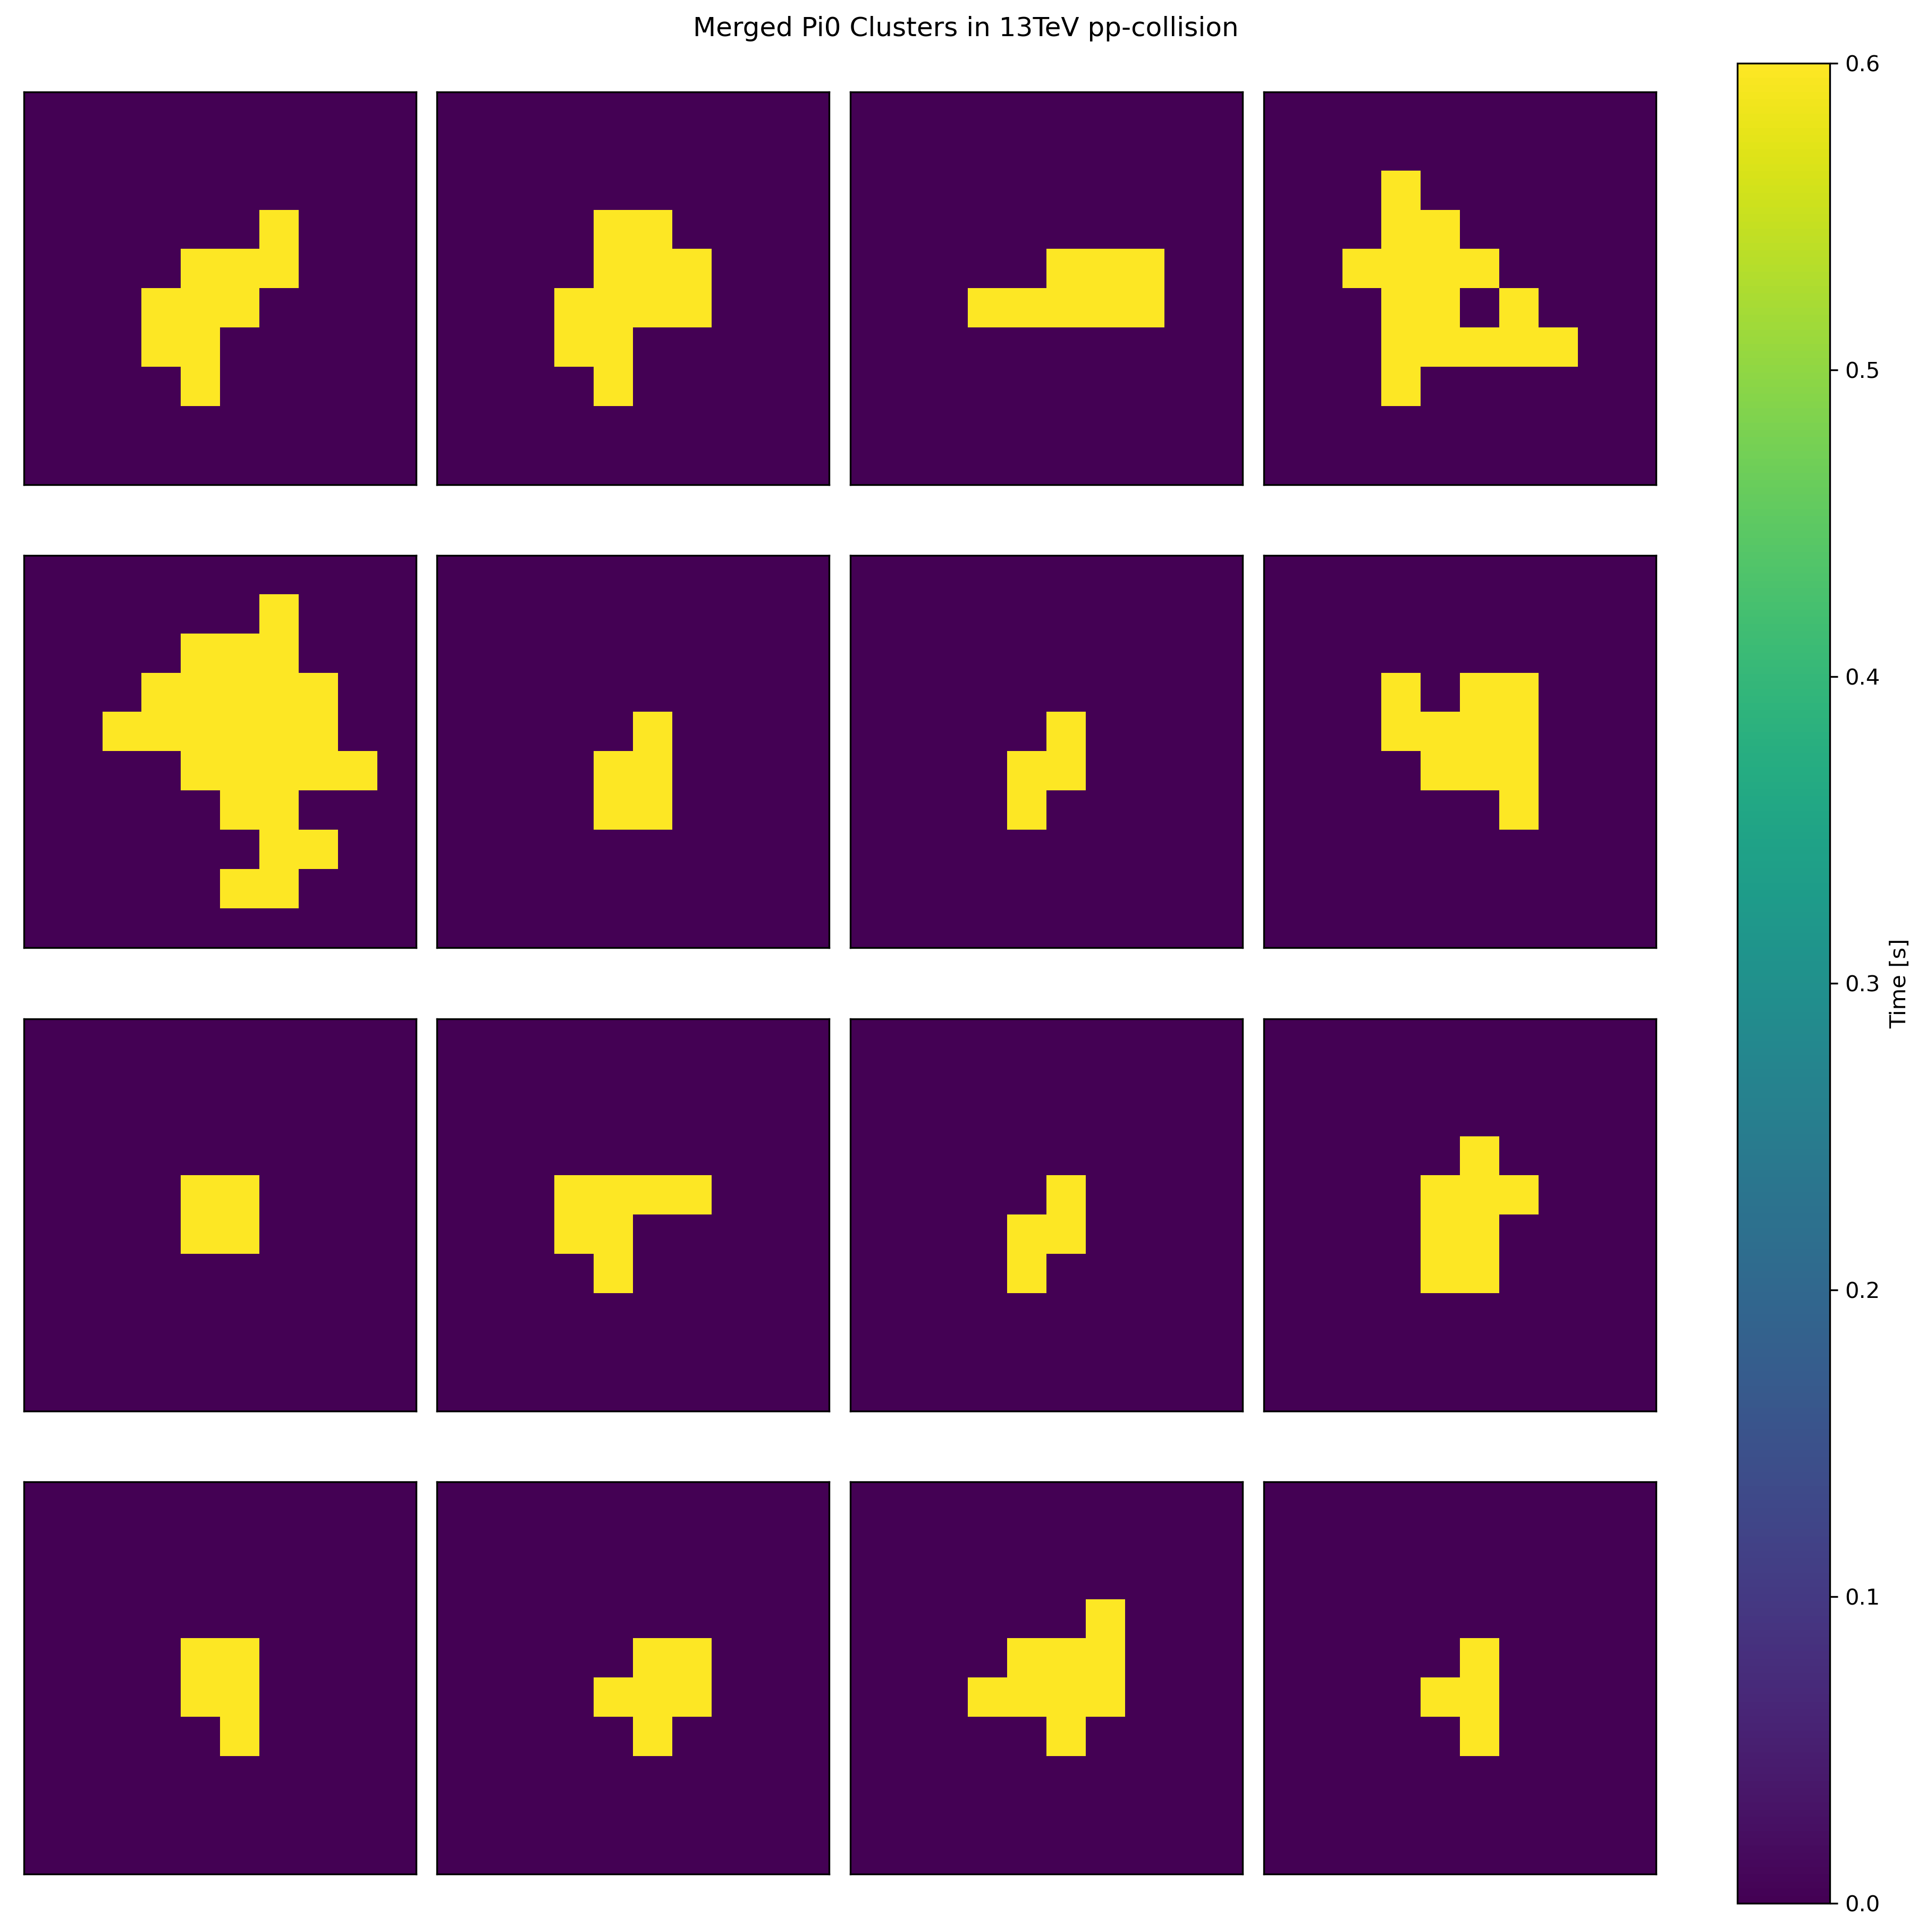

In [21]:
plot_cluster(pi0, "Pi0", "ClusterTiming", norm01=True)

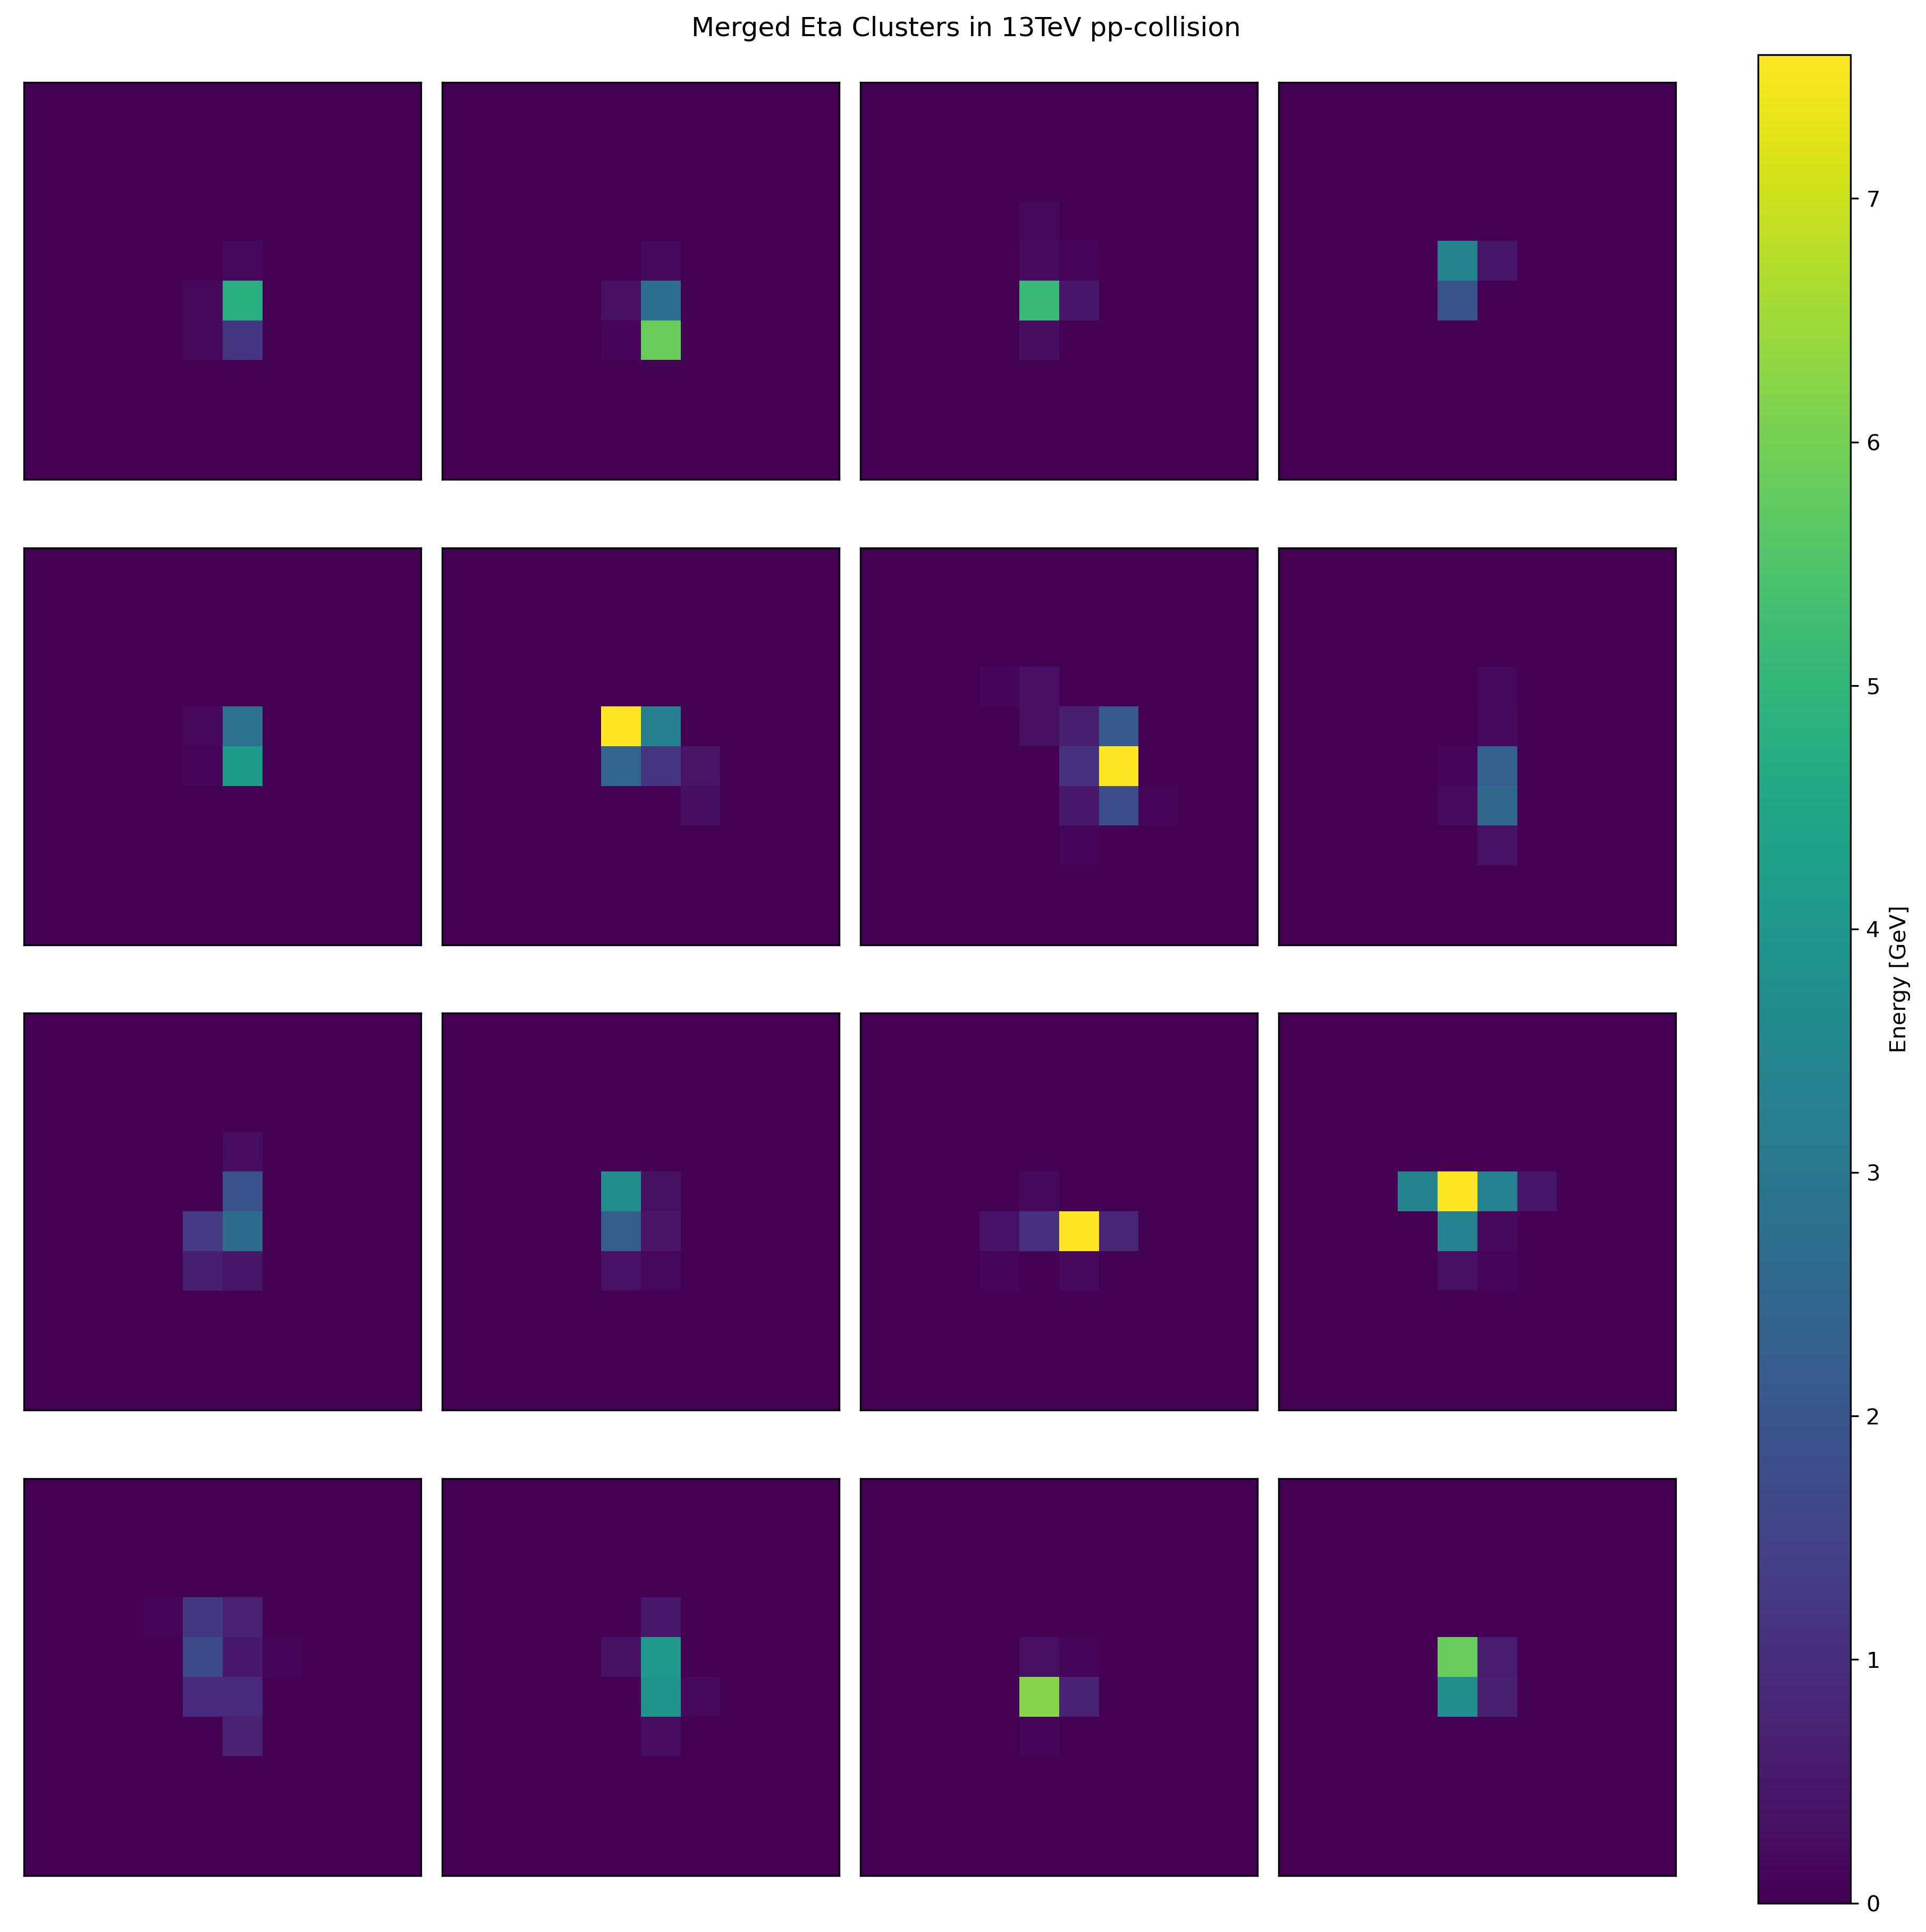

In [22]:
plot_cluster(eta, "Eta", "Cluster")

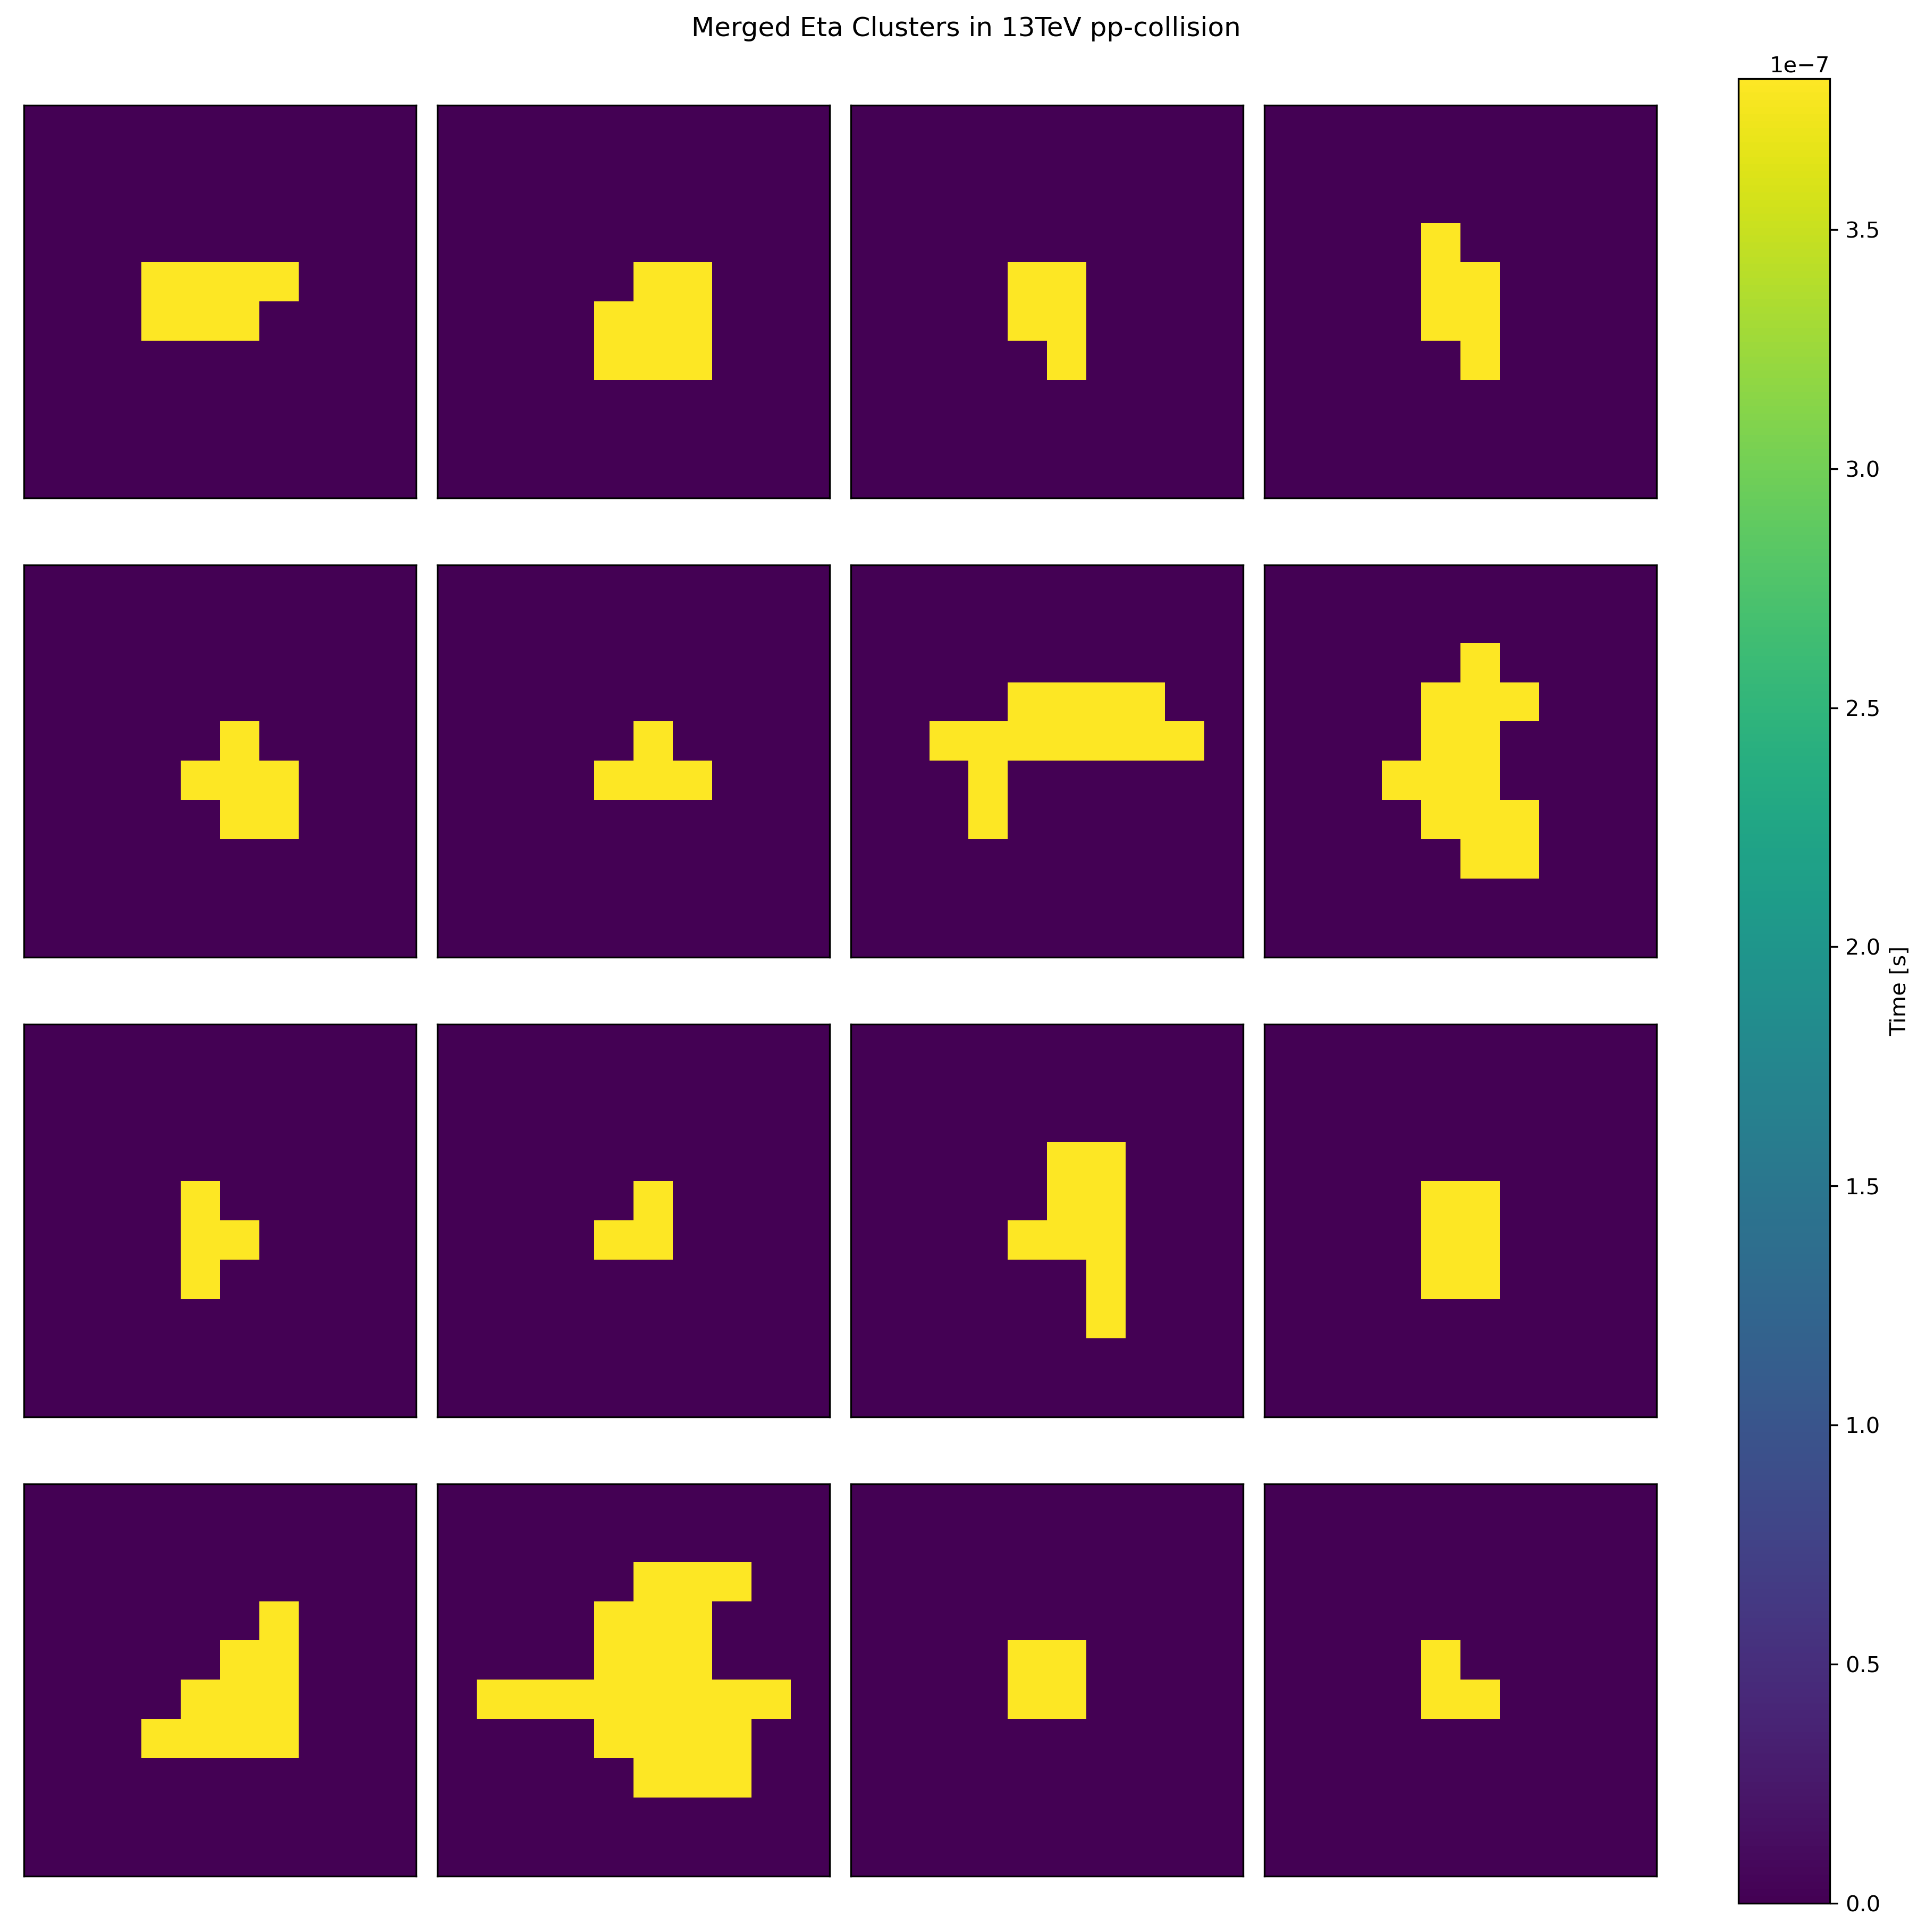

In [23]:
plot_cluster(eta, "Eta", "ClusterTiming")

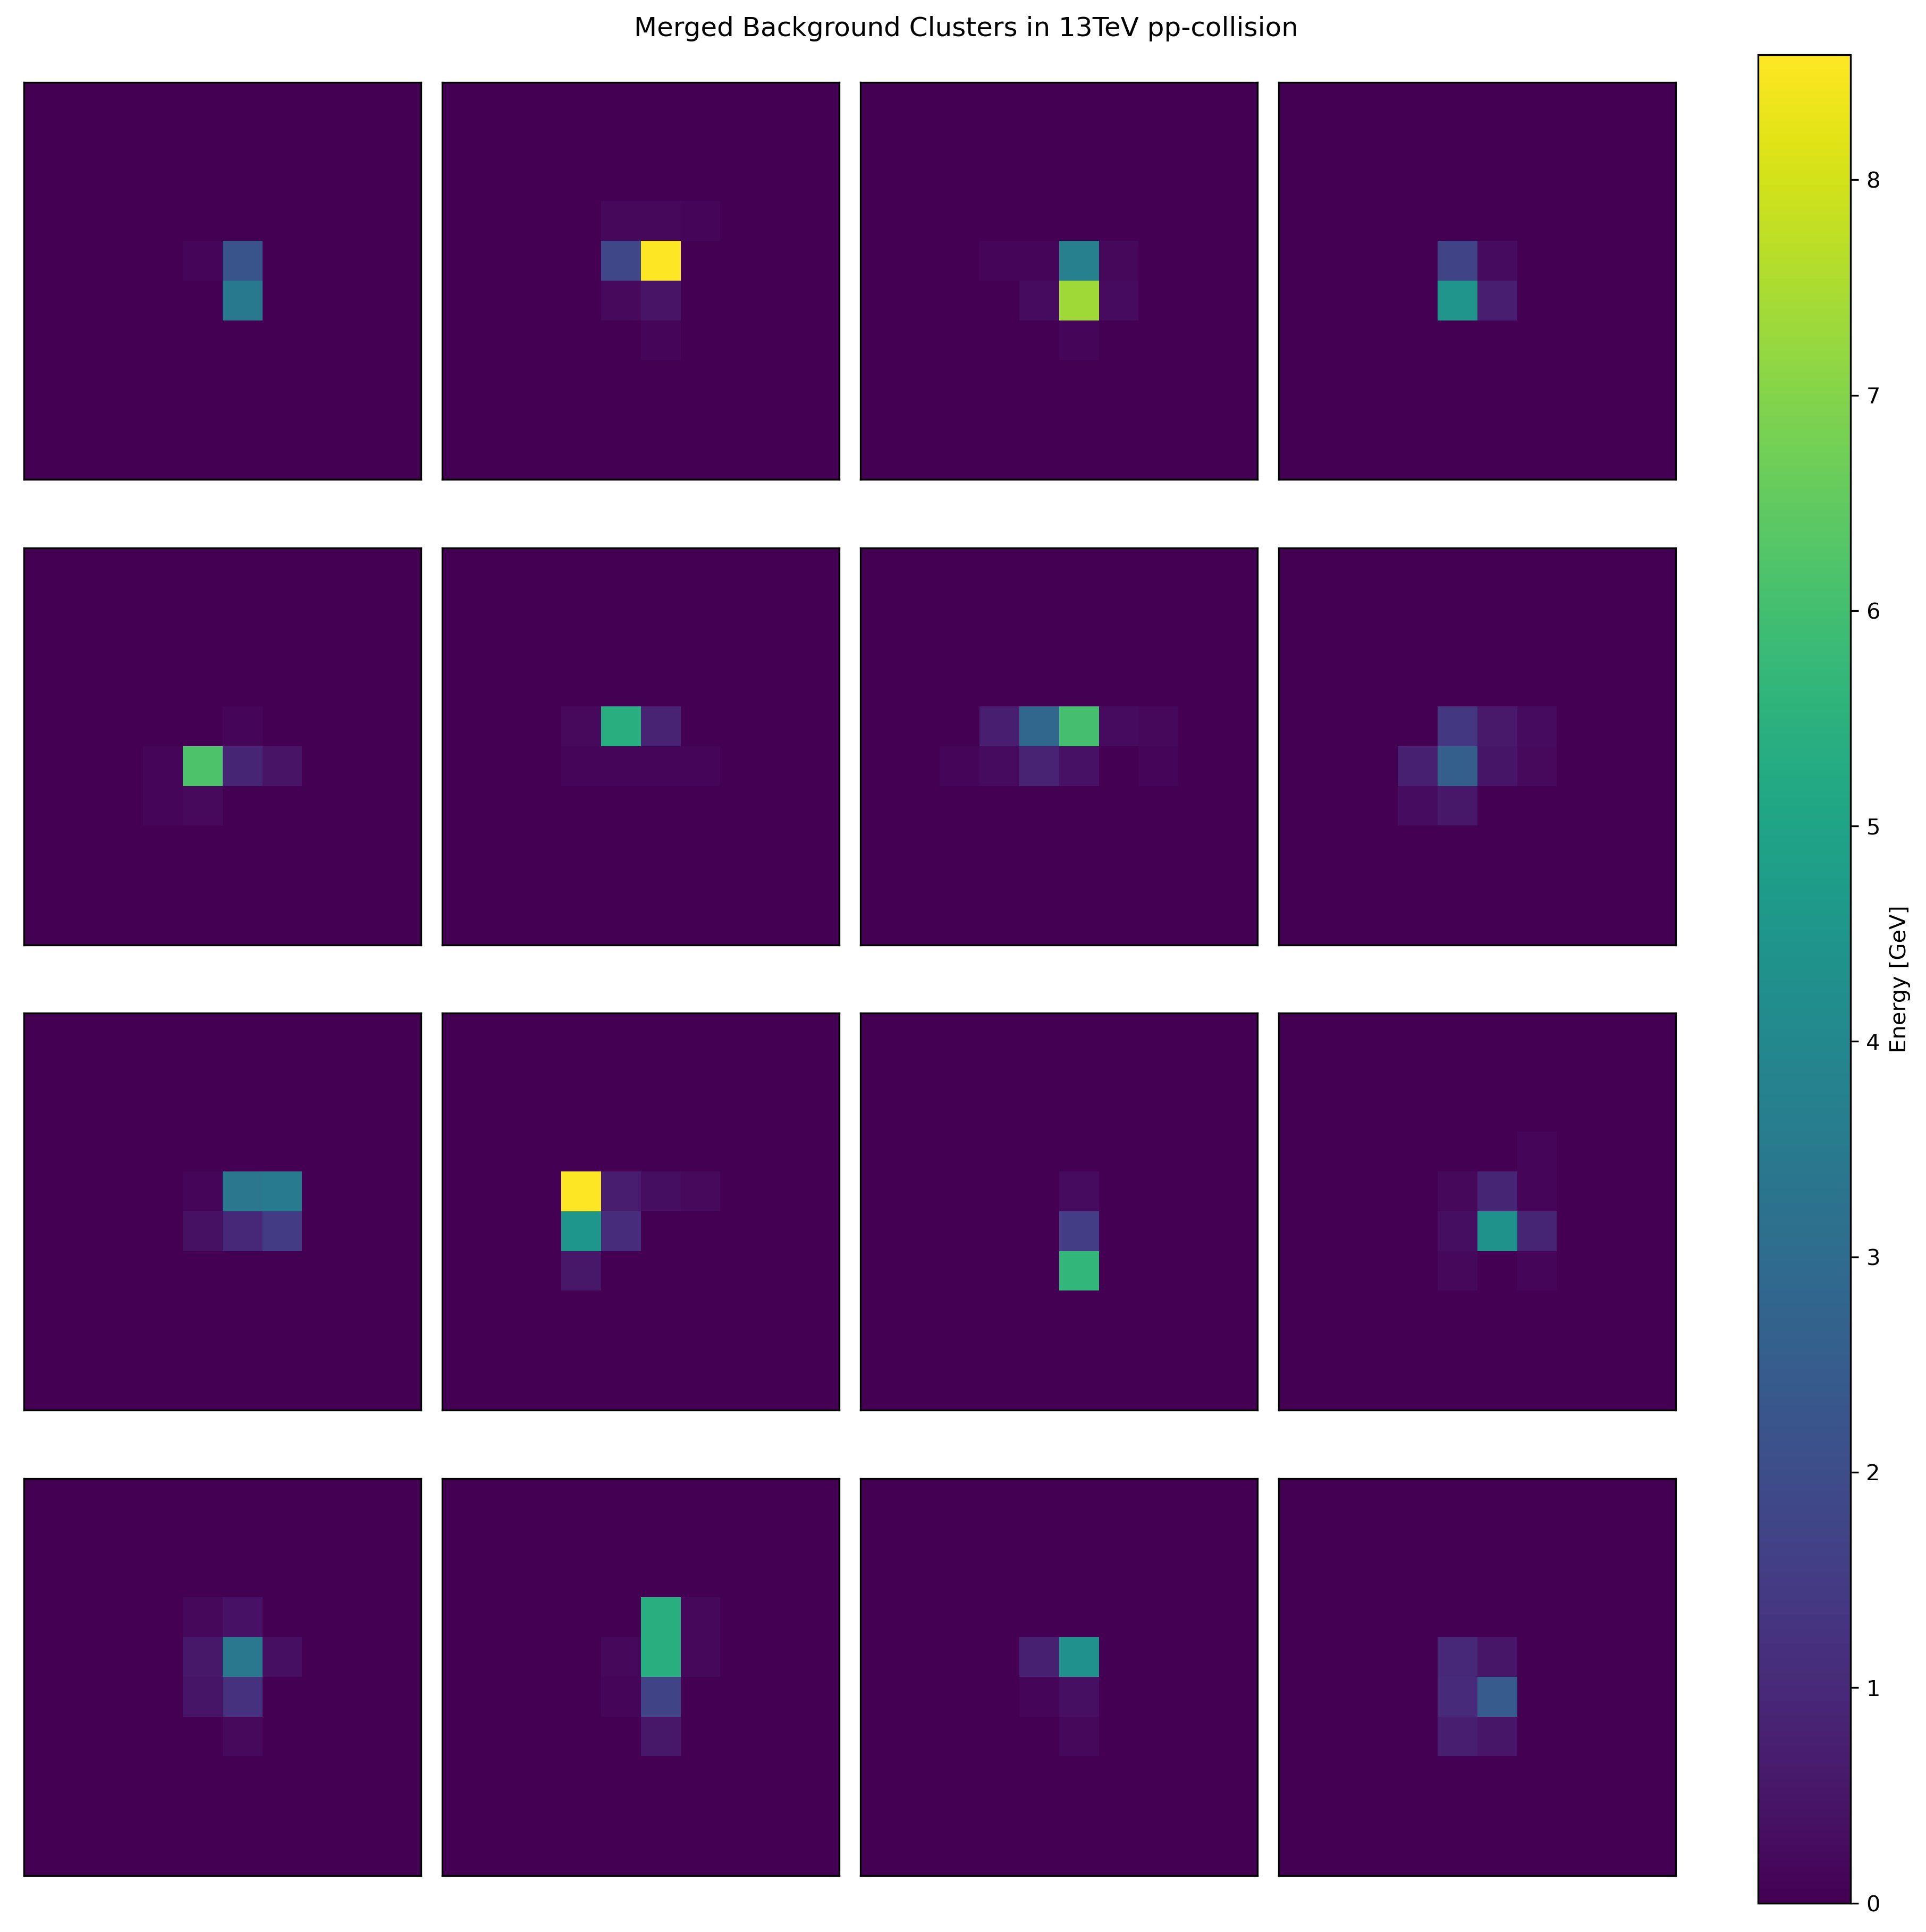

In [24]:
plot_cluster(bck, "Background", "Cluster")

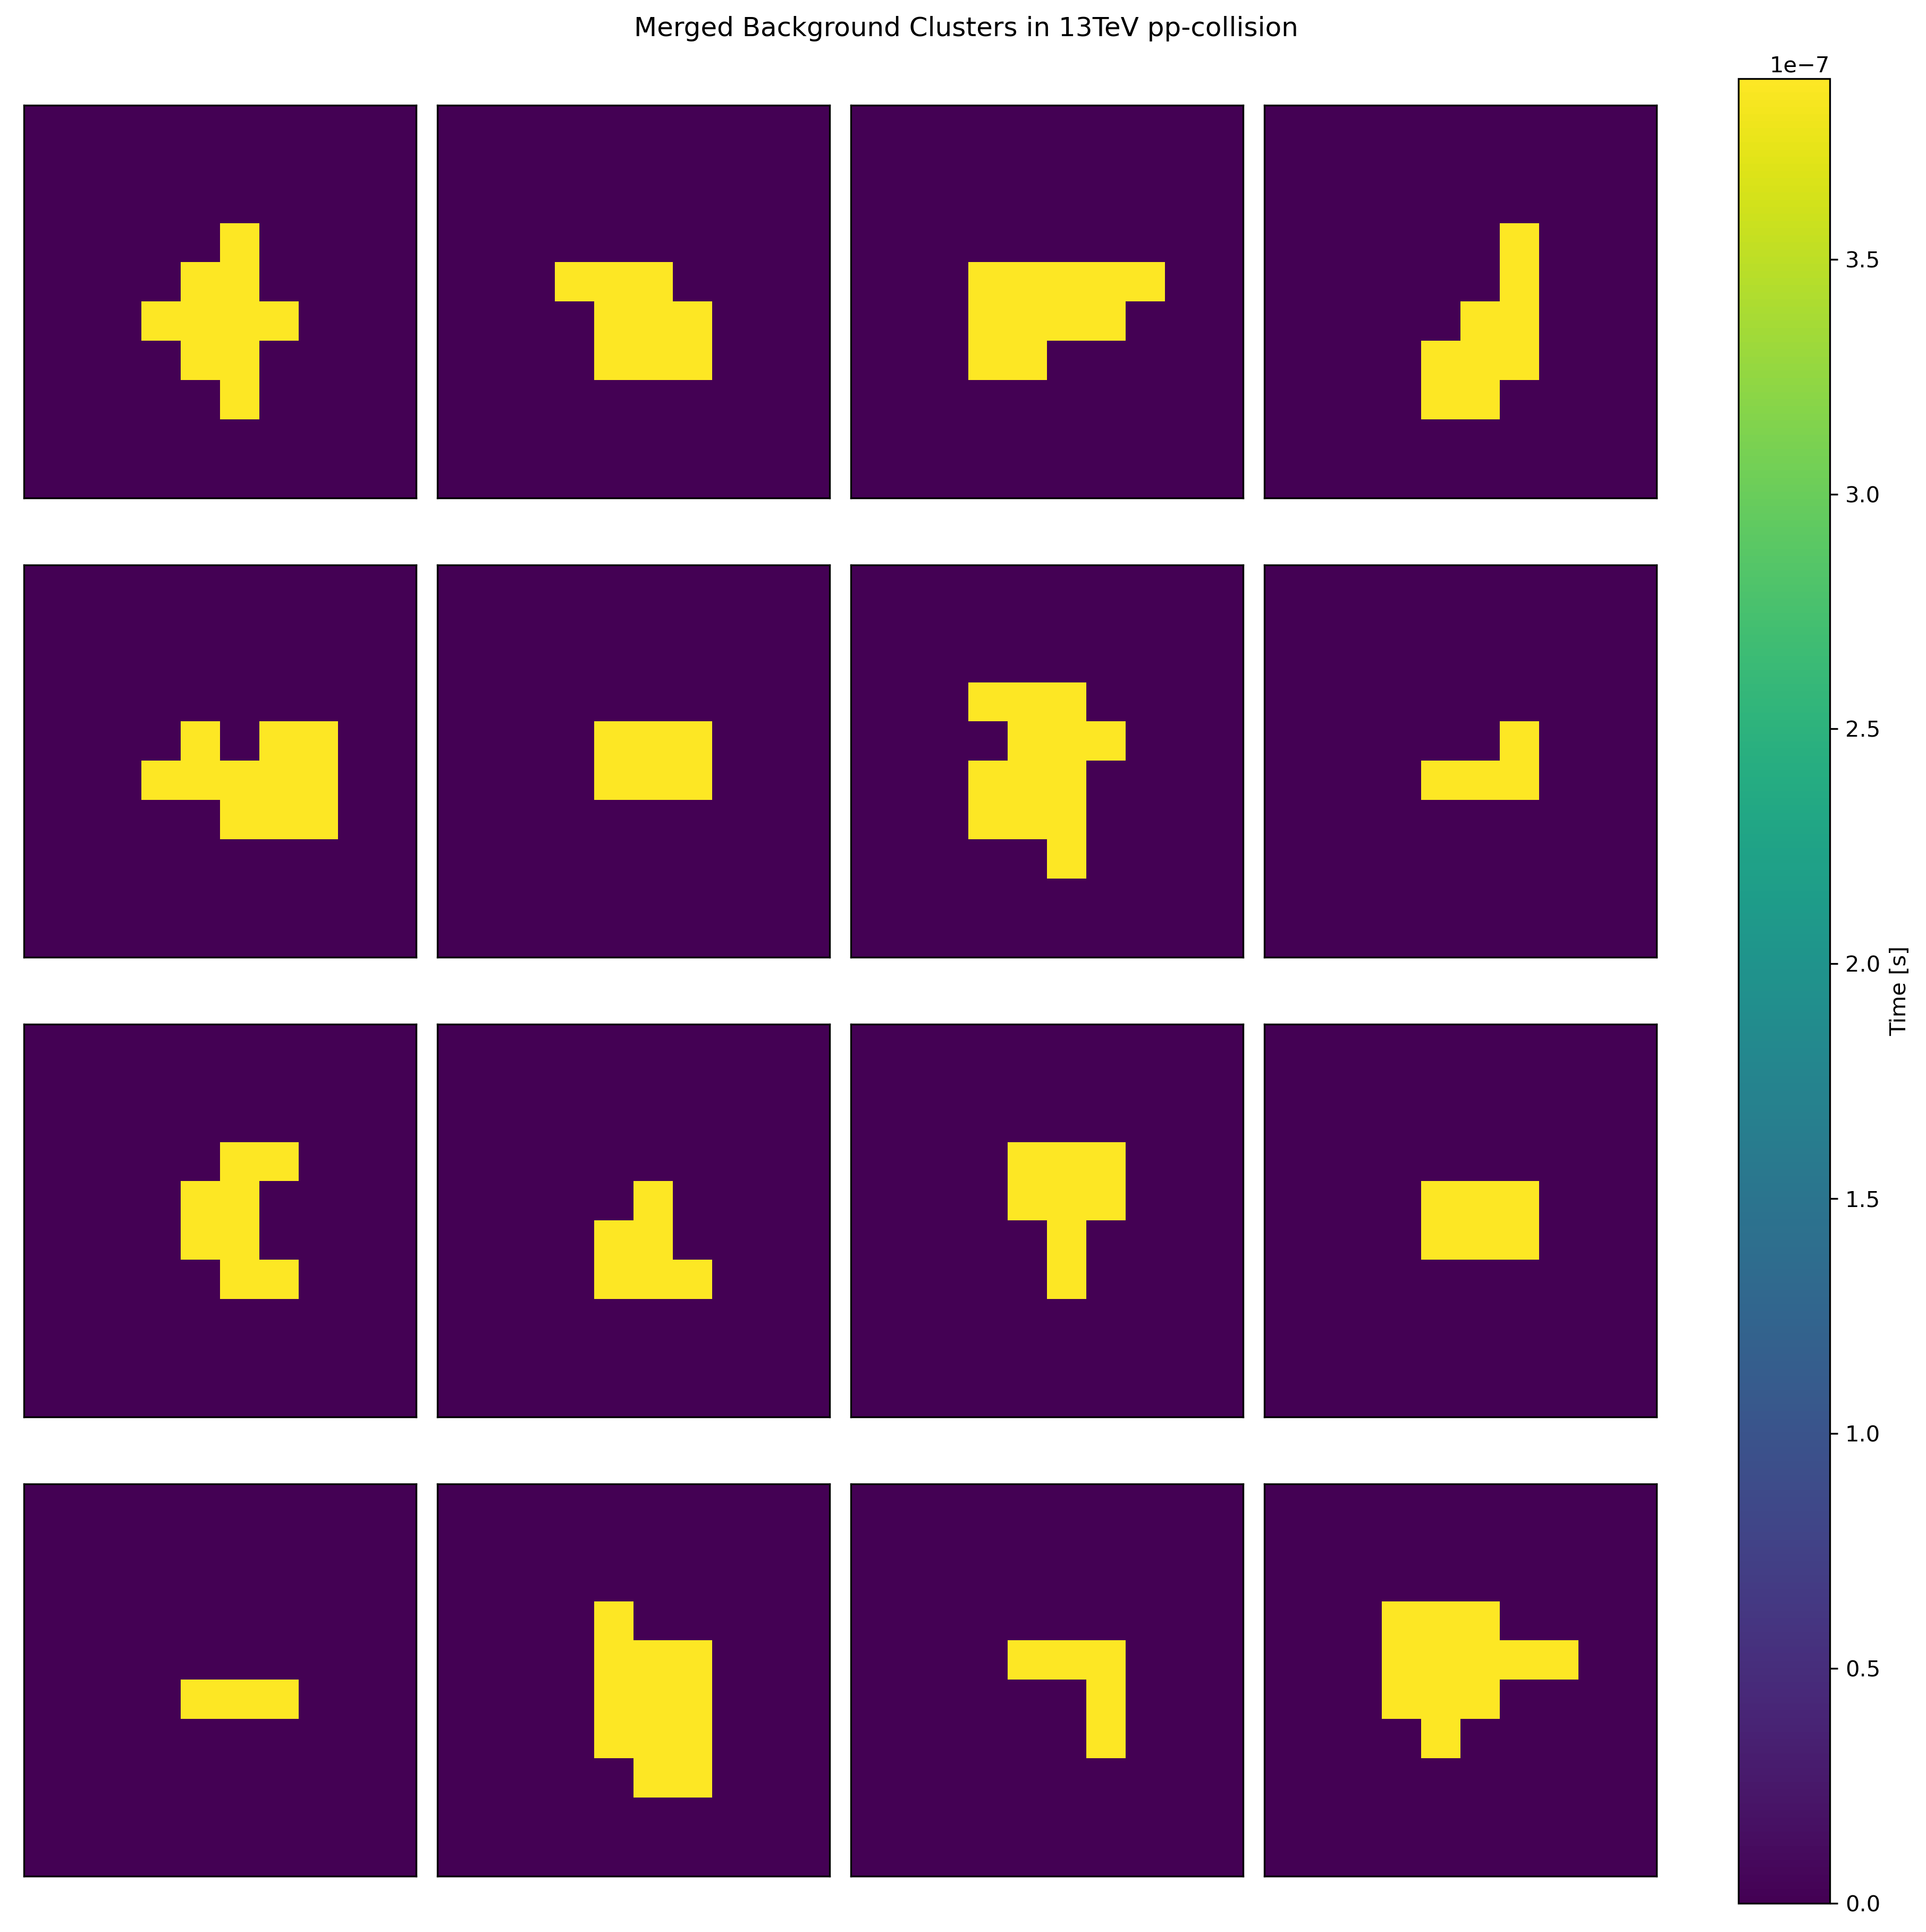

In [25]:
plot_cluster(bck, "Background", "ClusterTiming")

## Cluster Size

In [26]:
def plot_size(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterN"], bins=np.arange(min(dic["ClusterN"]), max(dic["ClusterN"]) + 1, 1), histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster Size in 13TeV pp-Collisions")
    ax.set_xlabel("Size [#Cells]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clustersize.pdf", dpi=300, bbox_inches='tight')
    
def plot_size_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterN"][dic["ClusterType"] == i+1], bins=np.arange(min(dic["ClusterN"]), max(dic["ClusterN"]) + 1, 1), histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Size [#Cells]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1),horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster Size in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    
    plt.savefig("Plots/clustersize_type.pdf", dpi=300, bbox_inches='tight')

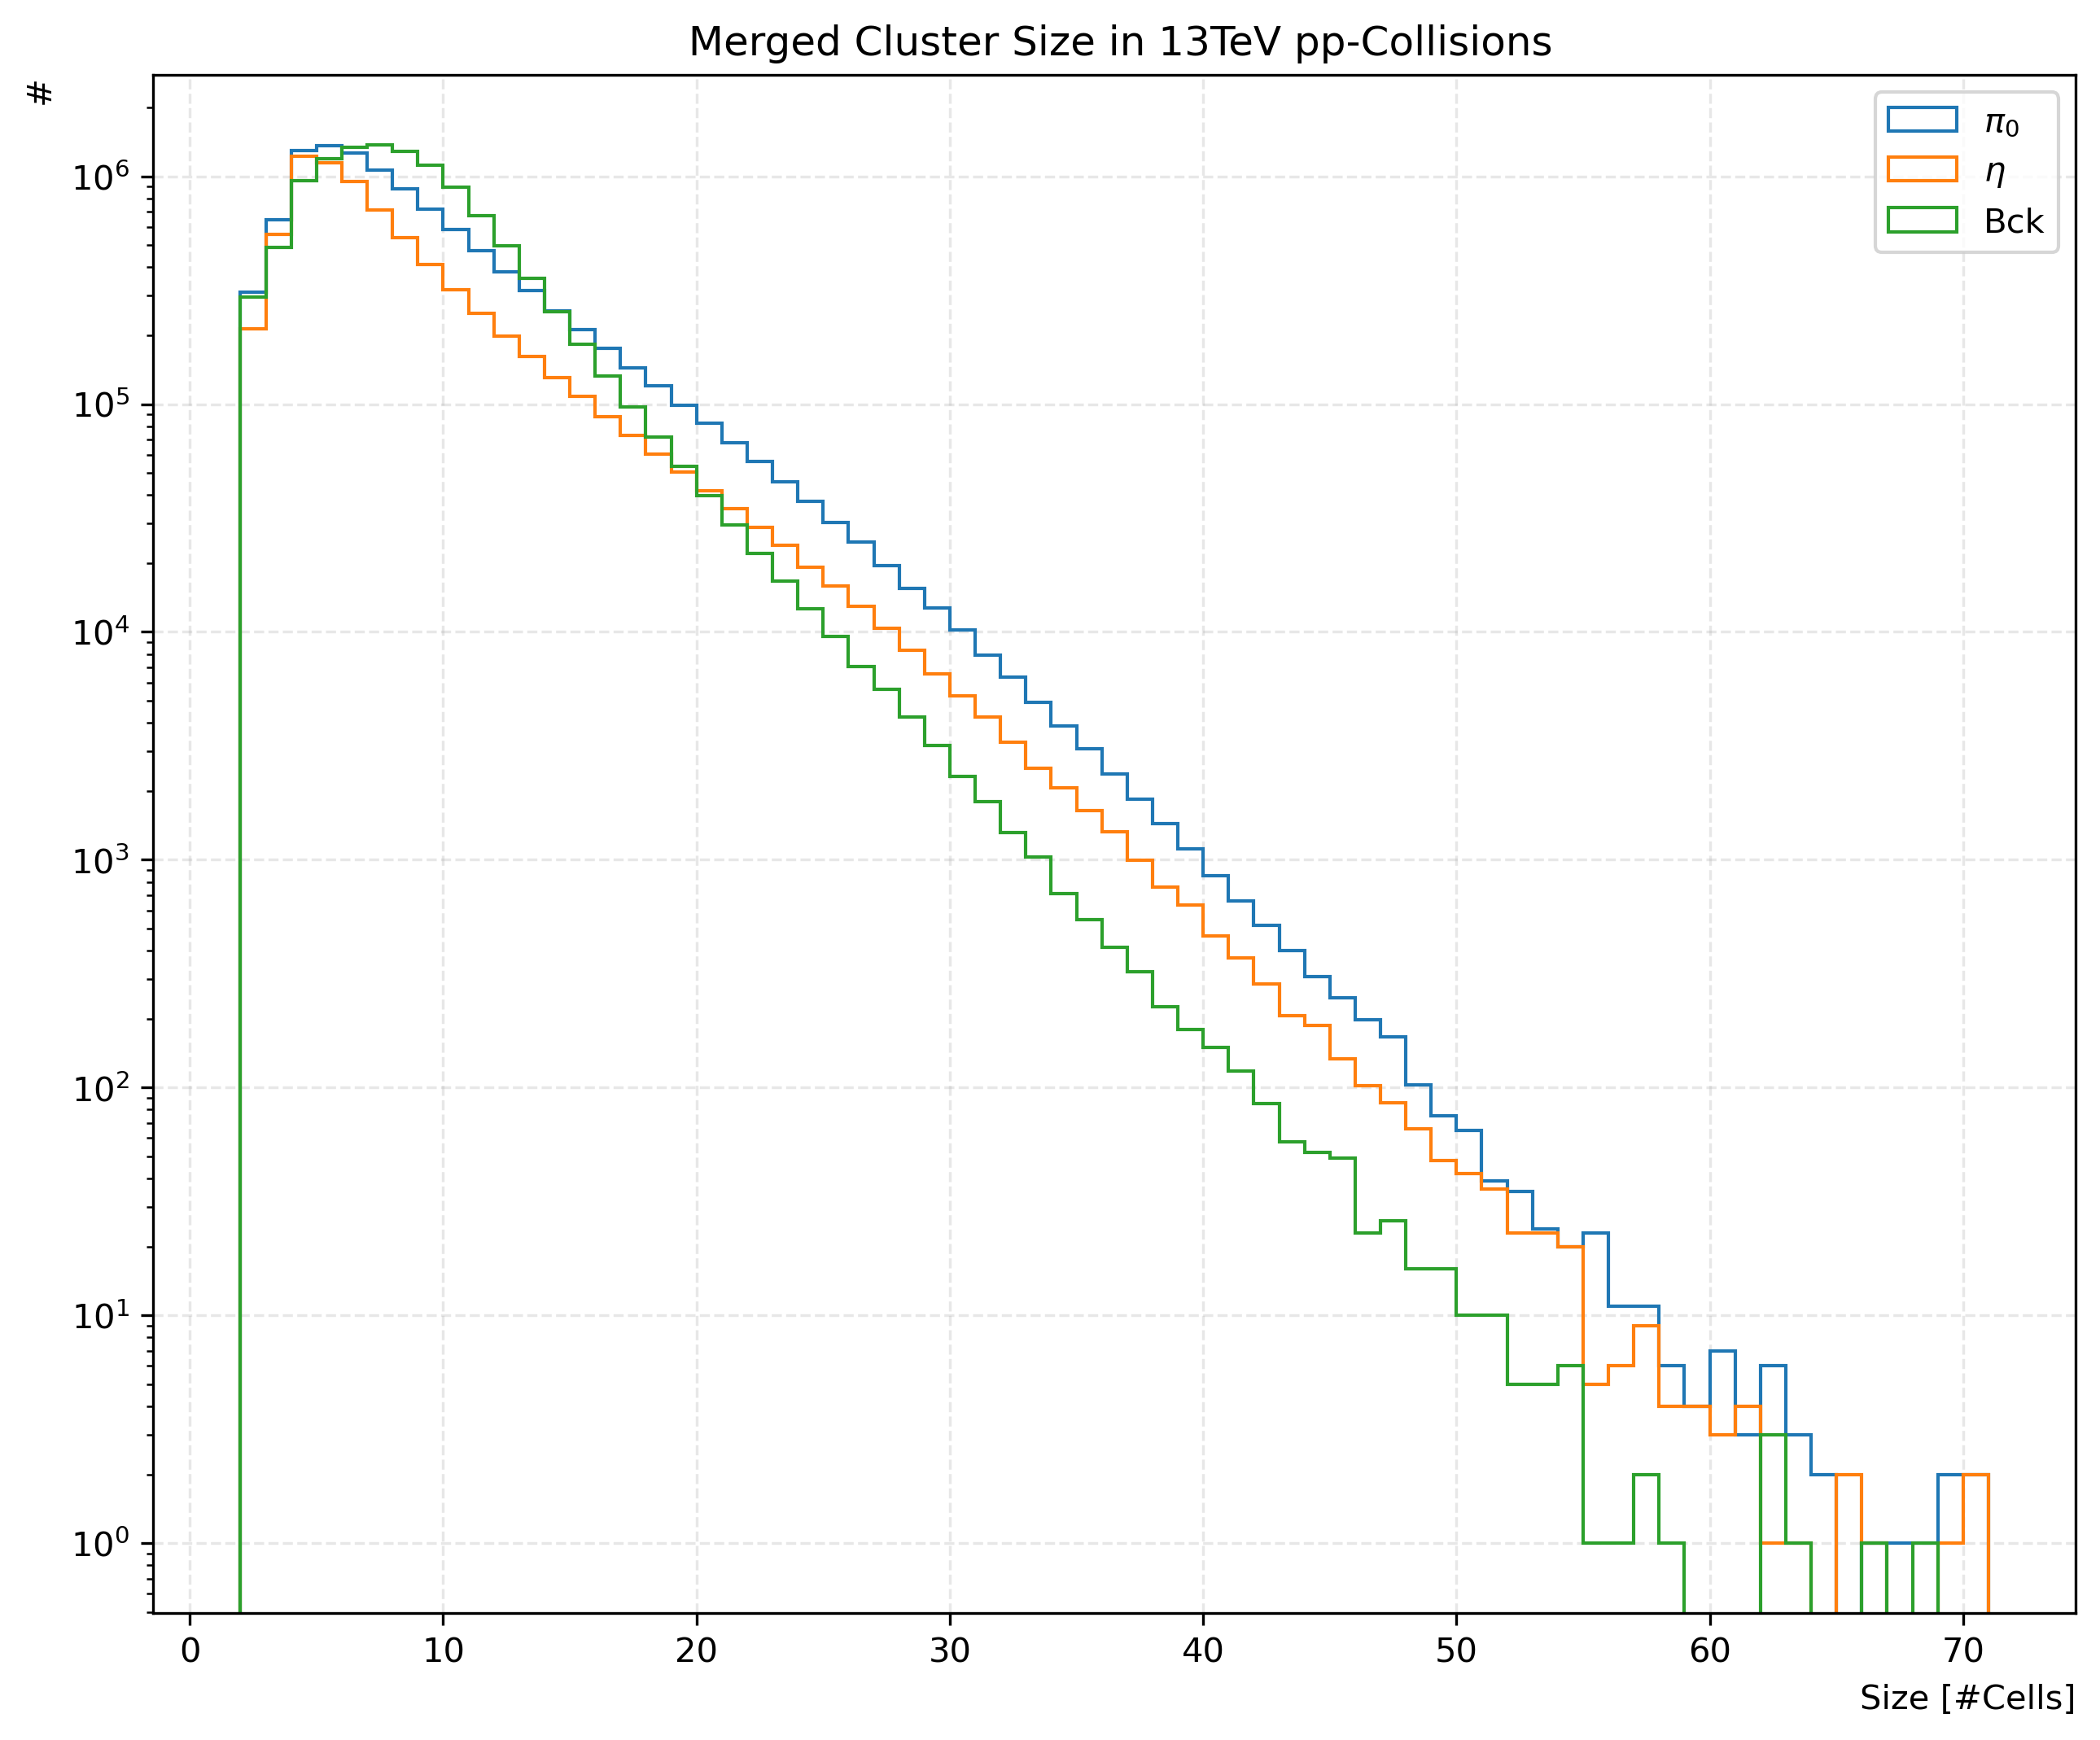

In [27]:
plot_size(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


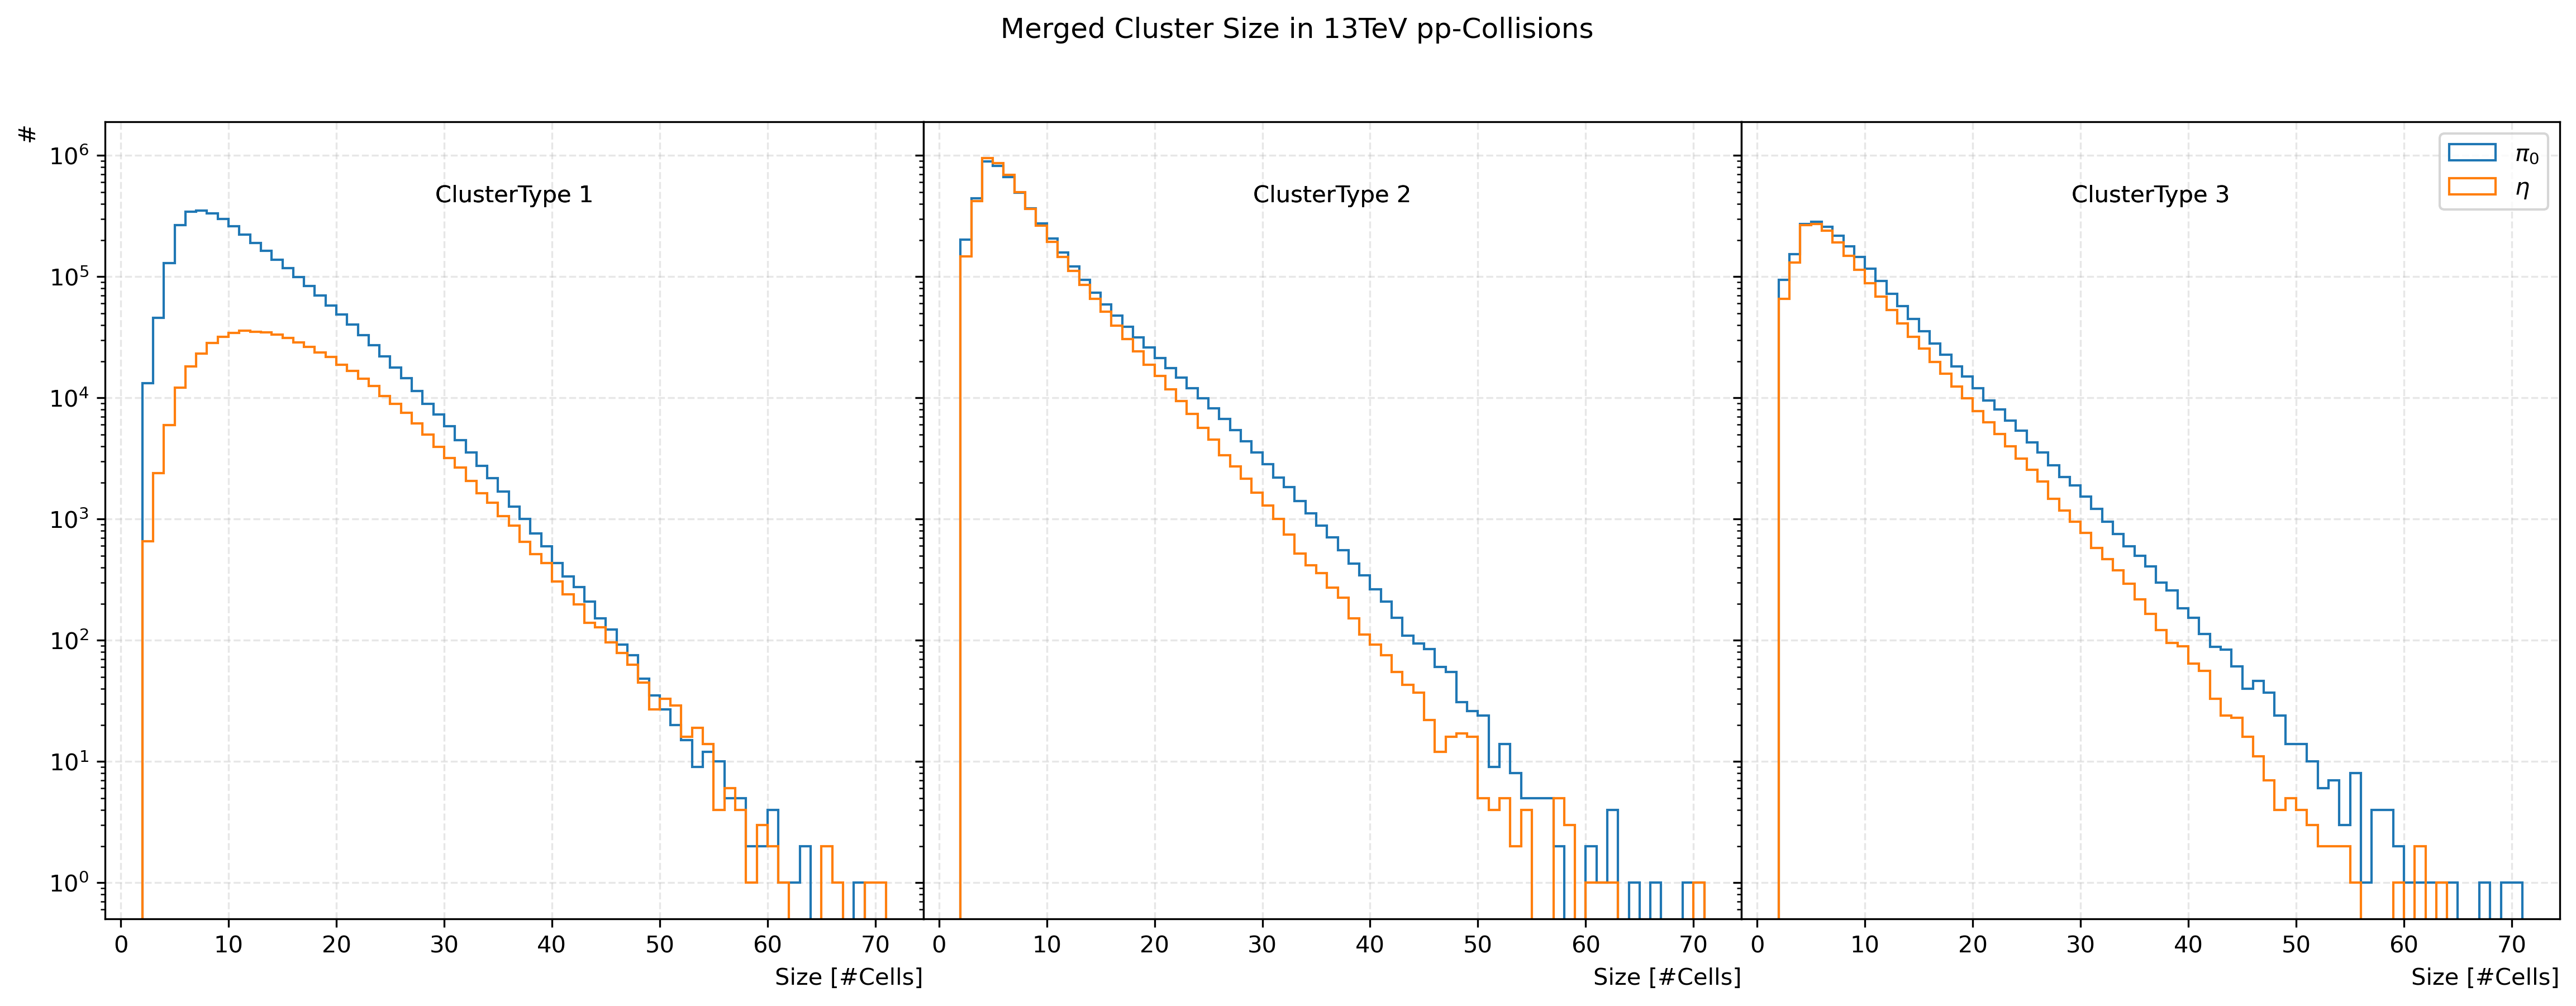

In [28]:
plot_size_cltype(dicts[0:2], labels[0:2])

In [29]:
def plot_height(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterHeight"], bins=np.arange(min(dic["ClusterHeight"]), max(dic["ClusterHeight"]) + 1, 1), histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster Height in 13TeV pp-Collisions")
    ax.set_xlabel("Height [#Cells]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clusterheight.pdf", dpi=300, bbox_inches='tight')
    
def plot_height_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterHeight"][dic["ClusterType"] == i+1], bins=np.arange(min(dic["ClusterHeight"]), max(dic["ClusterHeight"]) + 1, 1), histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Height [#Cells]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1),horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster Height in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    
    plt.savefig("Plots/clusterheight_type.pdf", dpi=300, bbox_inches='tight')

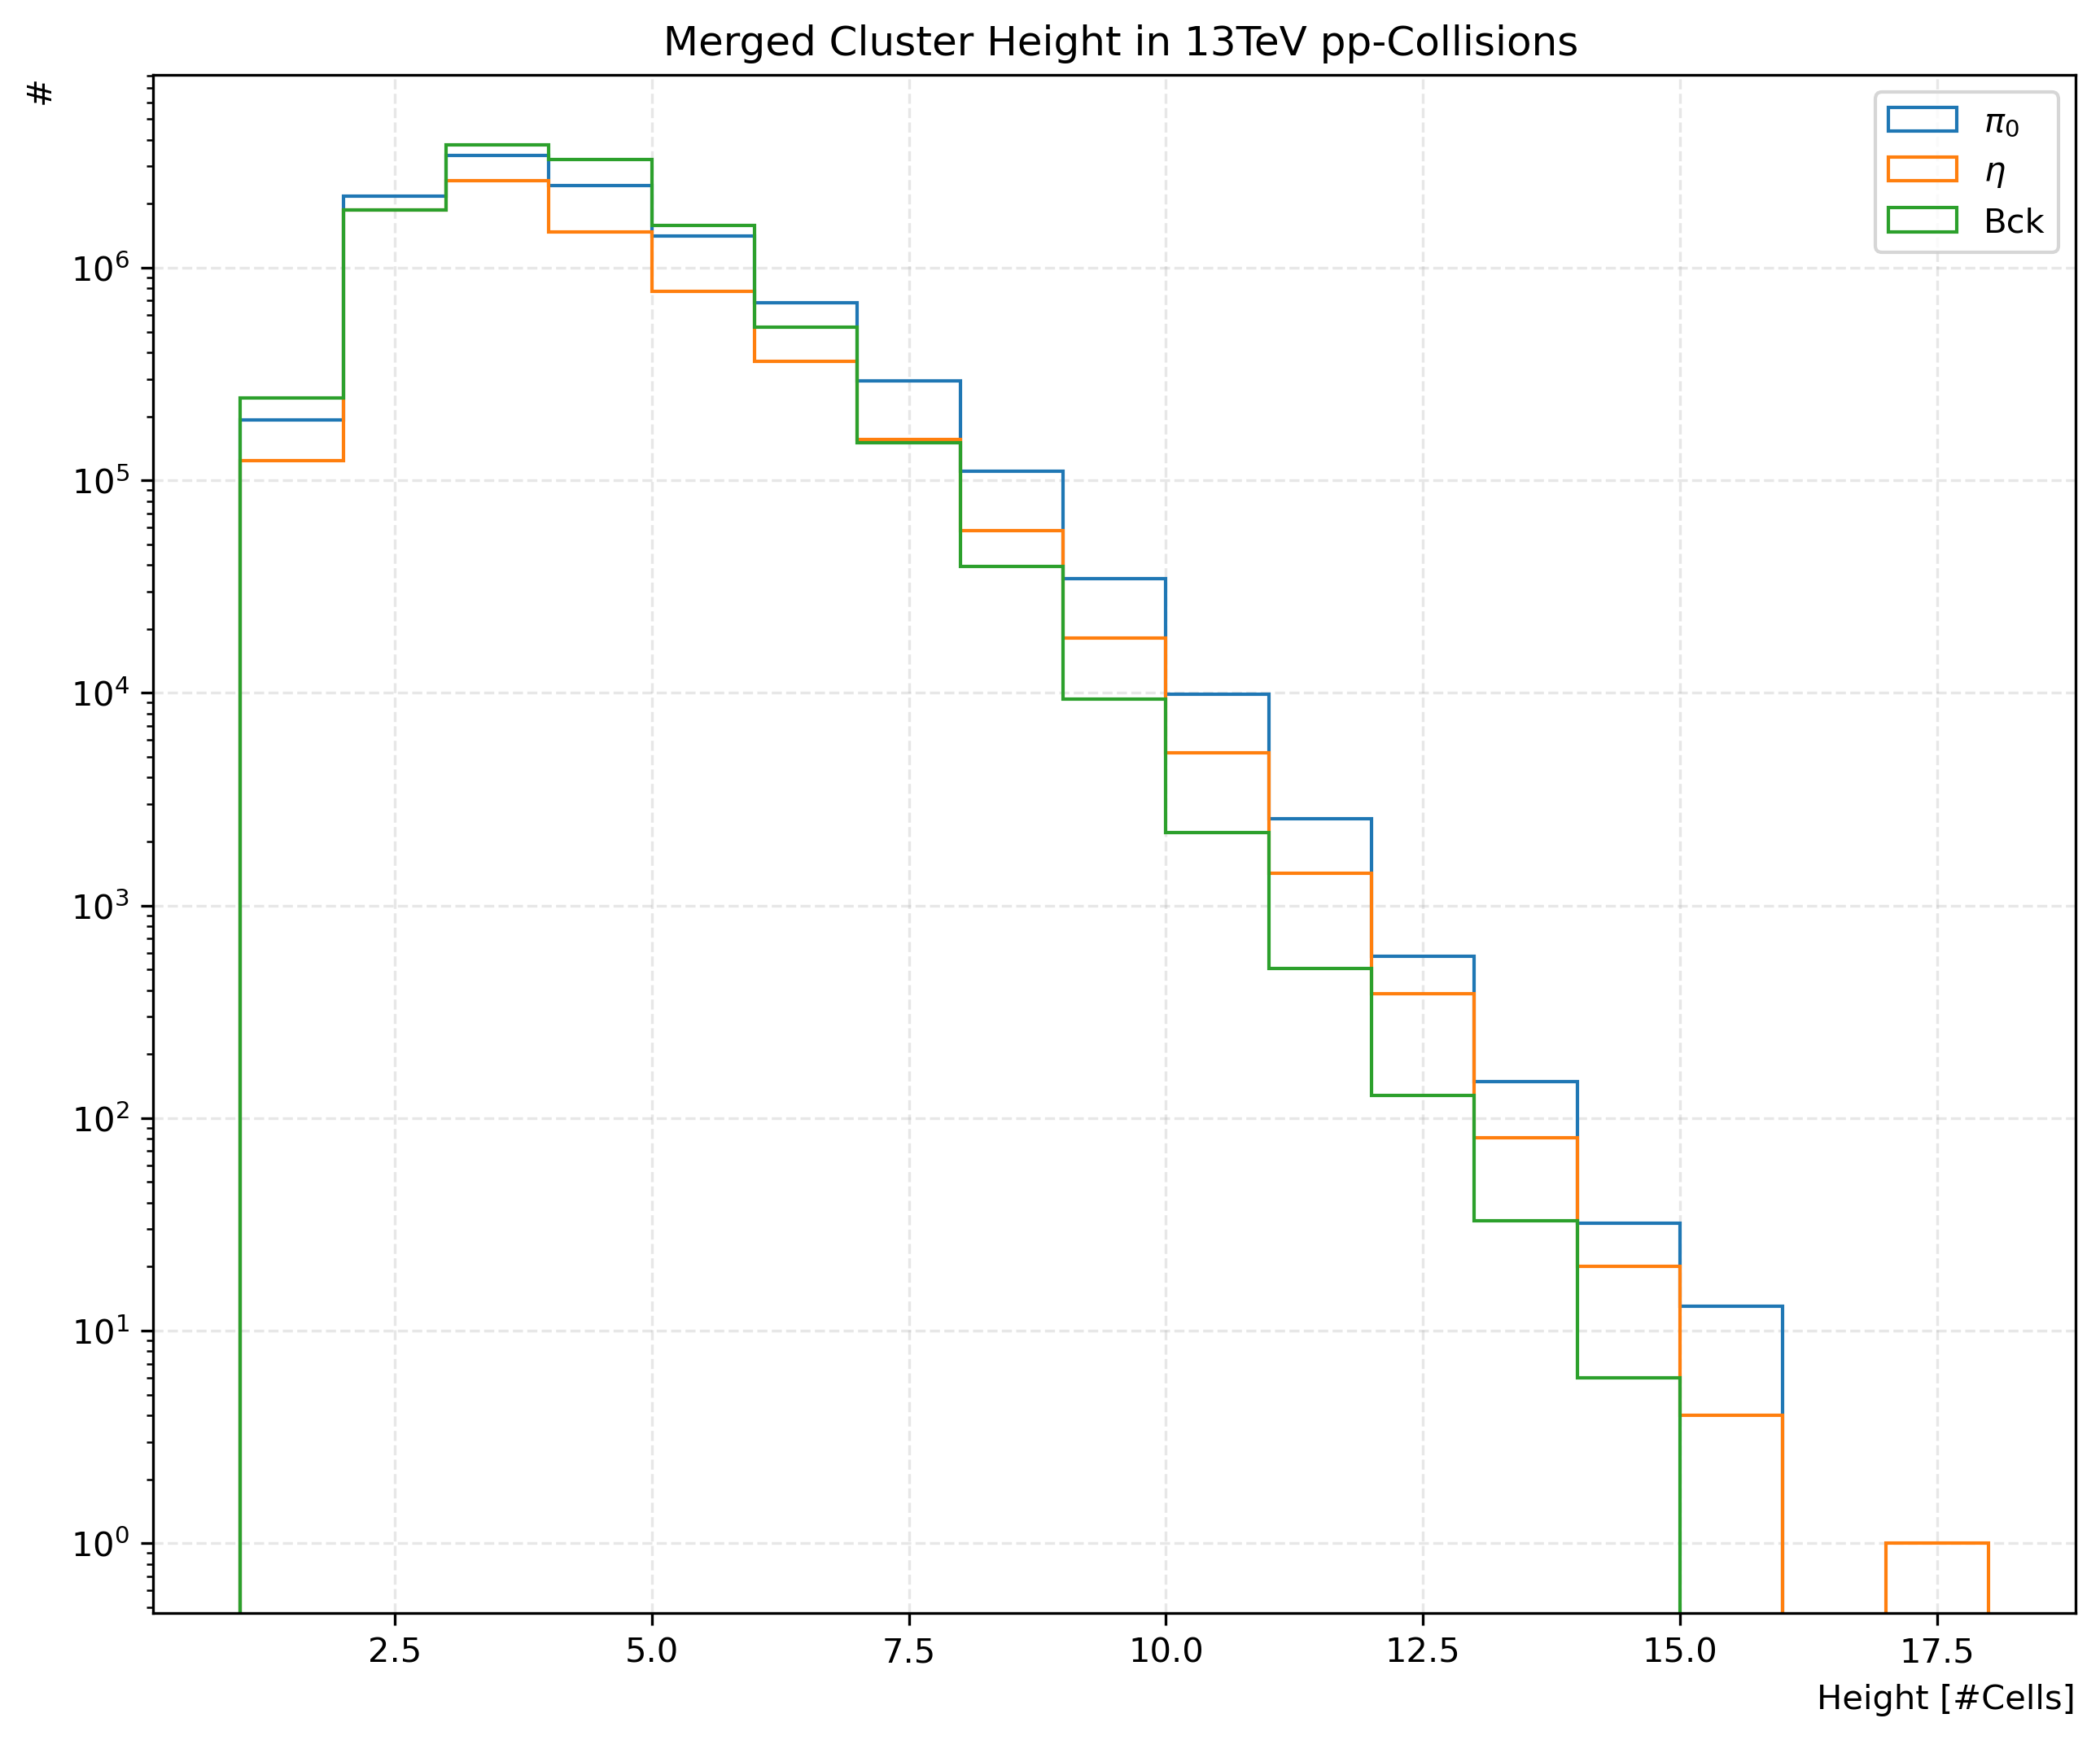

In [30]:
plot_height(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


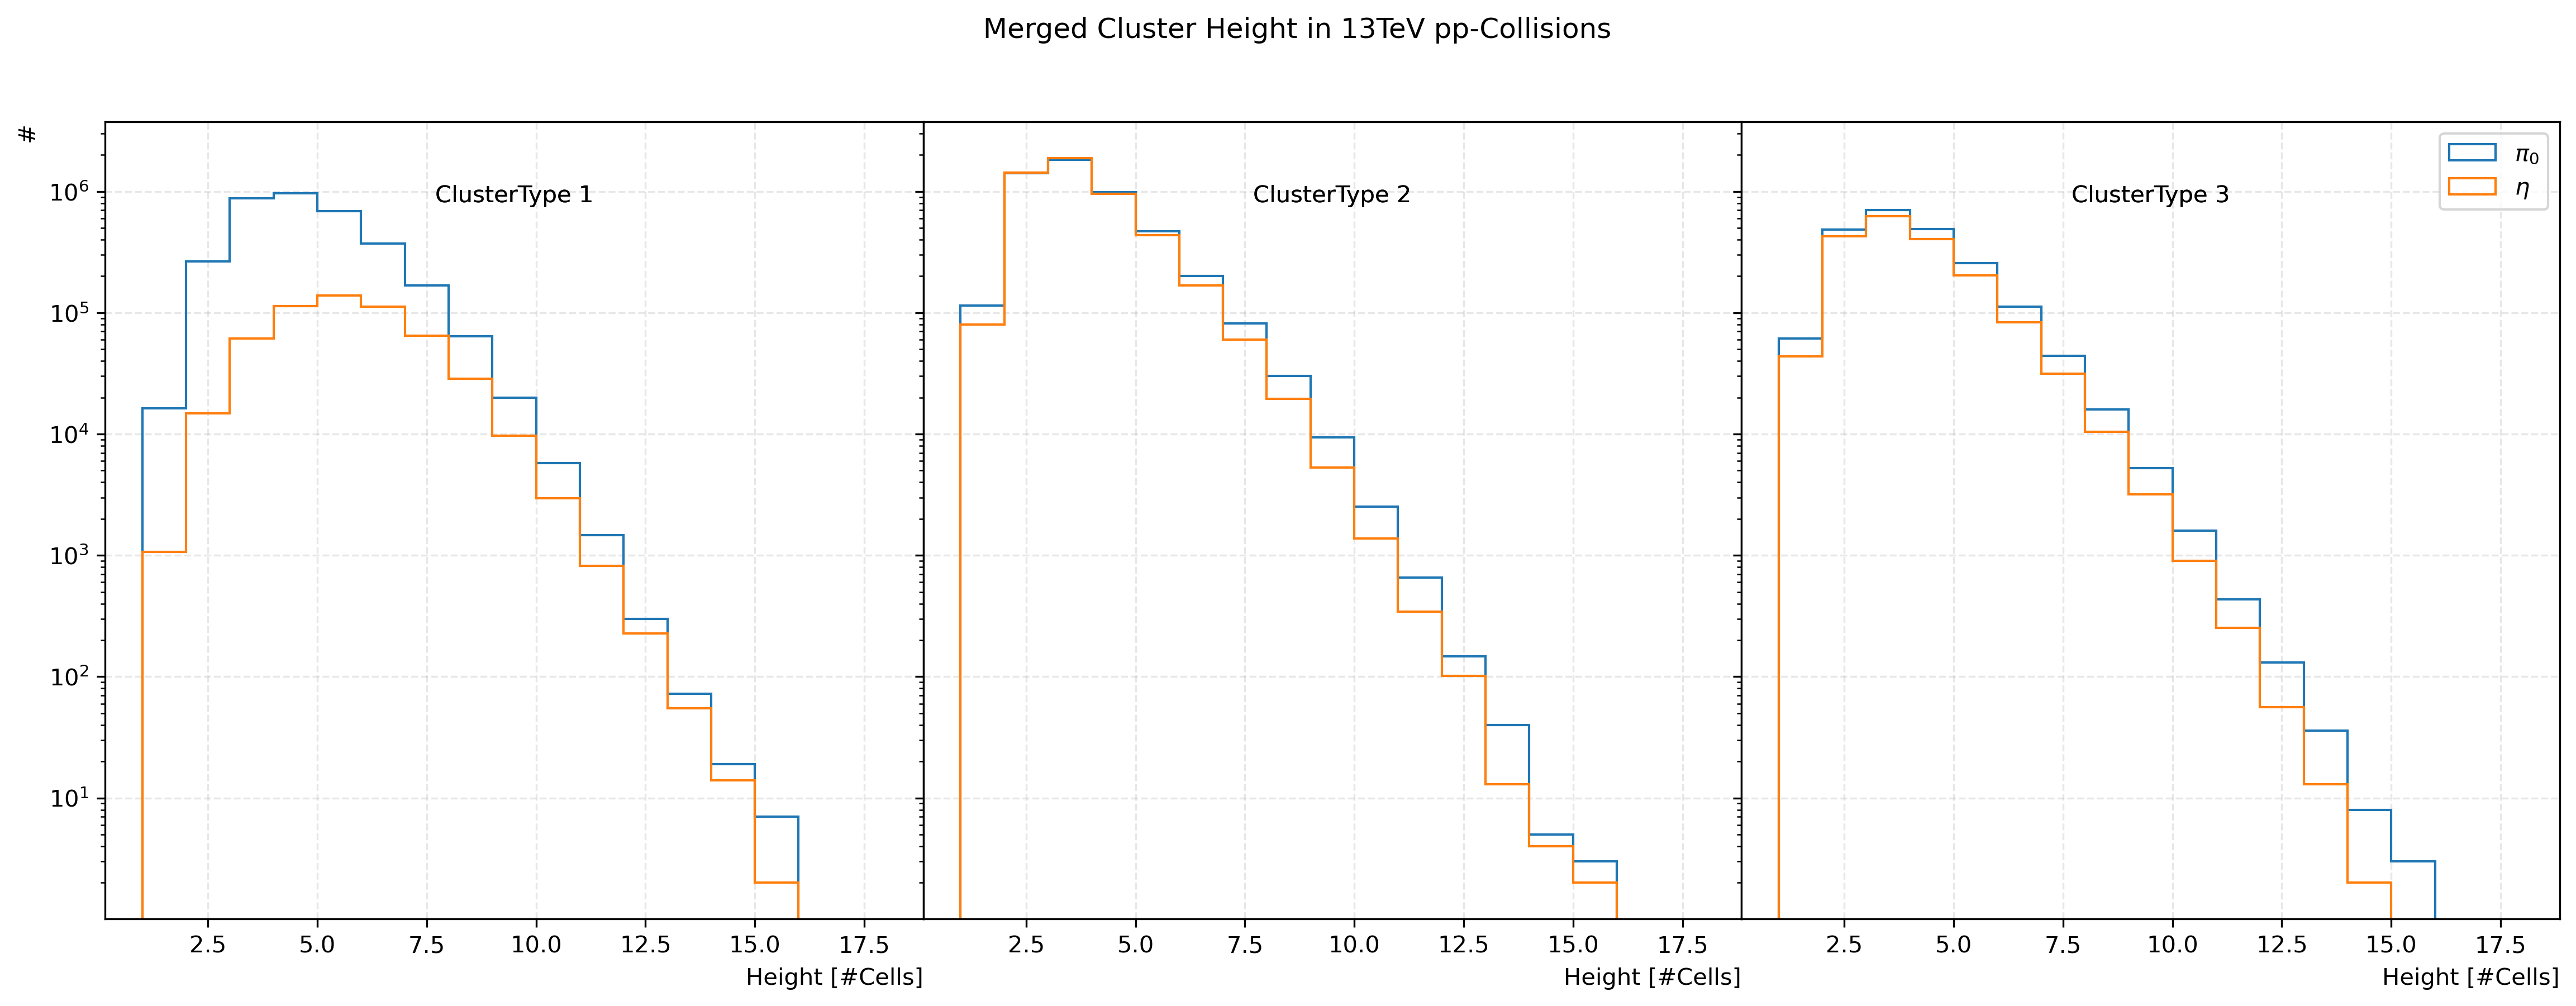

In [31]:
plot_height_cltype(dicts[0:2], labels[0:2])

In [32]:
def plot_width(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterWidth"], bins=np.arange(min(dic["ClusterWidth"]), max(dic["ClusterWidth"]) + 1, 1), histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster Width in 13TeV pp-Collisions")
    ax.set_xlabel("Width [#Cells]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clusterwidth.pdf", dpi=300, bbox_inches='tight')
    
def plot_width_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterWidth"][dic["ClusterType"] == i+1], bins=np.arange(min(dic["ClusterWidth"]), max(dic["ClusterWidth"]) + 1, 1), histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Width [#Cells]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1),horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster Width in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    
    plt.savefig("Plots/clusterwidth_type.pdf", dpi=300, bbox_inches='tight')

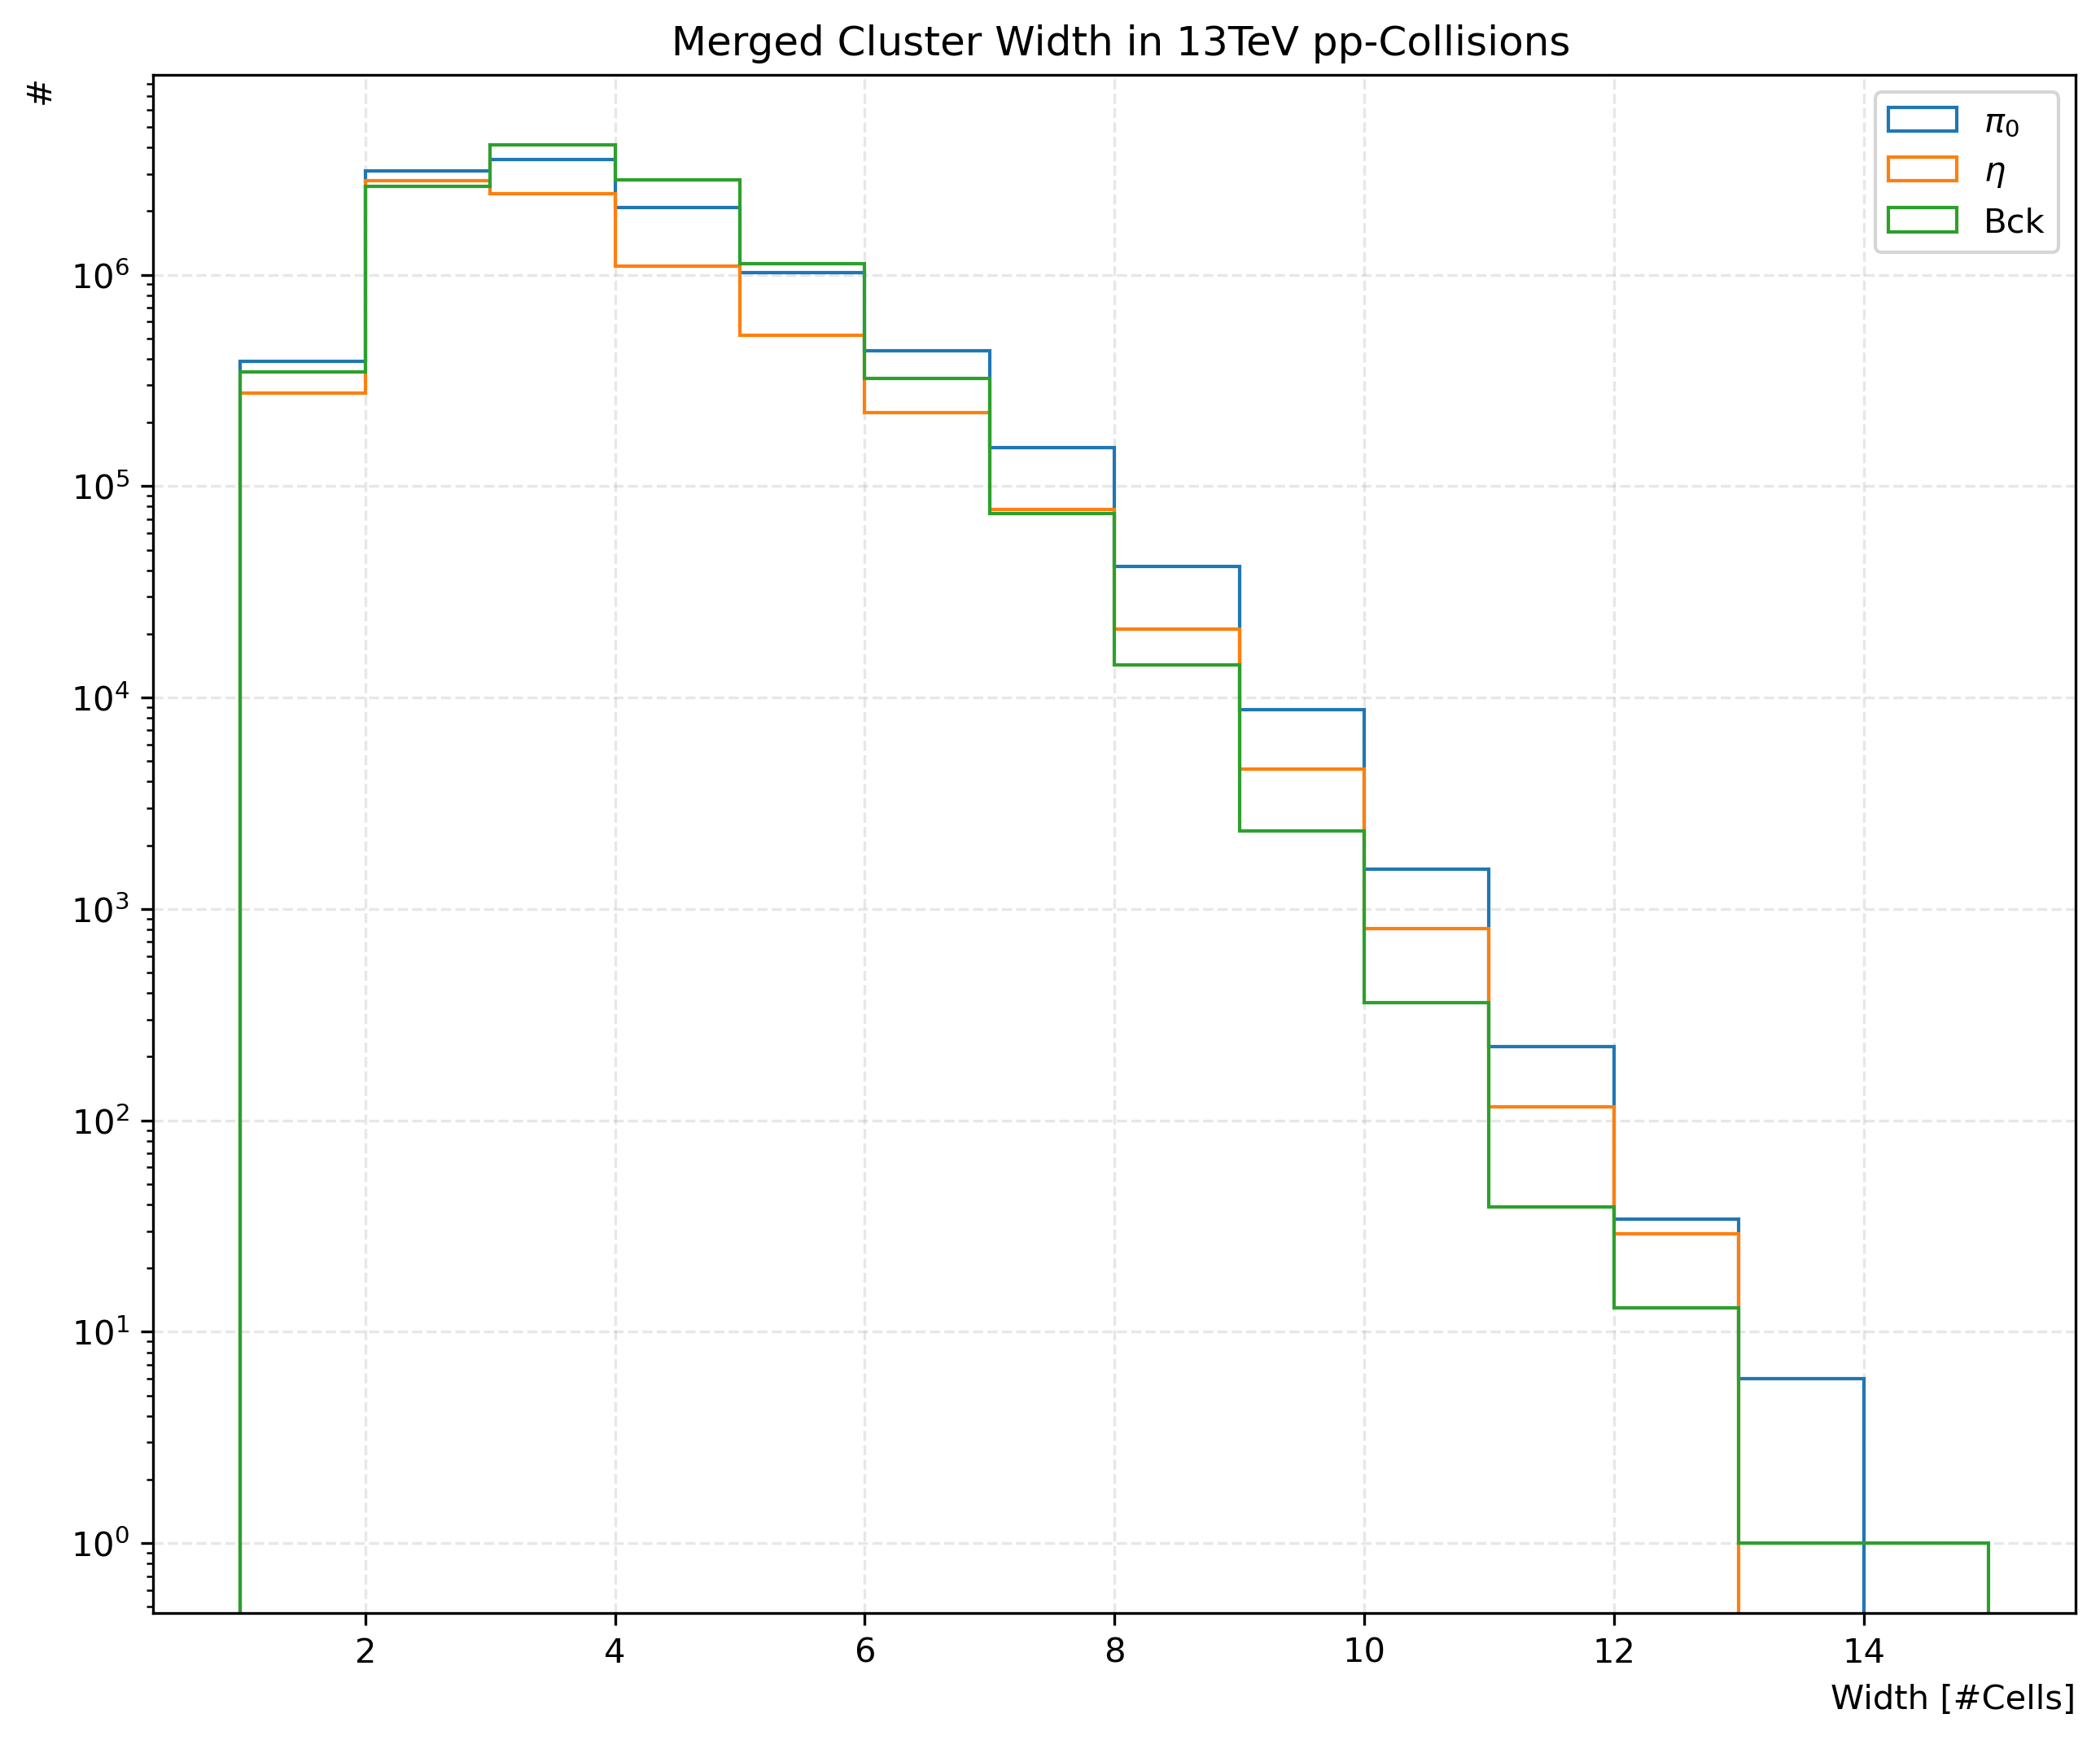

In [33]:
plot_width(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


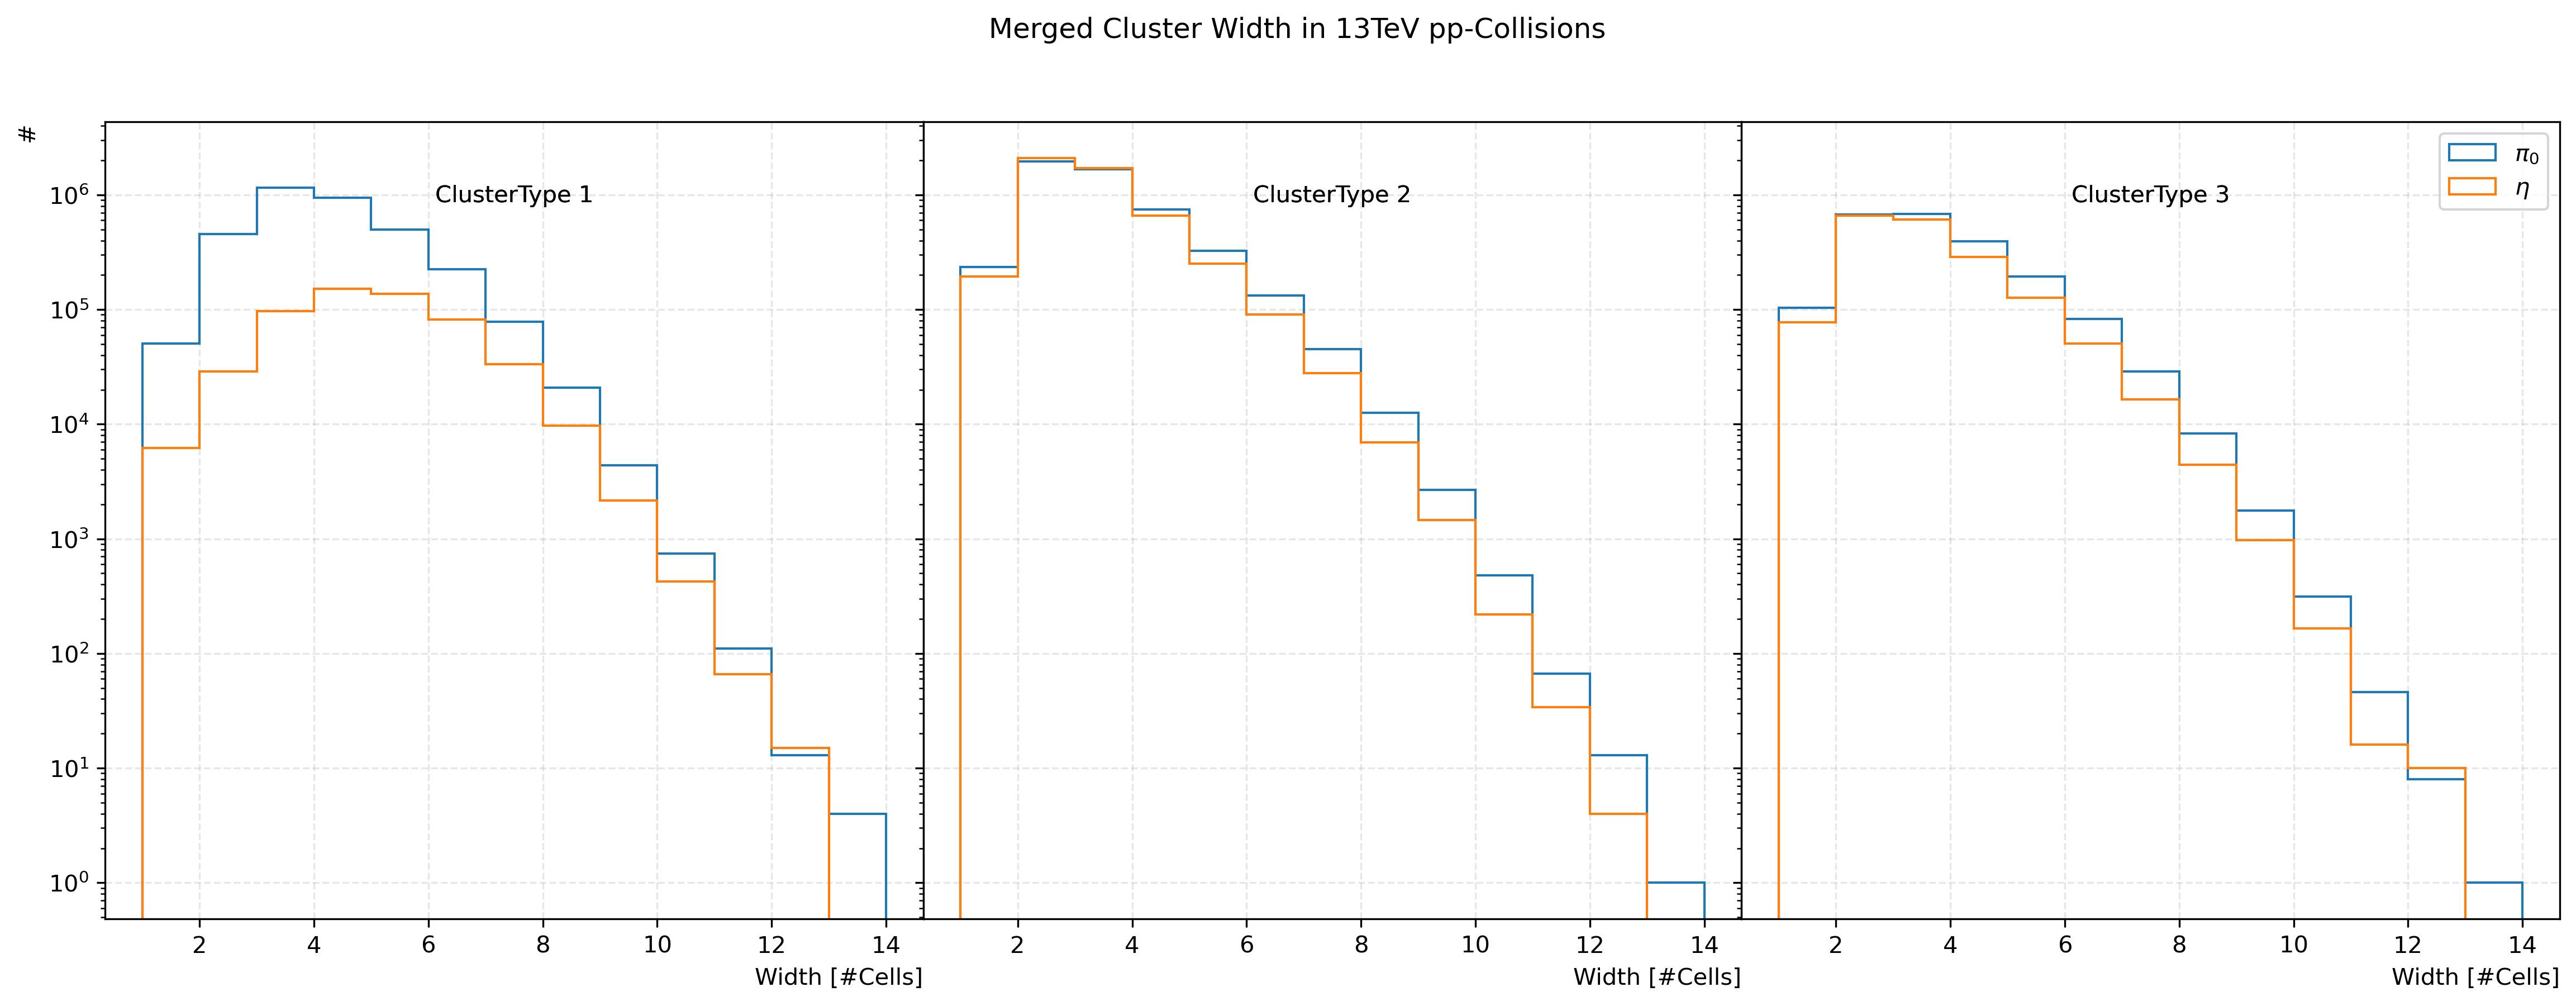

In [34]:
plot_width_cltype(dicts[0:2], labels[0:2])

## Cluster Energy and Pt

In [35]:
def plot_energy(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterE"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster Energy in 13TeV pp-Collisions")
    ax.set_xlabel("Energy [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clusterenergy.pdf", dpi=300, bbox_inches='tight')
    
def plot_energy_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterE"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Energy [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1),horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster Energy in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    
    plt.savefig("Plots/clusterenergy_type.pdf", dpi=300, bbox_inches='tight')

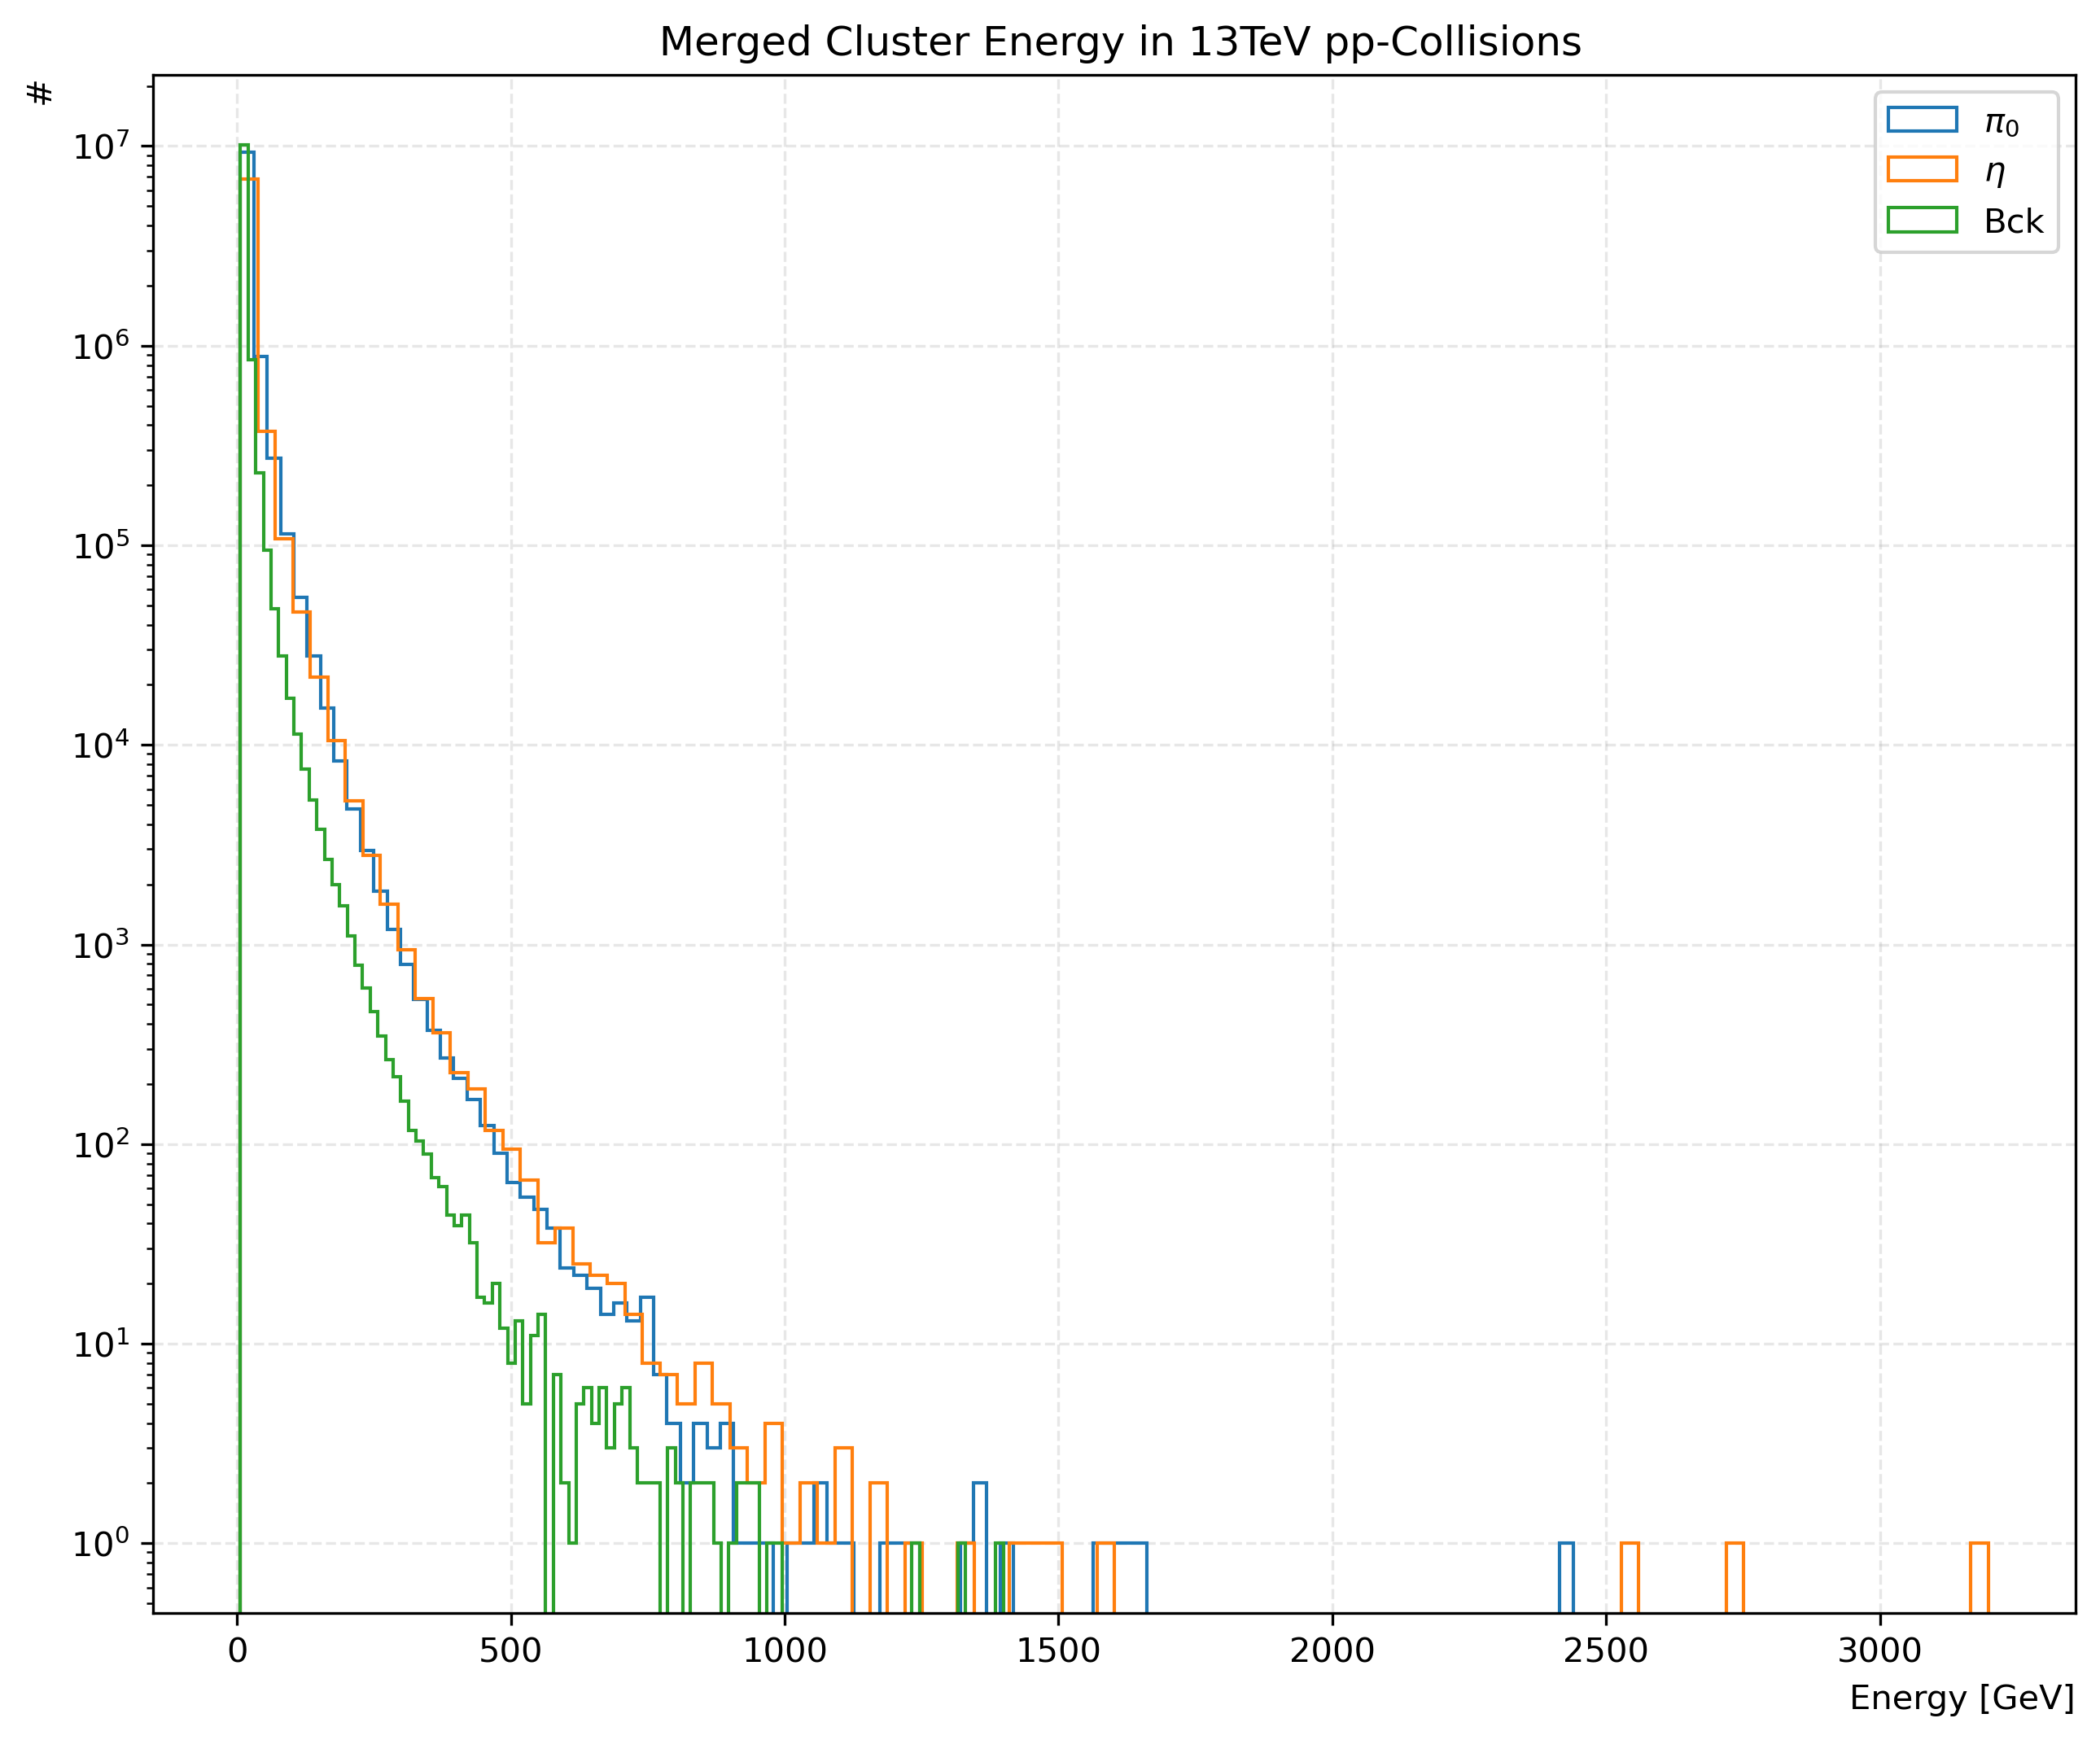

In [36]:
plot_energy(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


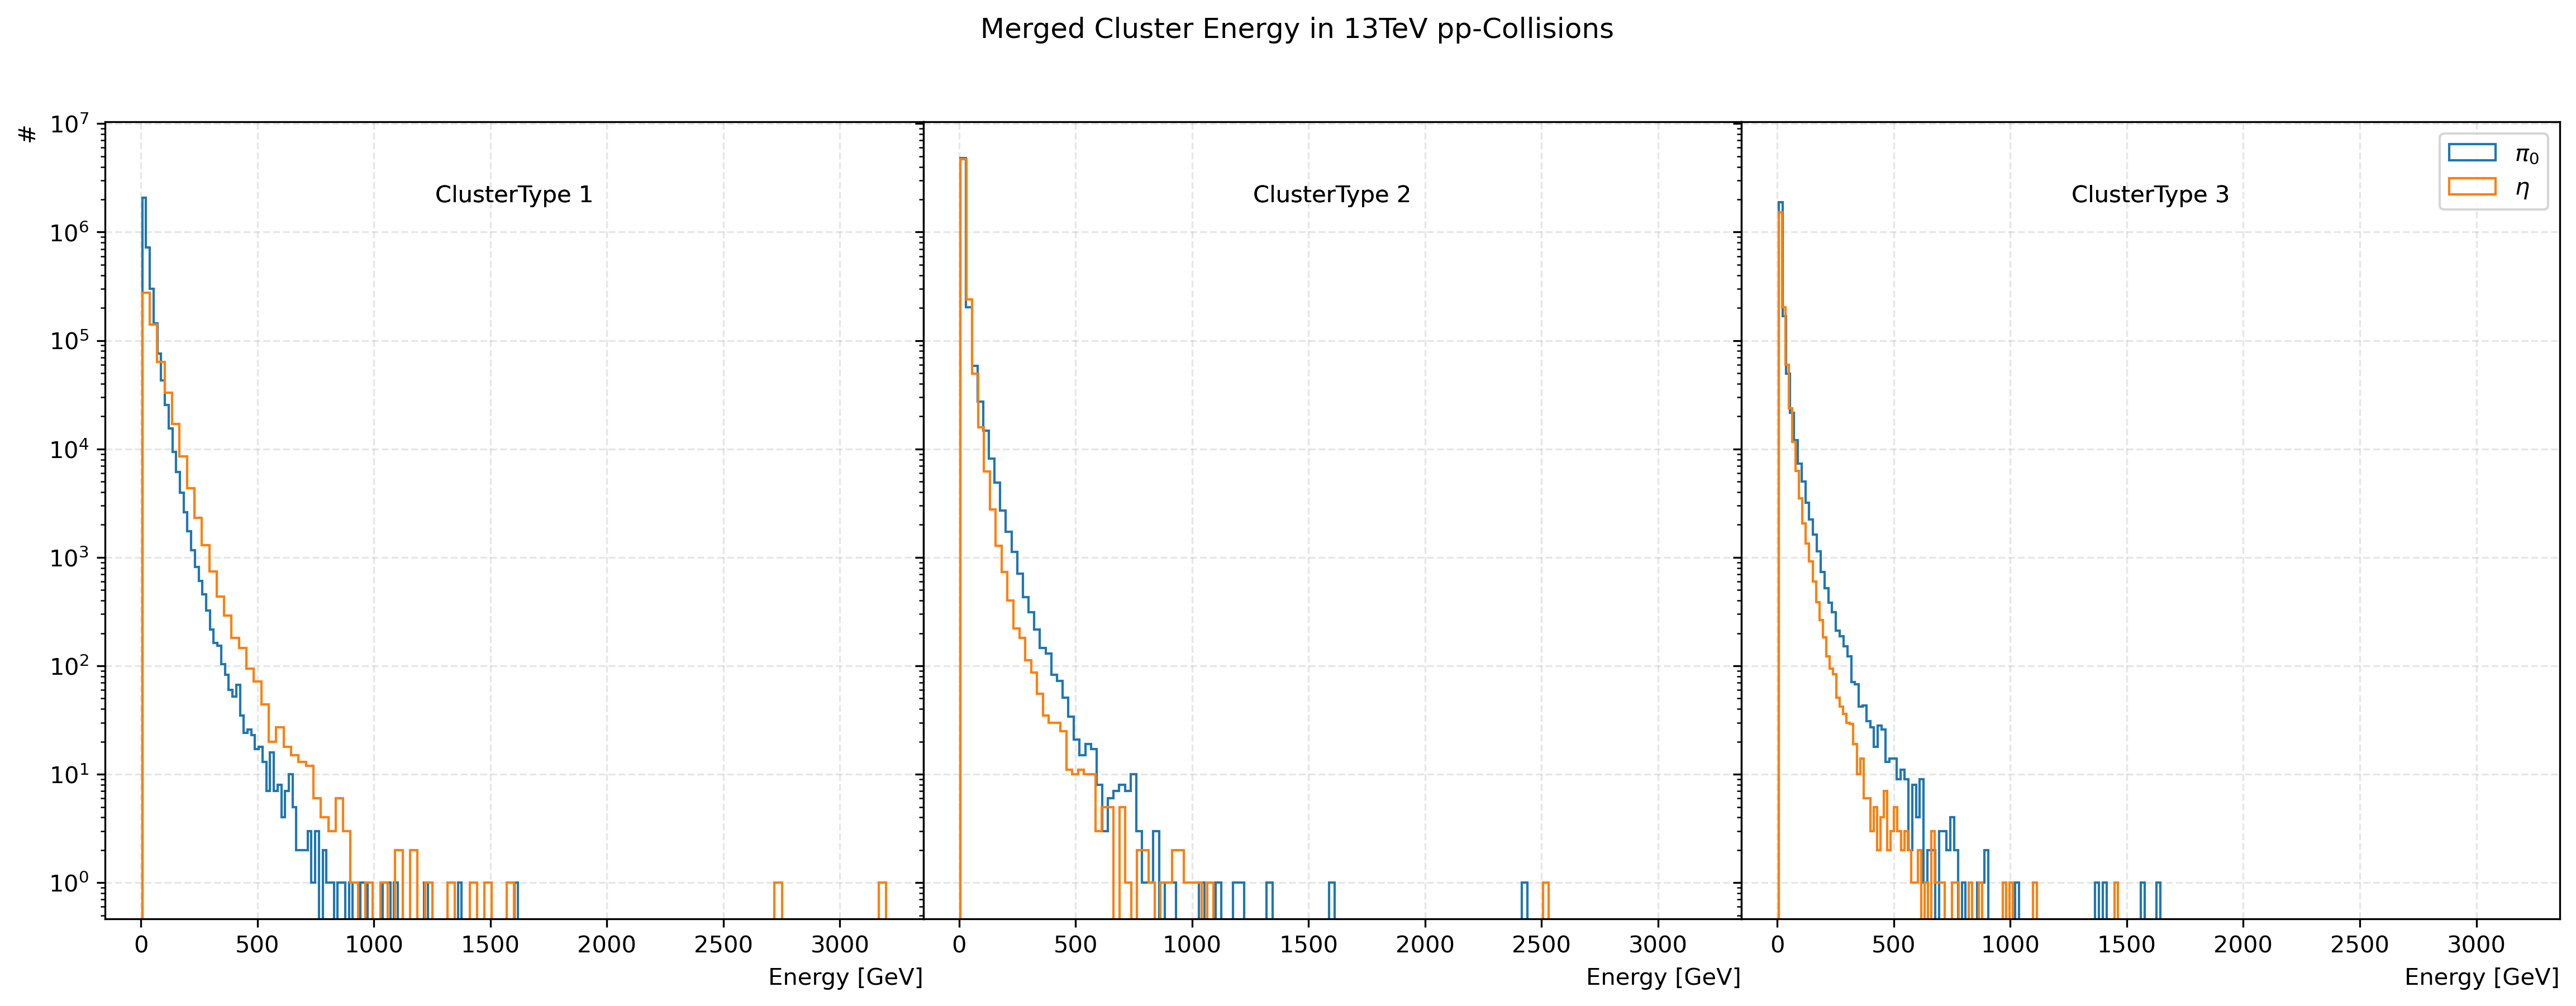

In [37]:
plot_energy_cltype(dicts[0:2], labels[0:2])

In [38]:
def plot_pt(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterPt"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster Pt in 13TeV pp-Collisions")
    ax.set_xlabel("pt [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clusterpt.pdf", dpi=300, bbox_inches='tight')
    
def plot_pt_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterPt"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("pt [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1), horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster Pt in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/clusterpt_type.pdf", dpi=300, bbox_inches='tight')

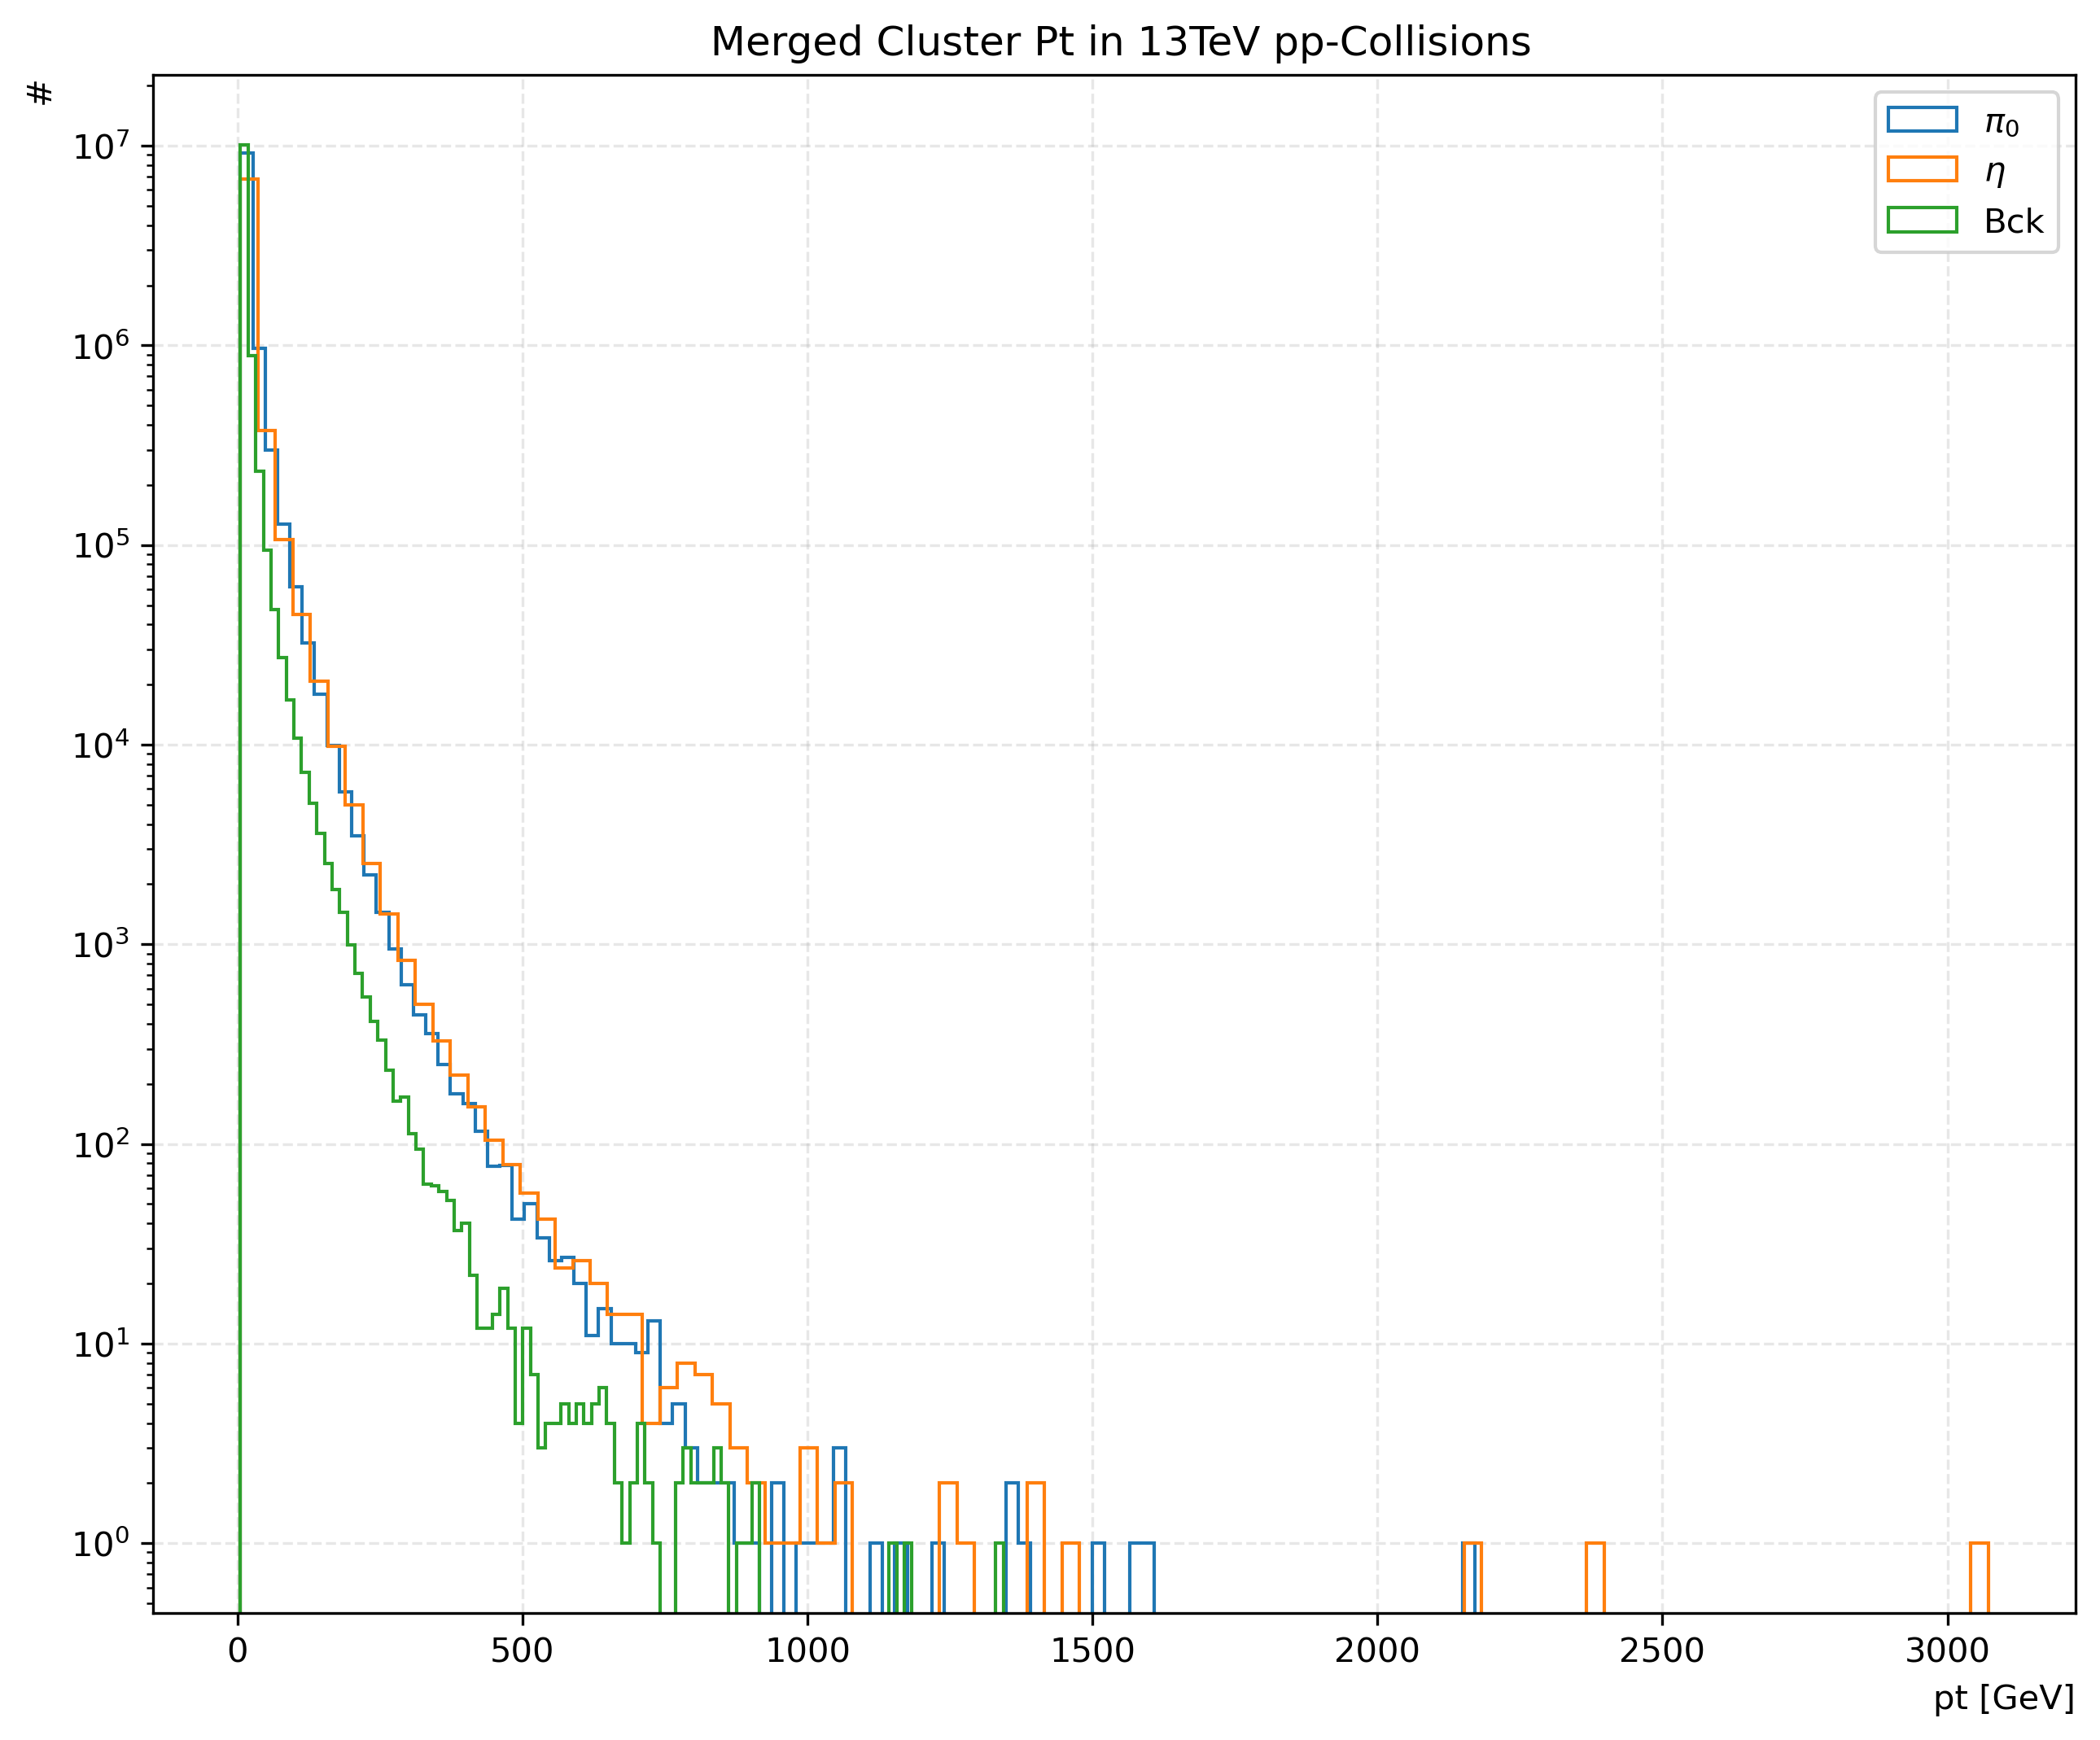

In [39]:
plot_pt(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


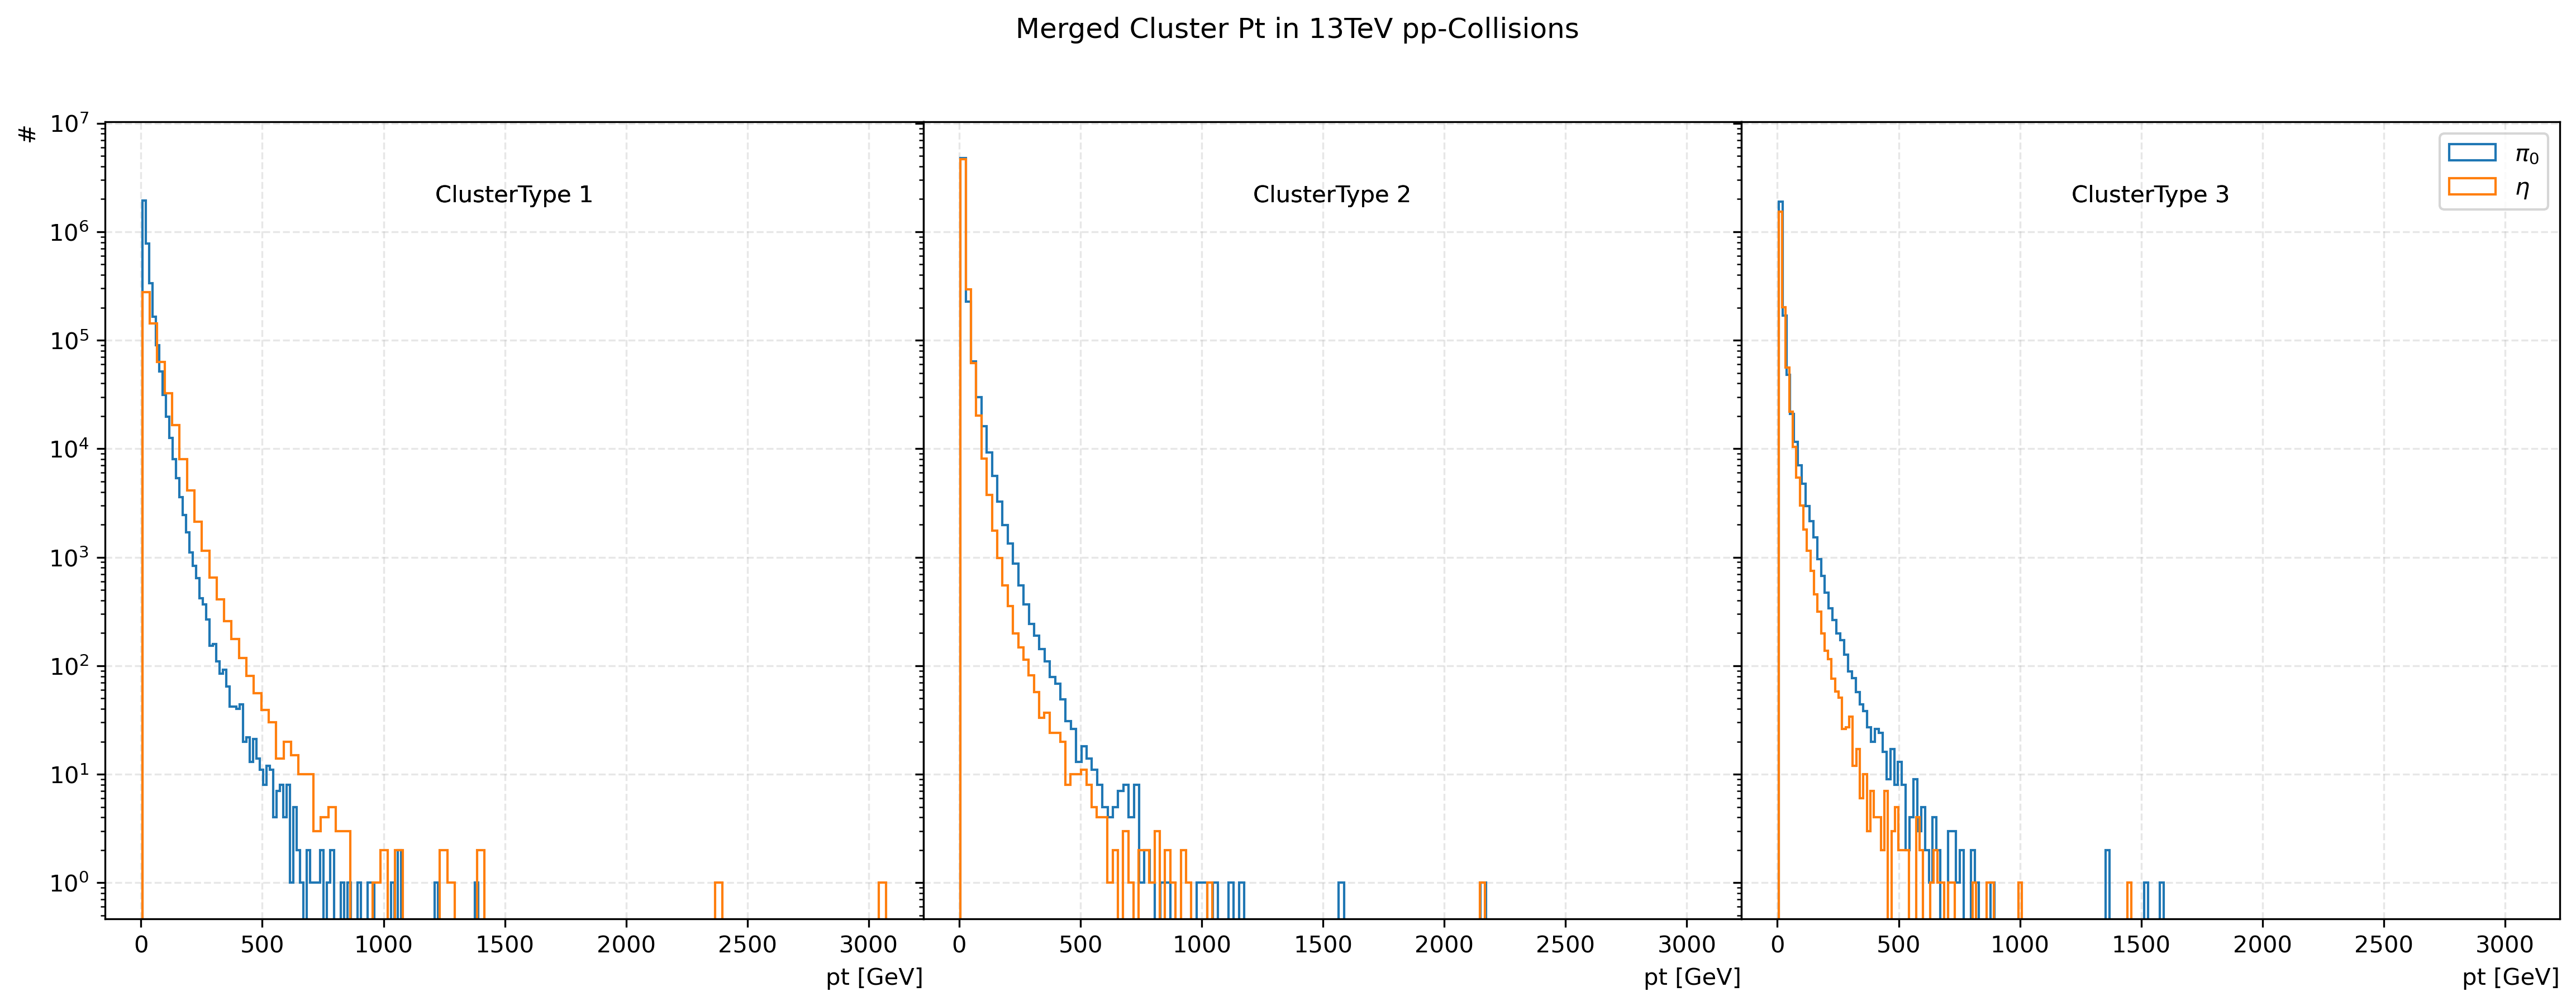

In [40]:
plot_pt_cltype(dicts[0:2], labels[0:2])

In [41]:
def plot_dist(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterDistFromVert"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster Distance from Vertex in 13TeV pp-Collisions")
    ax.set_xlabel("Distance [cm]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clusterdist.pdf", dpi=300, bbox_inches='tight')
    
def plot_dist_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterDistFromVert"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Distance [cm]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1),horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster Energy in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    
    plt.savefig("Plots/clusterdist_type.pdf", dpi=300, bbox_inches='tight')

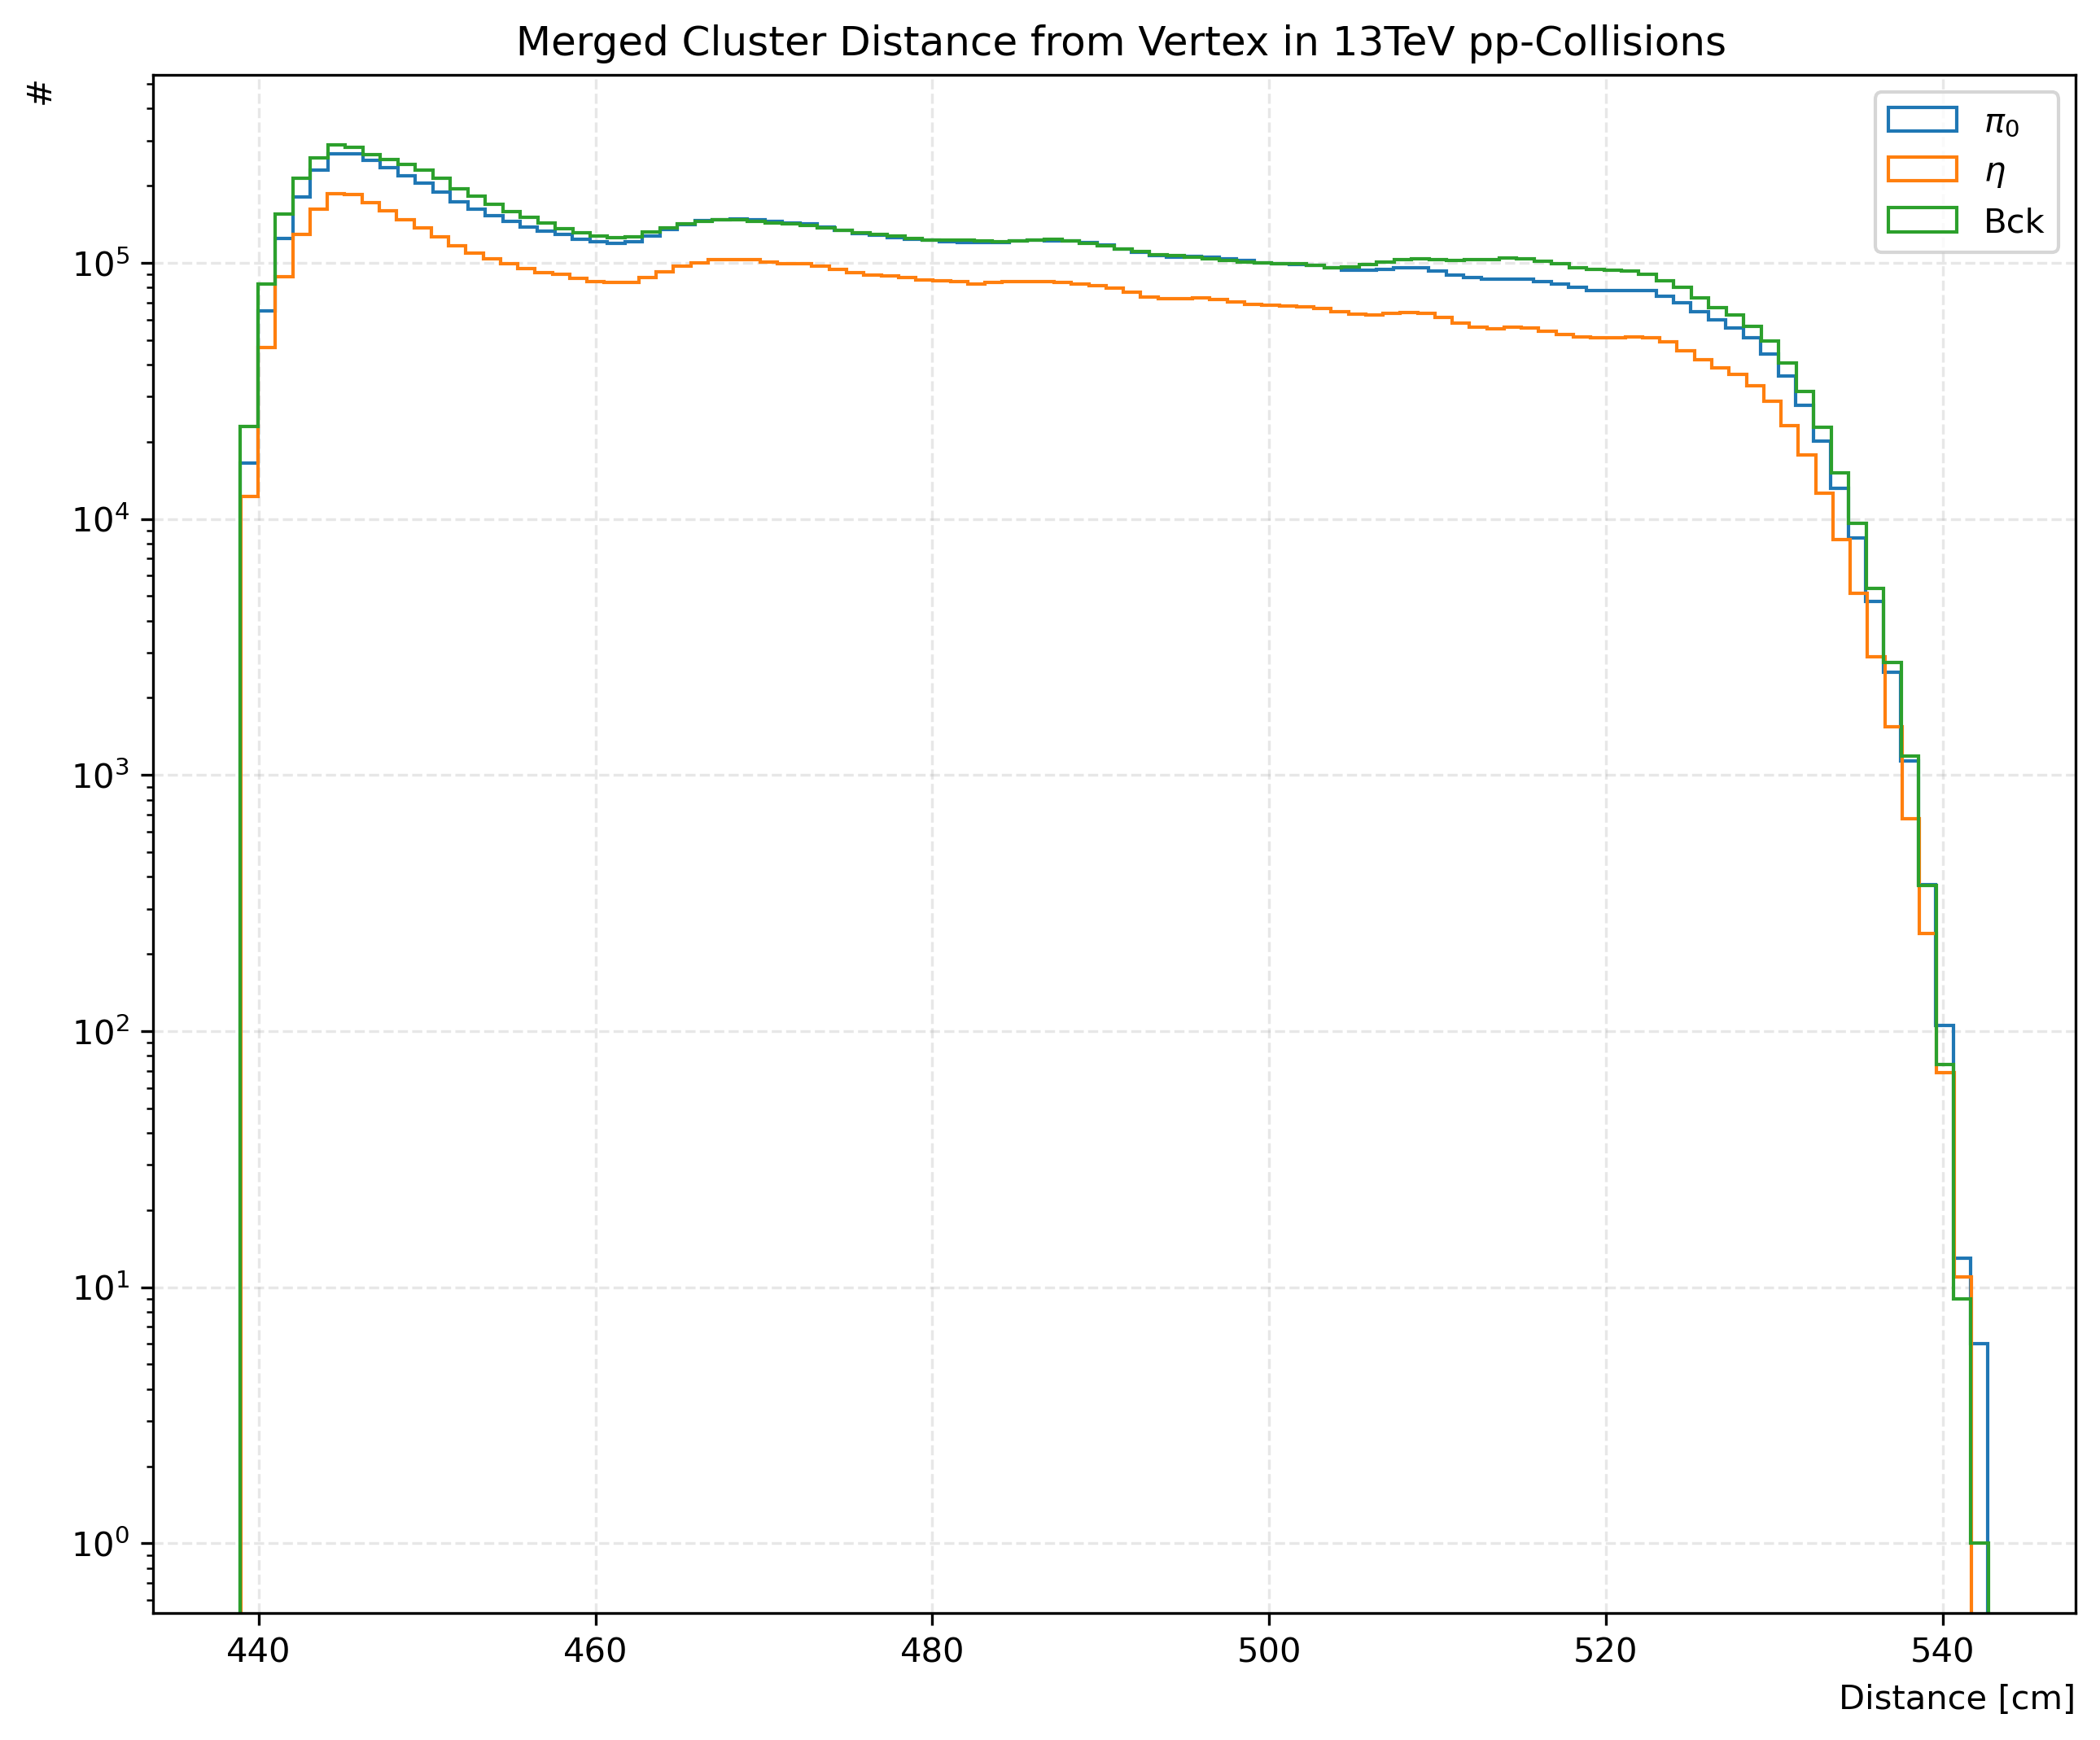

In [42]:
plot_dist(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


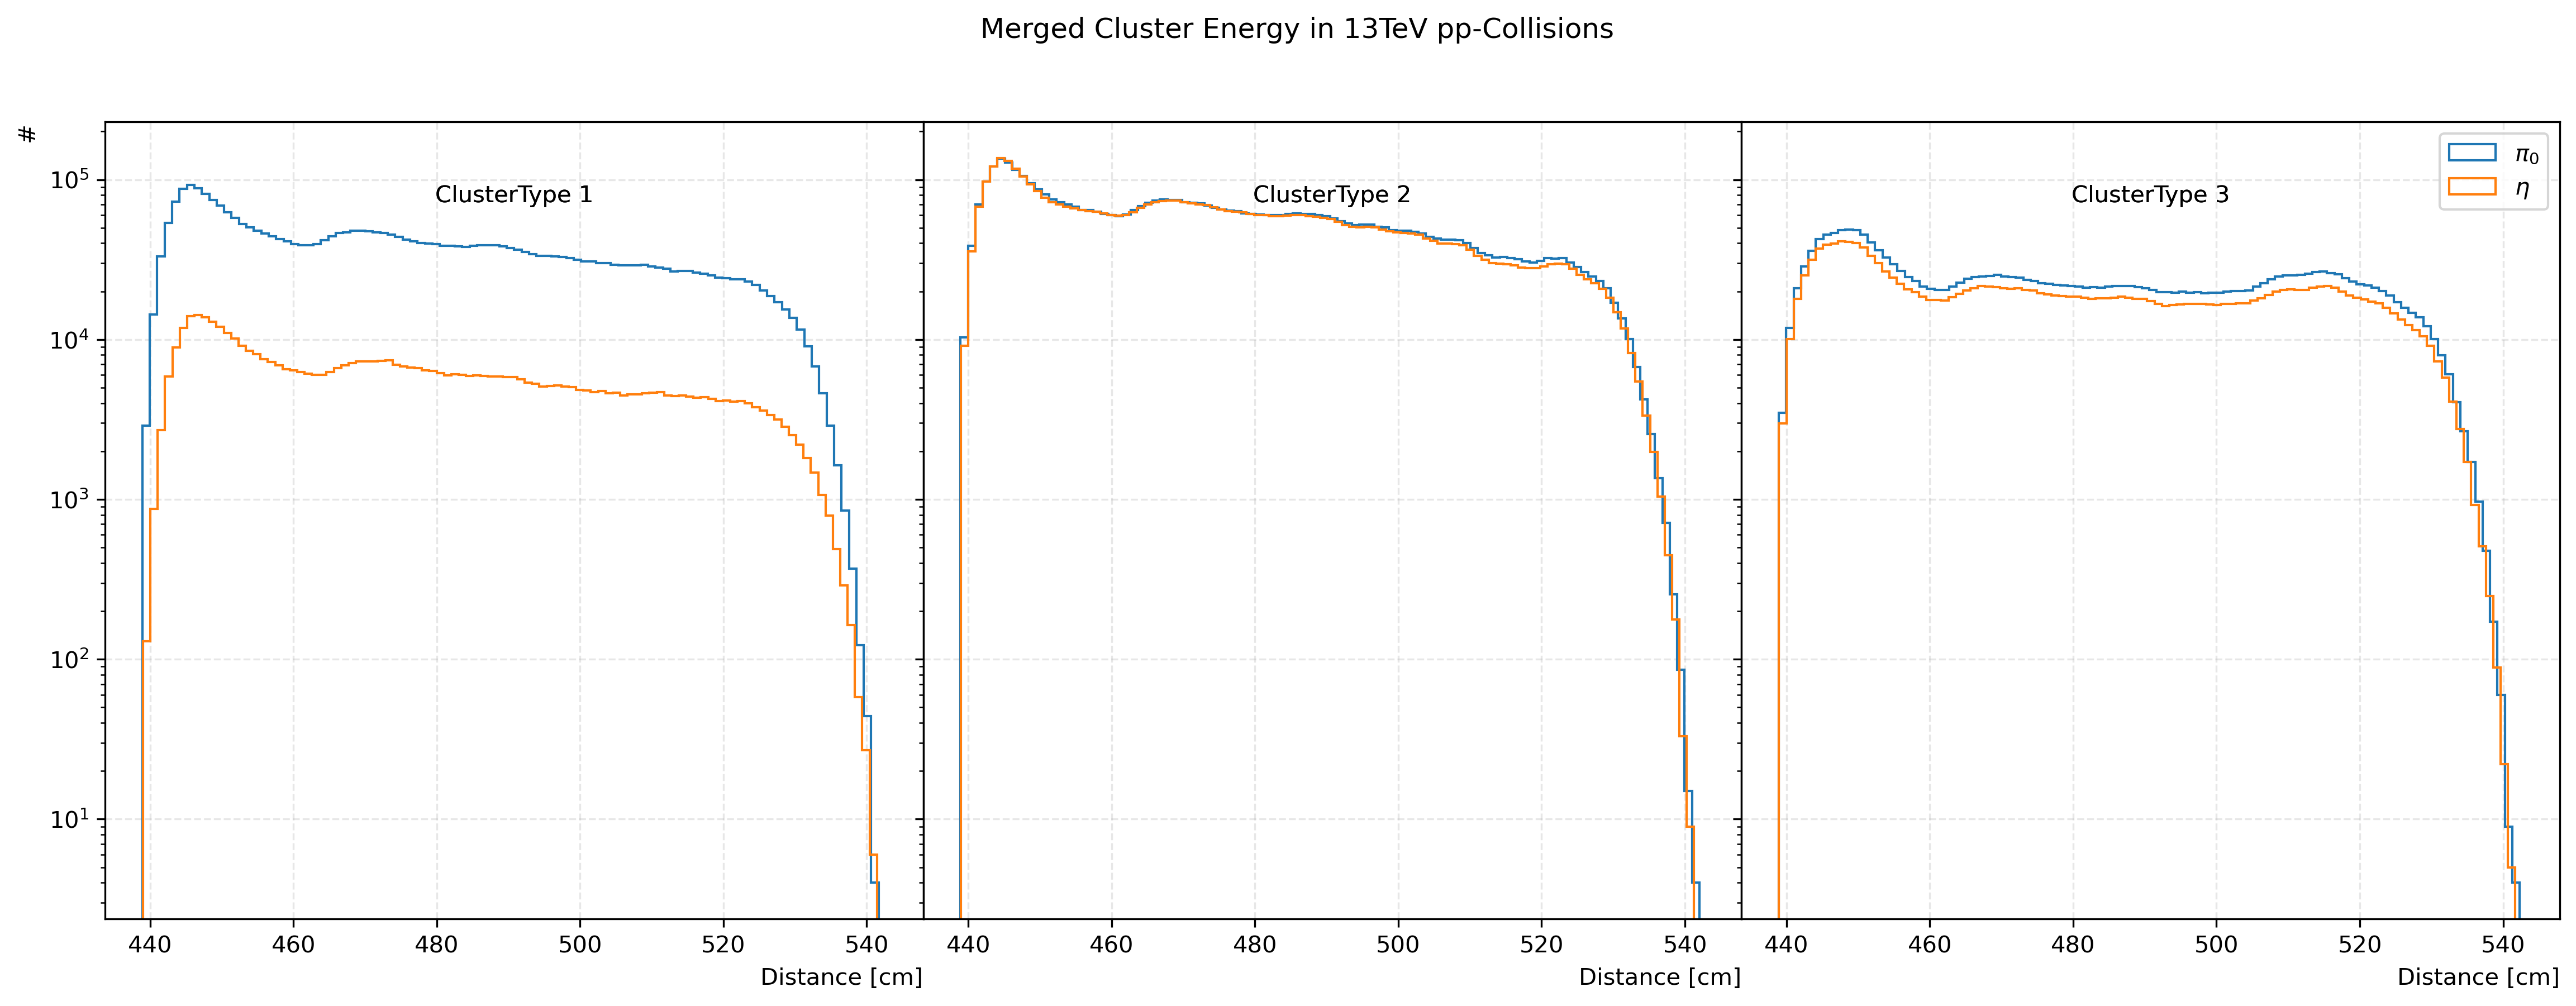

In [43]:
plot_dist_cltype(dicts[0:2], labels[0:2])

## Cluster M02 and M20

In [44]:
def plot_m02(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterM02"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster M02 in 13TeV pp-Collisions")
    ax.set_xlabel("M02 [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clusterm02.pdf", dpi=300, bbox_inches='tight')
    
def plot_m02_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterM02"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("M02 [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1),horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster M02 in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    
    plt.savefig("Plots/clusterm02_type.pdf", dpi=300, bbox_inches='tight')

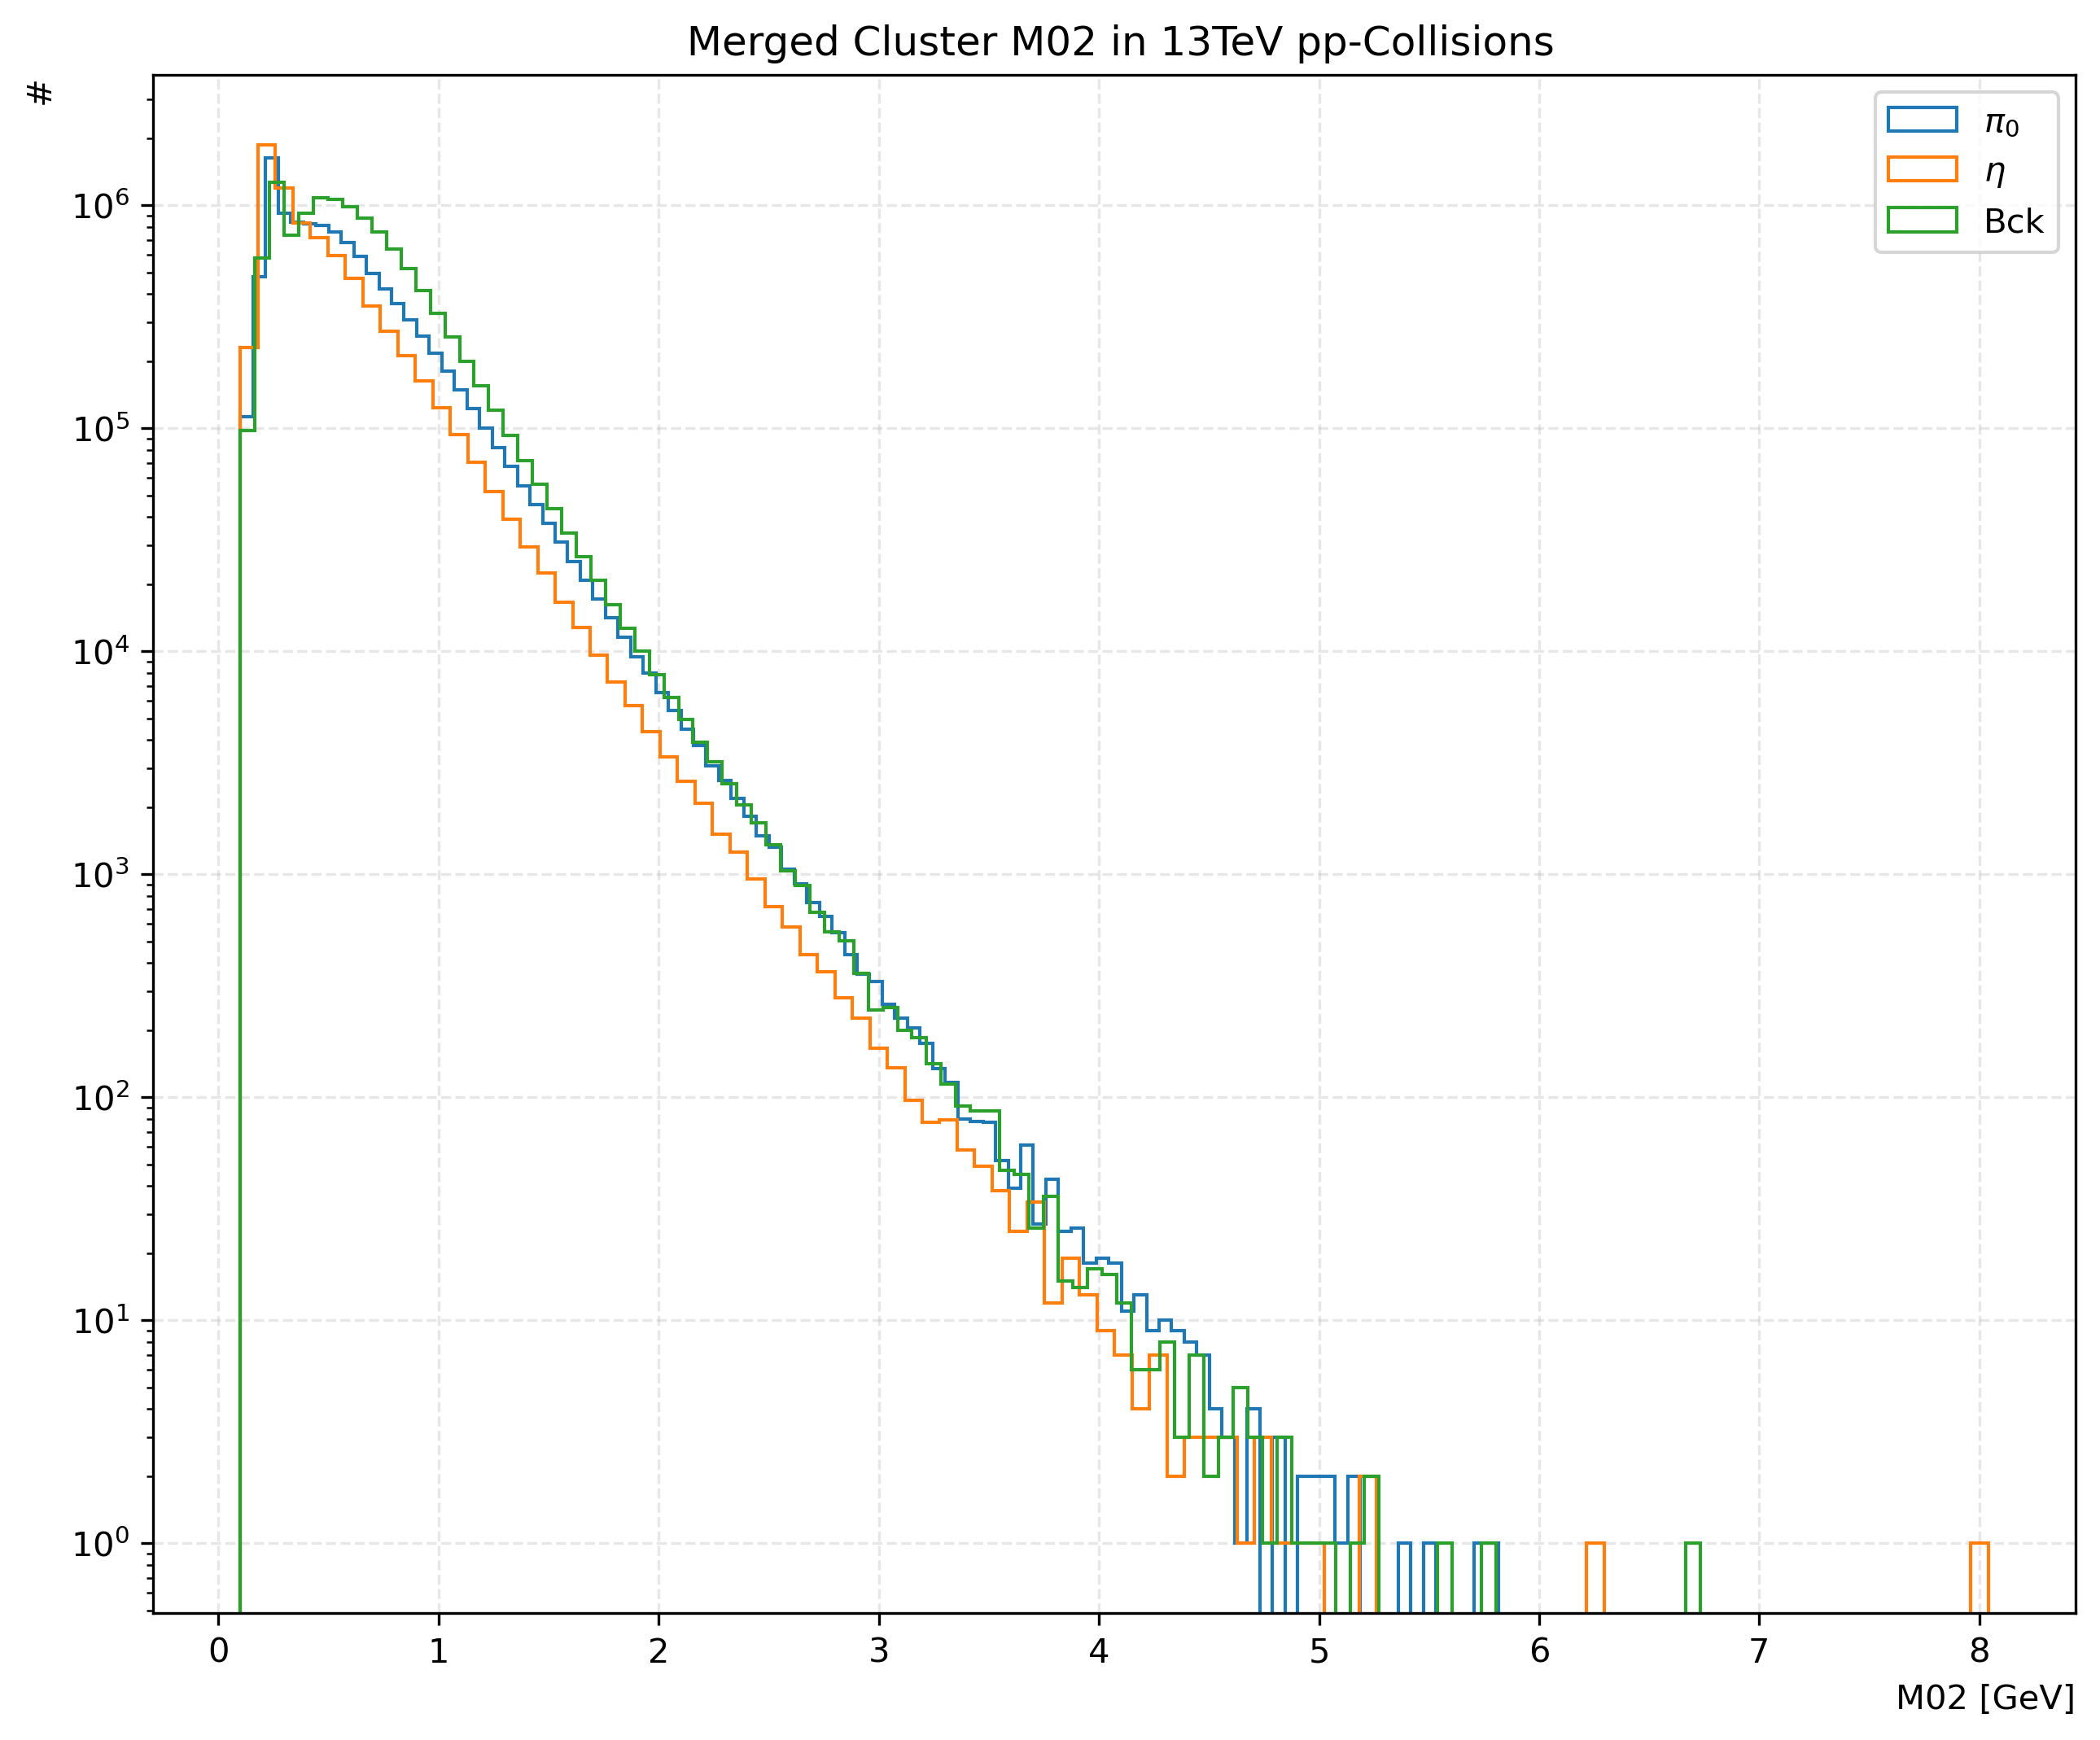

In [45]:
plot_m02(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


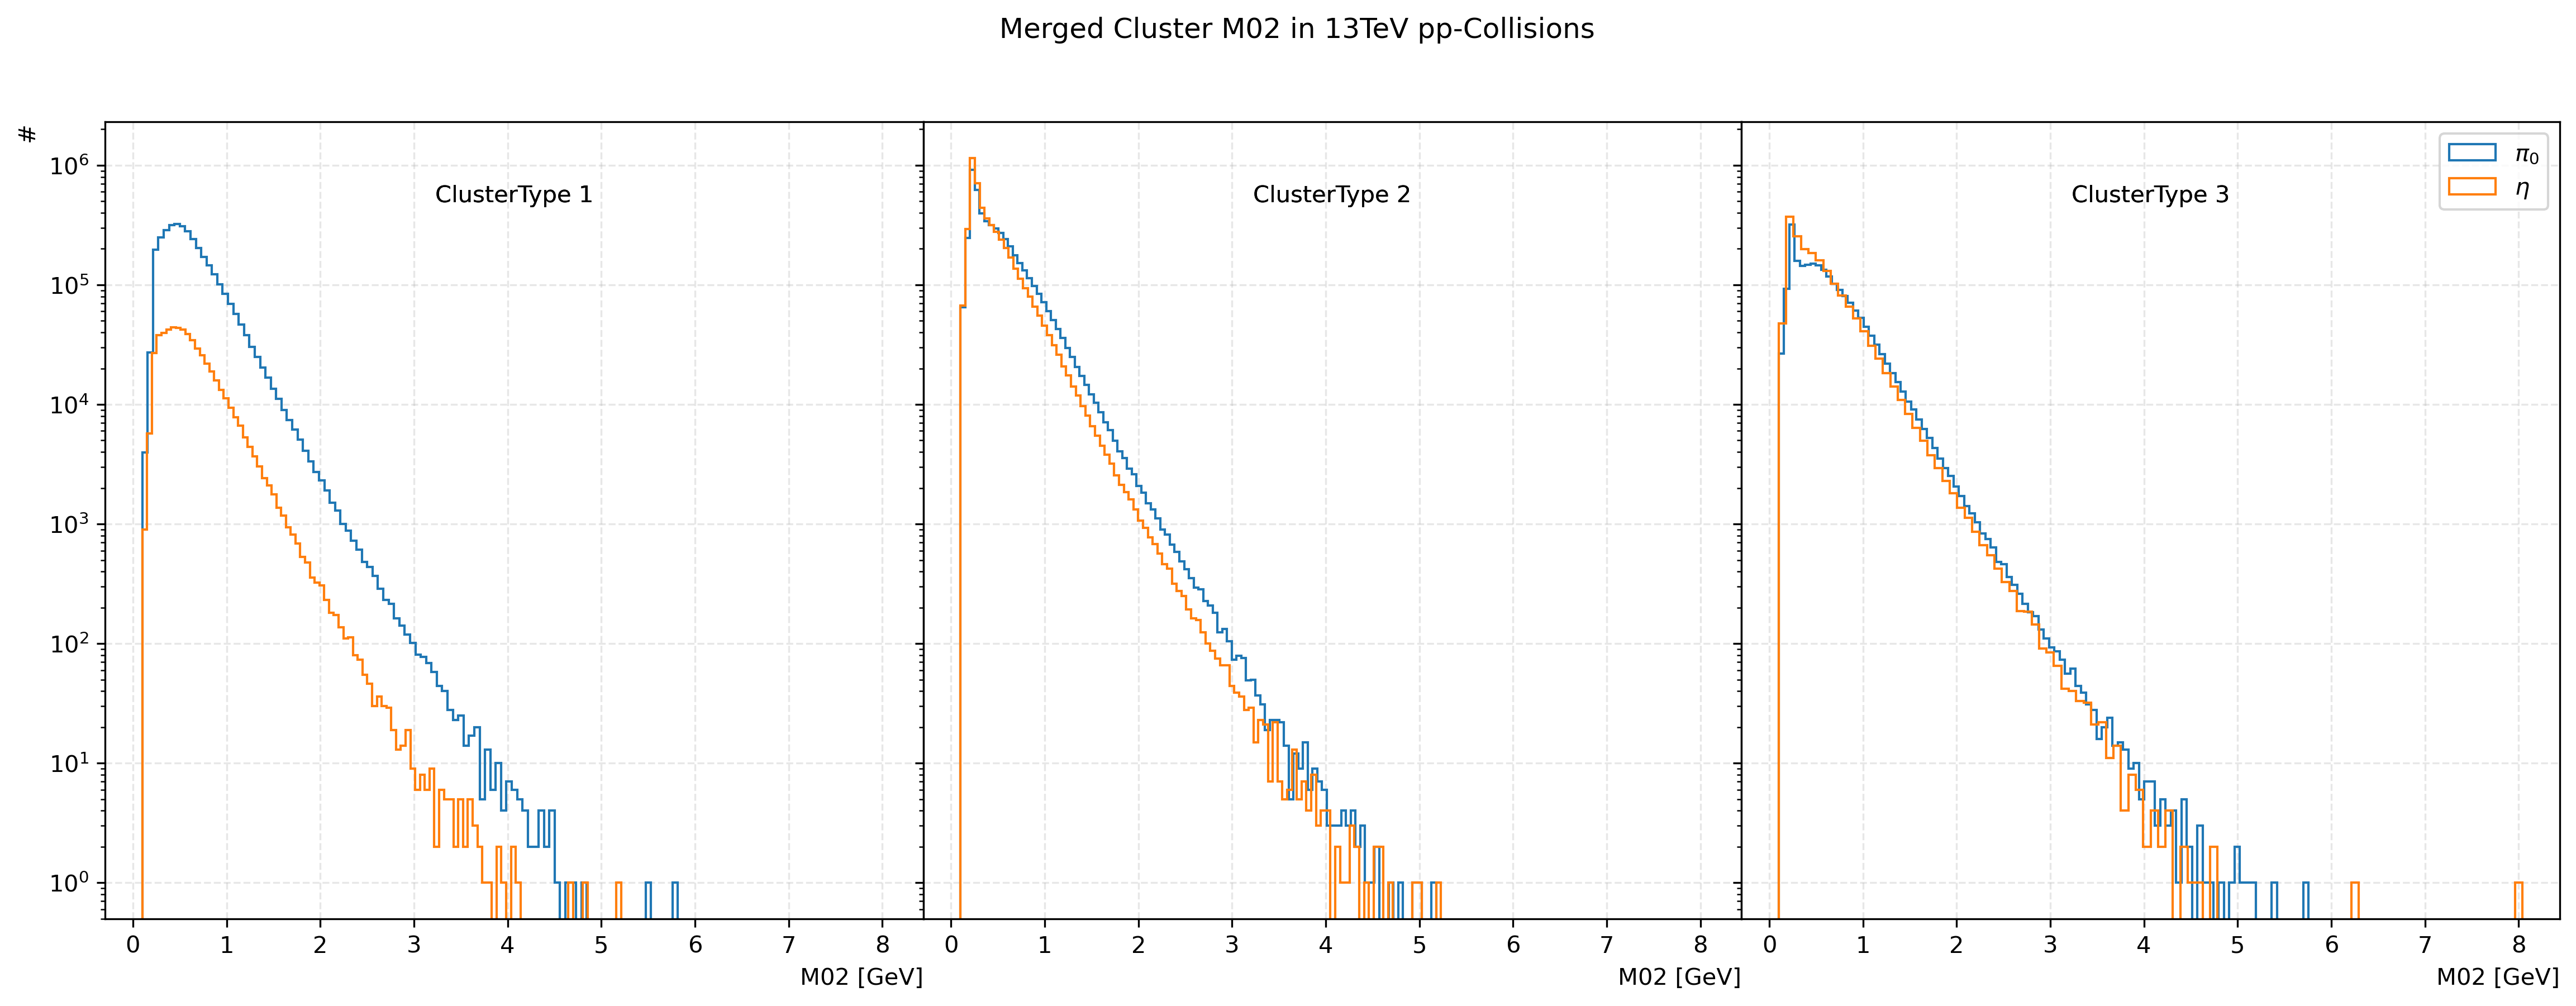

In [46]:
plot_m02_cltype(dicts[0:2], labels[0:2])

In [47]:
def plot_m20(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterM20"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster M20 in 13TeV pp-Collisions")
    ax.set_xlabel("M20 [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clusterm20.pdf", dpi=300, bbox_inches='tight')
    
def plot_m20_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterM20"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("M20 [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1),horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster M20 in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    
    plt.savefig("Plots/clusterm20_type.pdf", dpi=300, bbox_inches='tight')

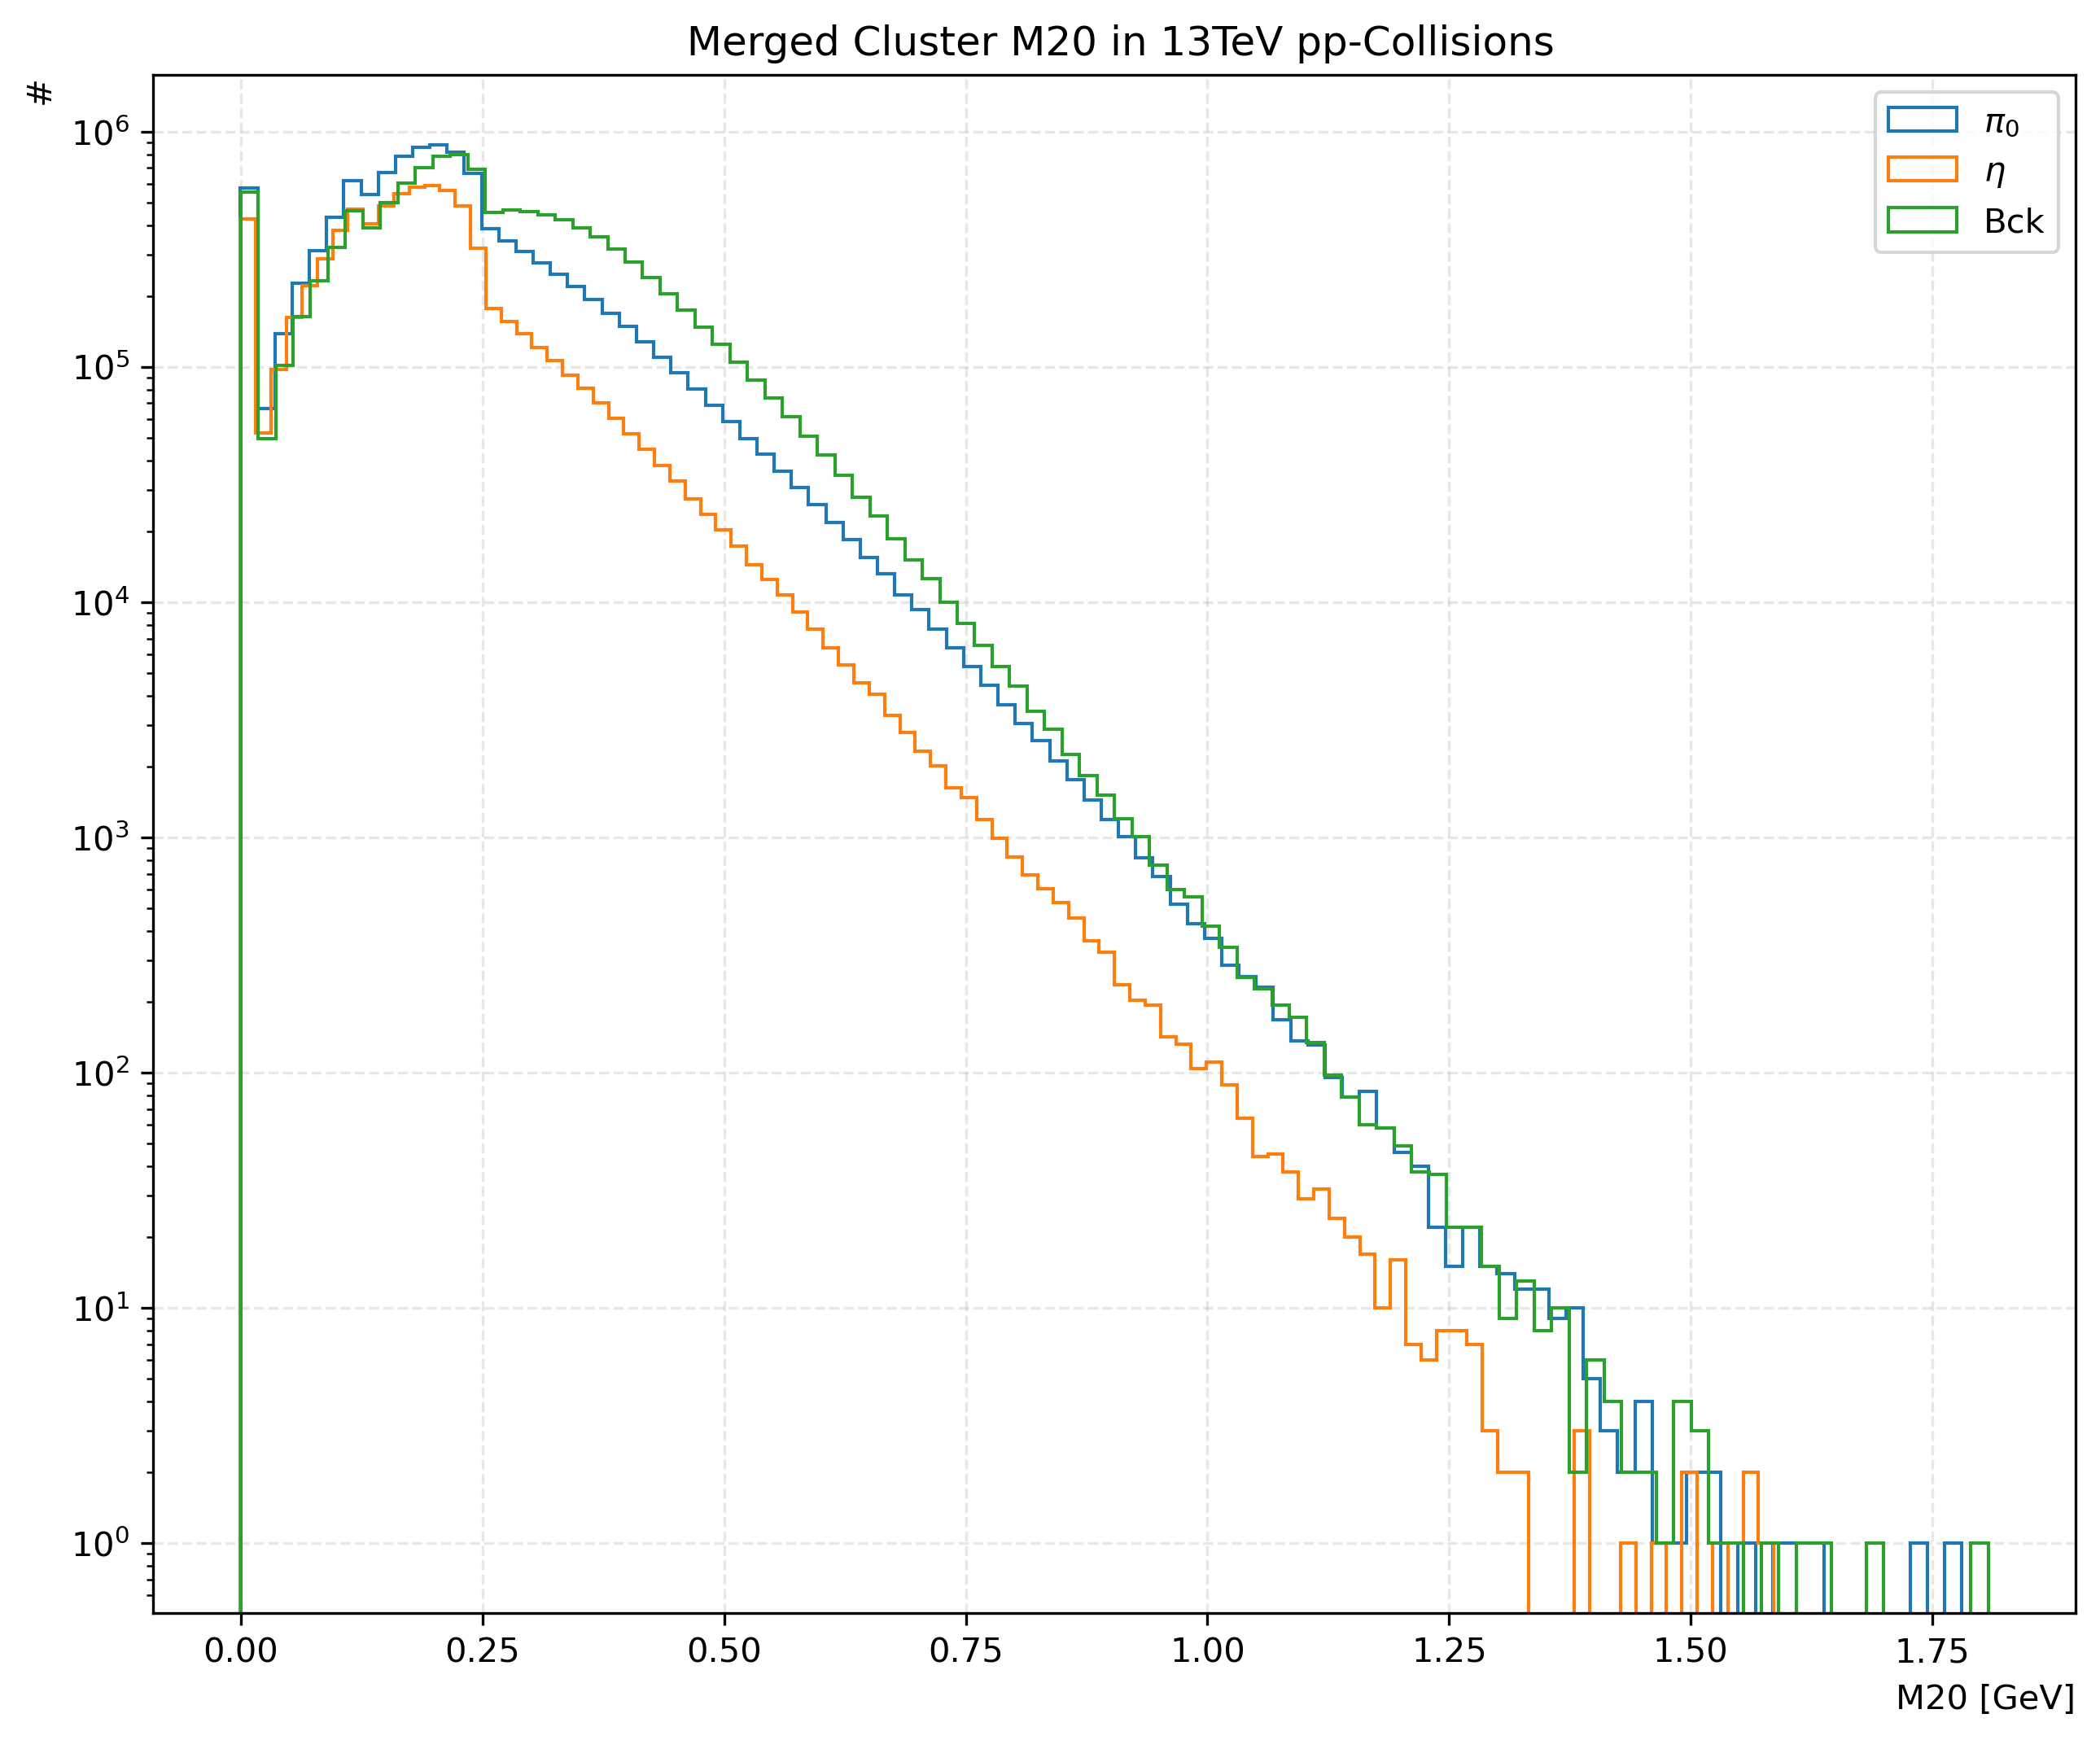

In [48]:
plot_m20(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


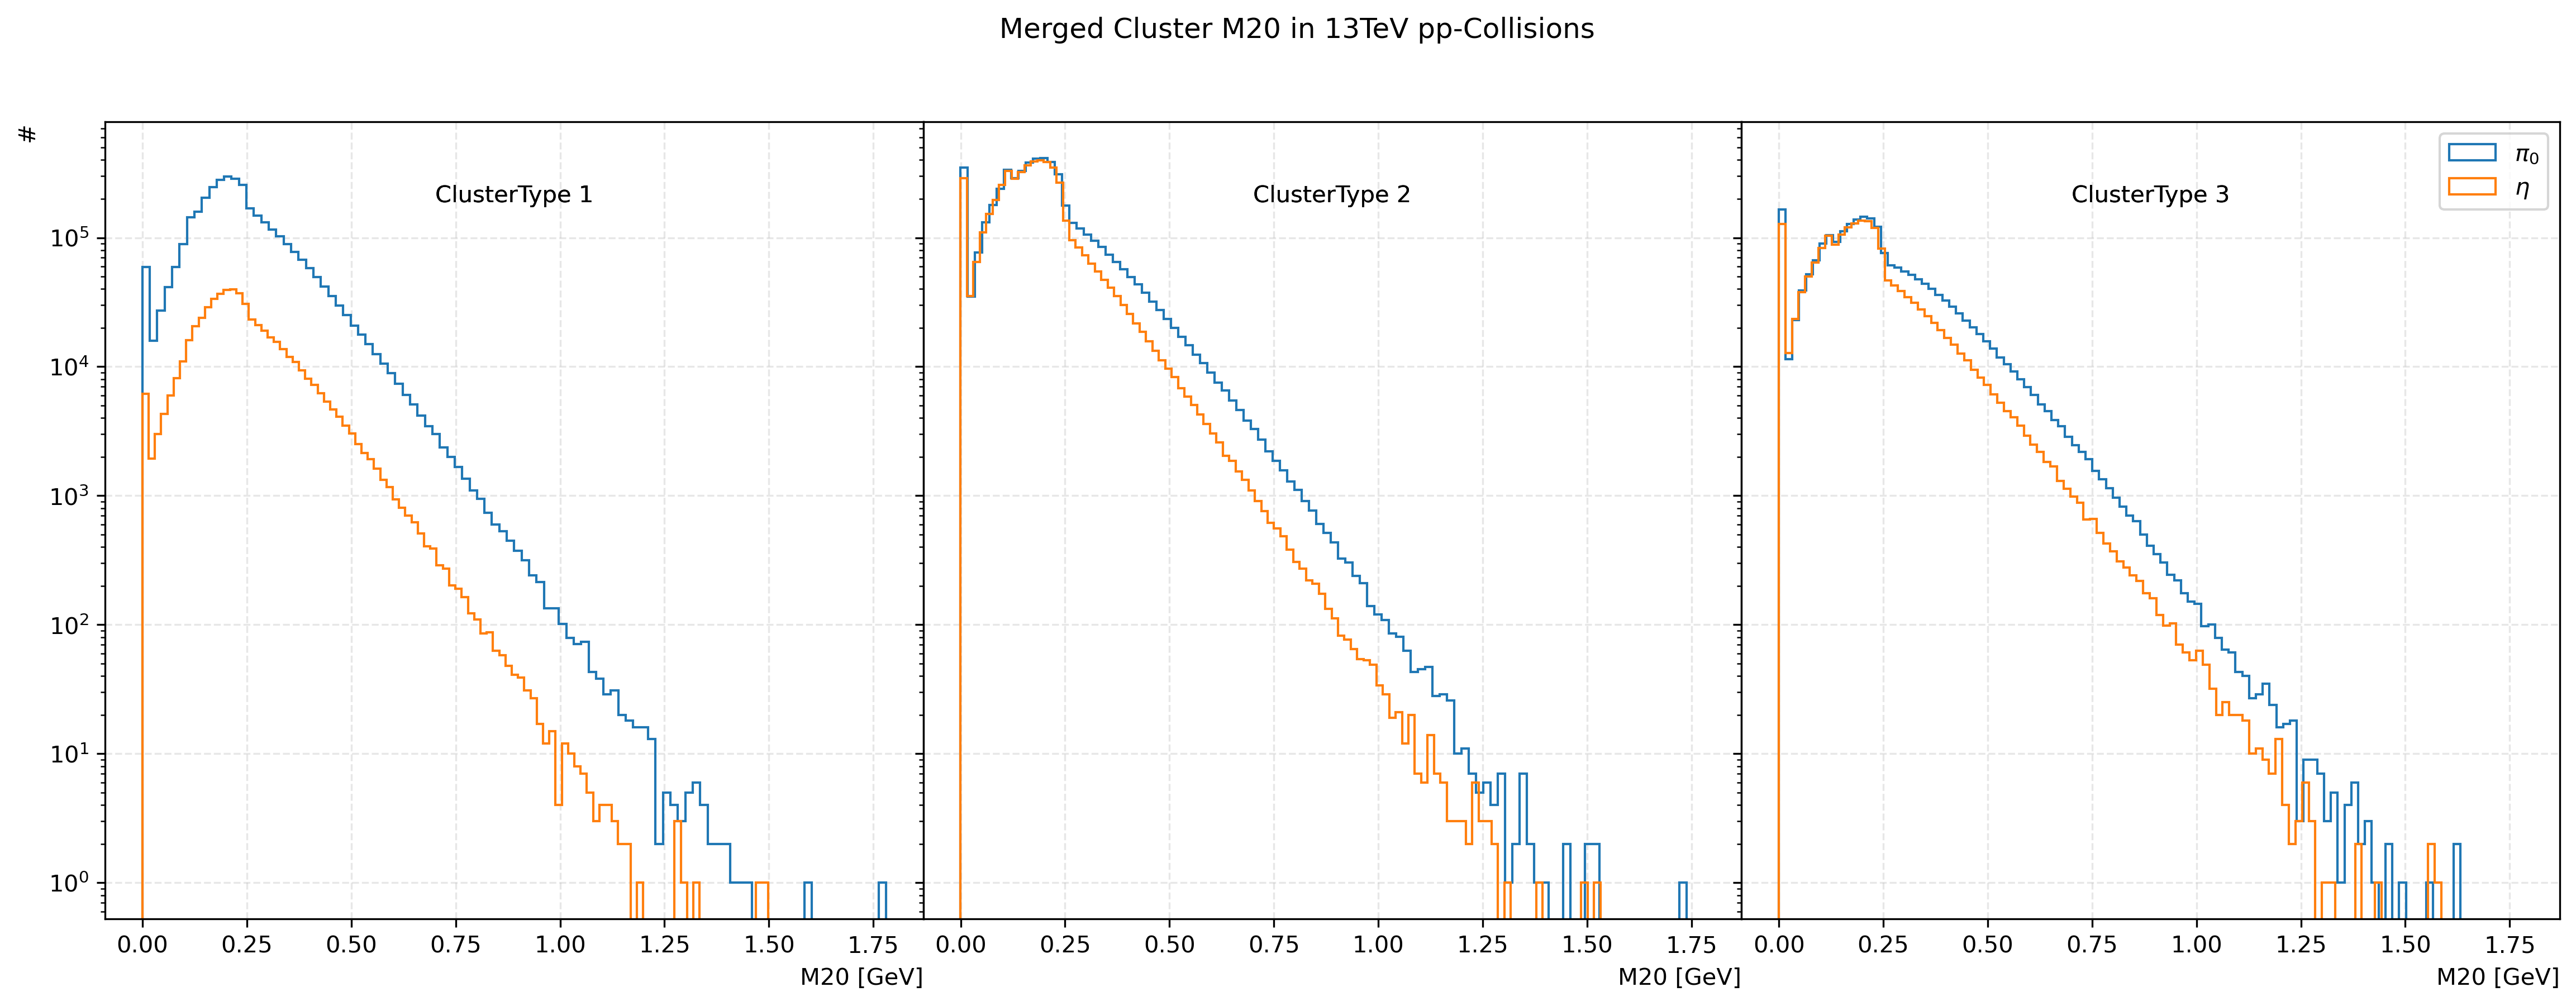

In [49]:
plot_m20_cltype(dicts[0:2], labels[0:2])

## Particle Energy and Pt 

In [50]:
def plot_part_e(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["PartE"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Particle energie in 13TeV pp-Collisions")
    ax.set_xlabel("Energy [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/parte.pdf", dpi=300, bbox_inches='tight')
    
def plot_part_e_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["PartE"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Energy [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1), horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle("Particle energy in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/parte_type.pdf", dpi=300, bbox_inches='tight')

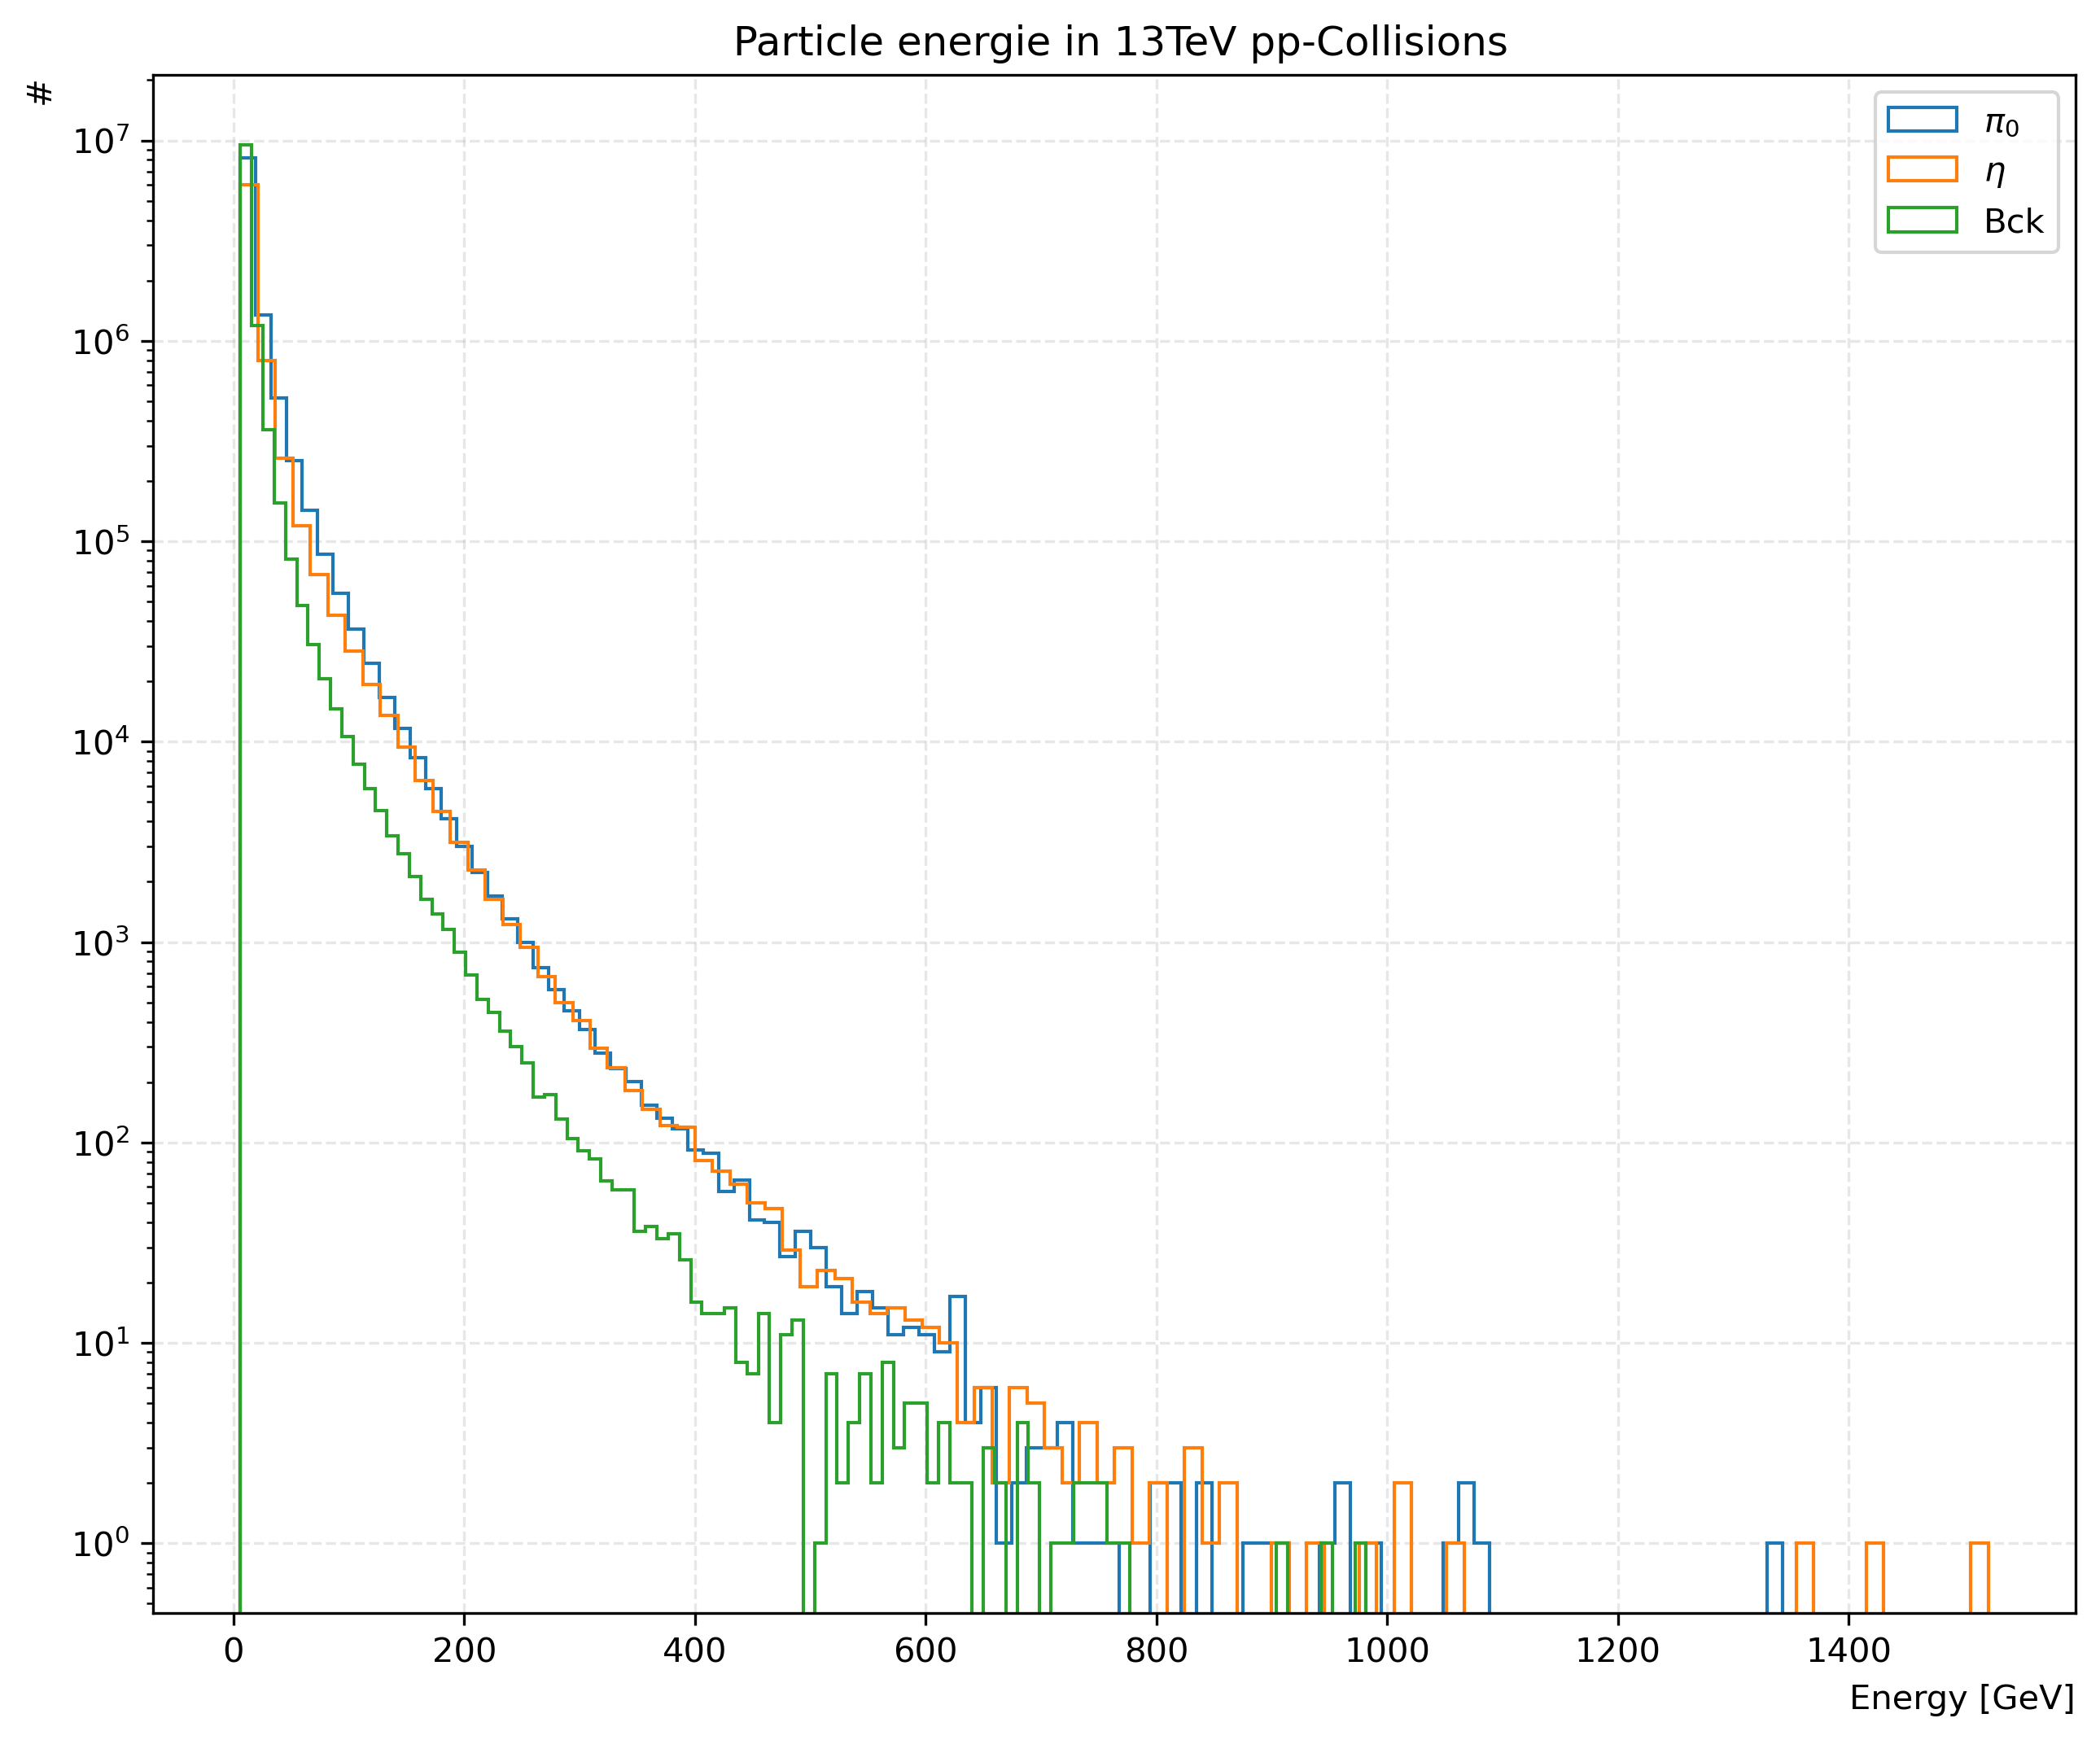

In [51]:
plot_part_e(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


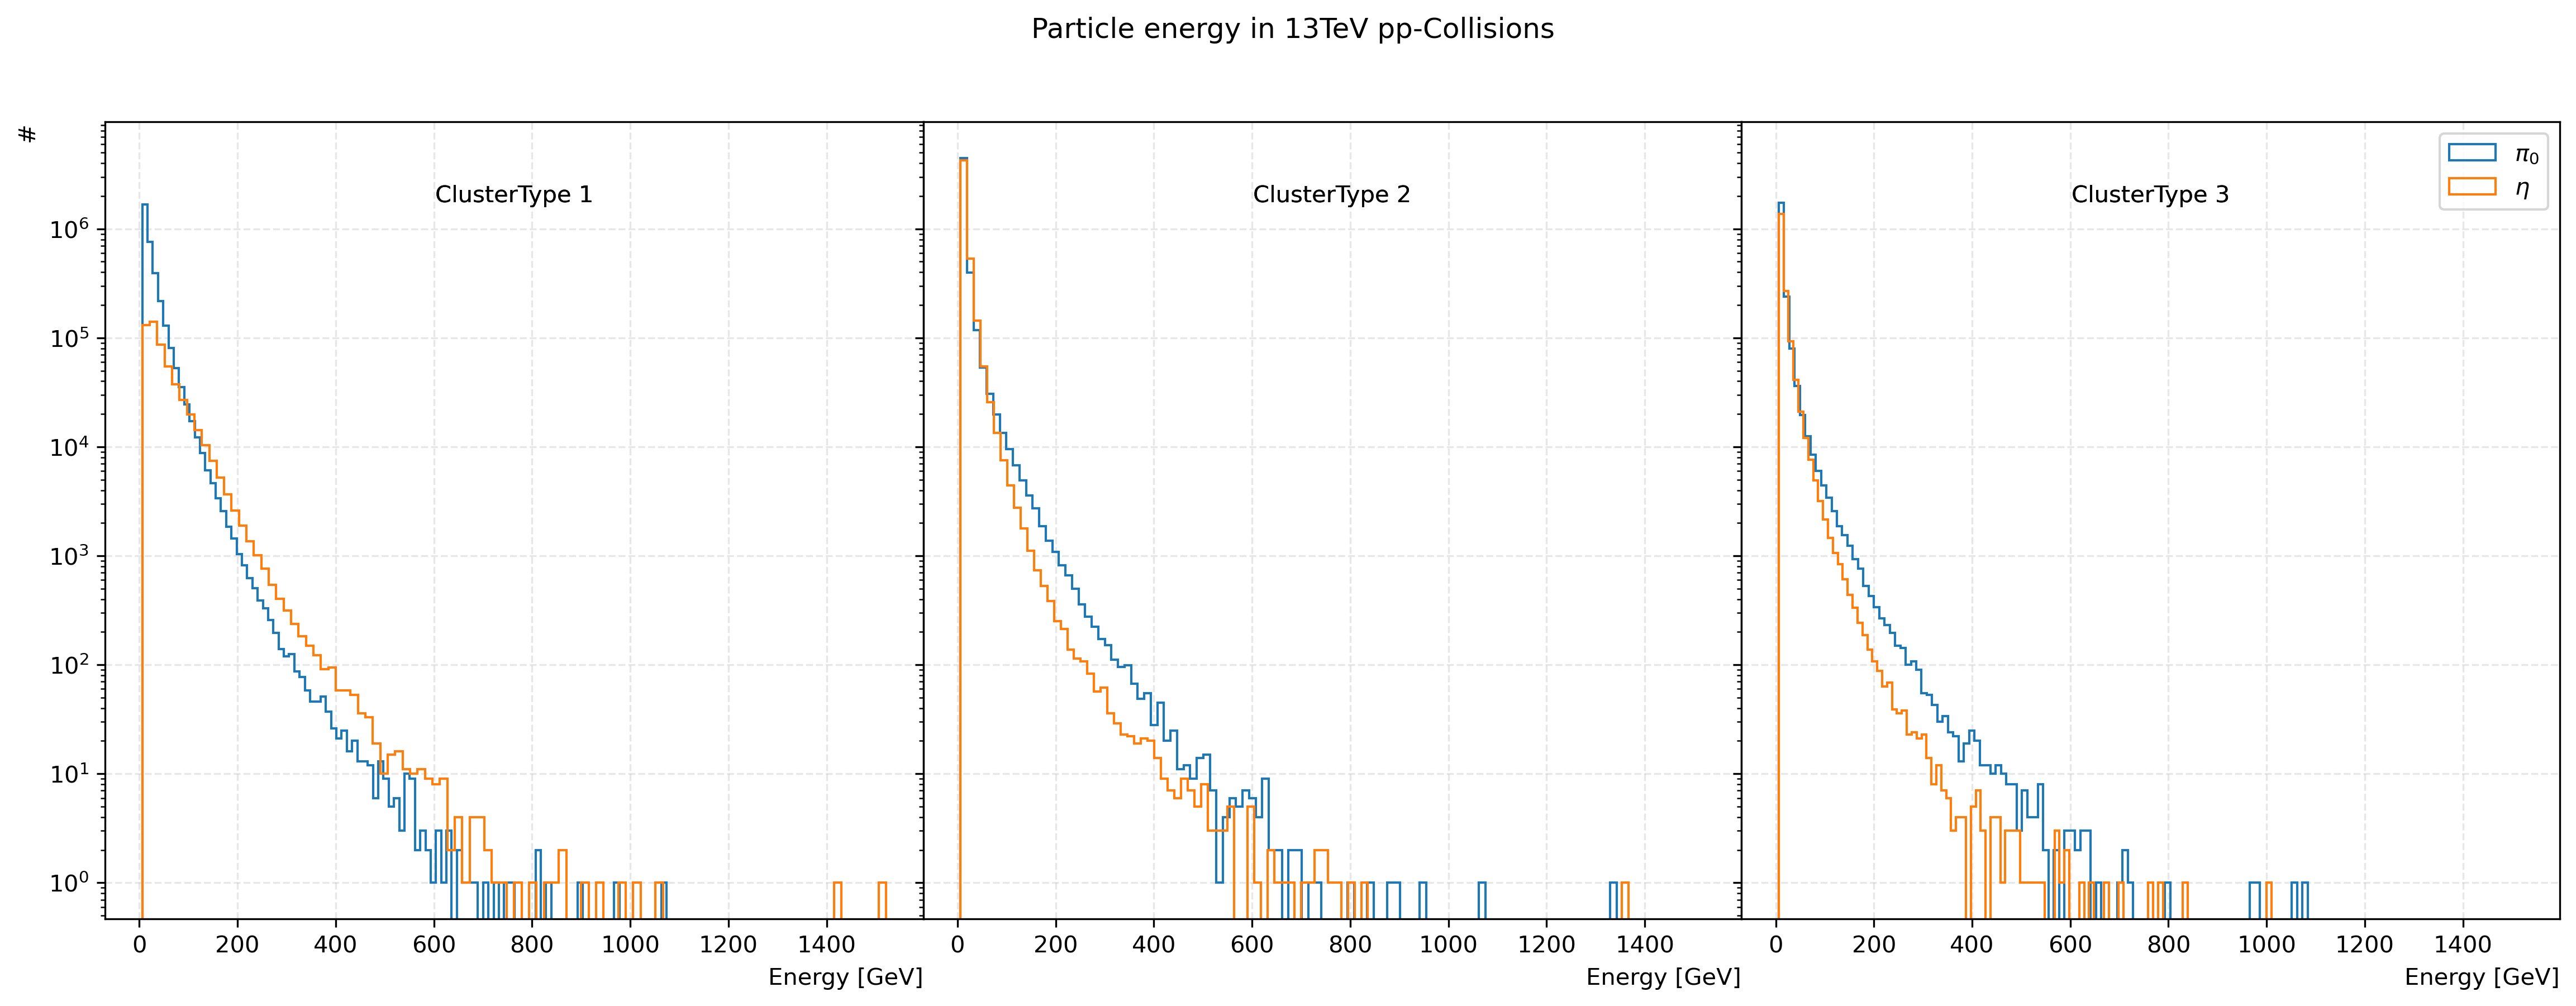

In [52]:
plot_part_e_cltype(dicts[0:2], labels[0:2])

In [53]:
def plot_part_pt(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["PartPt"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Particle pt in 13TeV pp-Collisions")
    ax.set_xlabel("pt [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/partpt.pdf", dpi=300, bbox_inches='tight')
    
def plot_part_pt_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["PartPt"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("pt [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1), horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle("Particle pt in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/partpt_type.pdf", dpi=300, bbox_inches='tight')

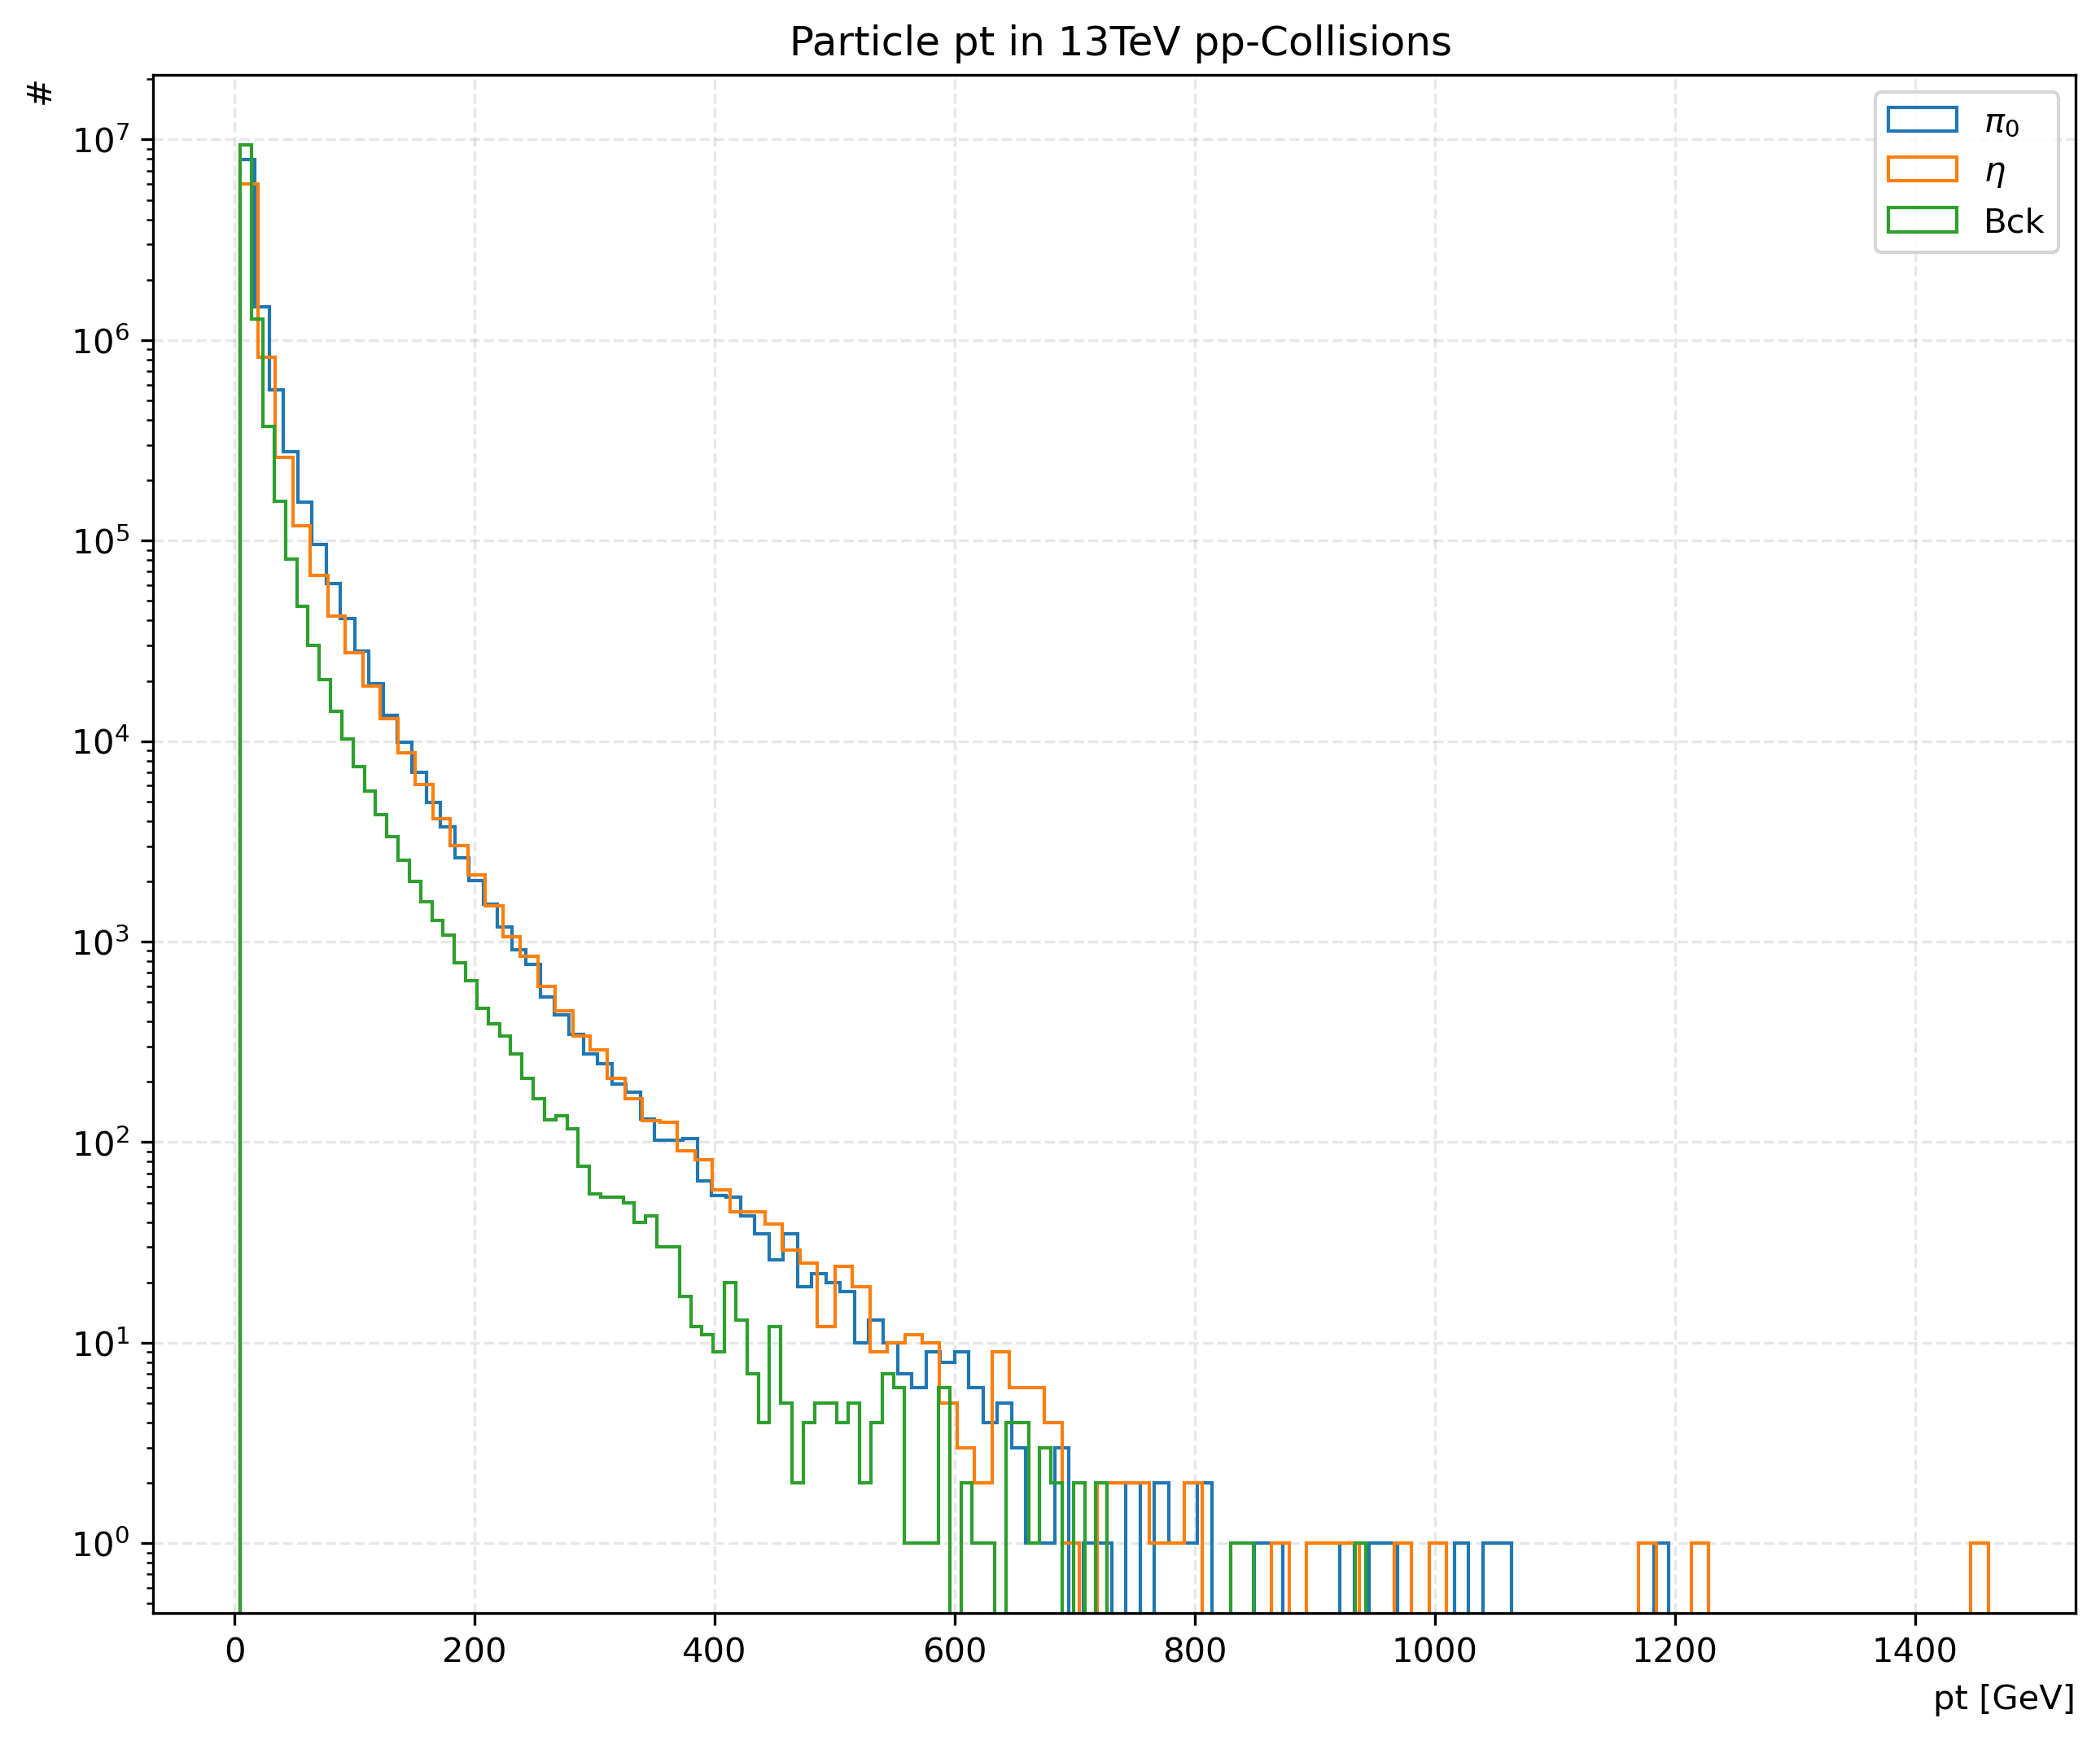

In [54]:
plot_part_pt(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


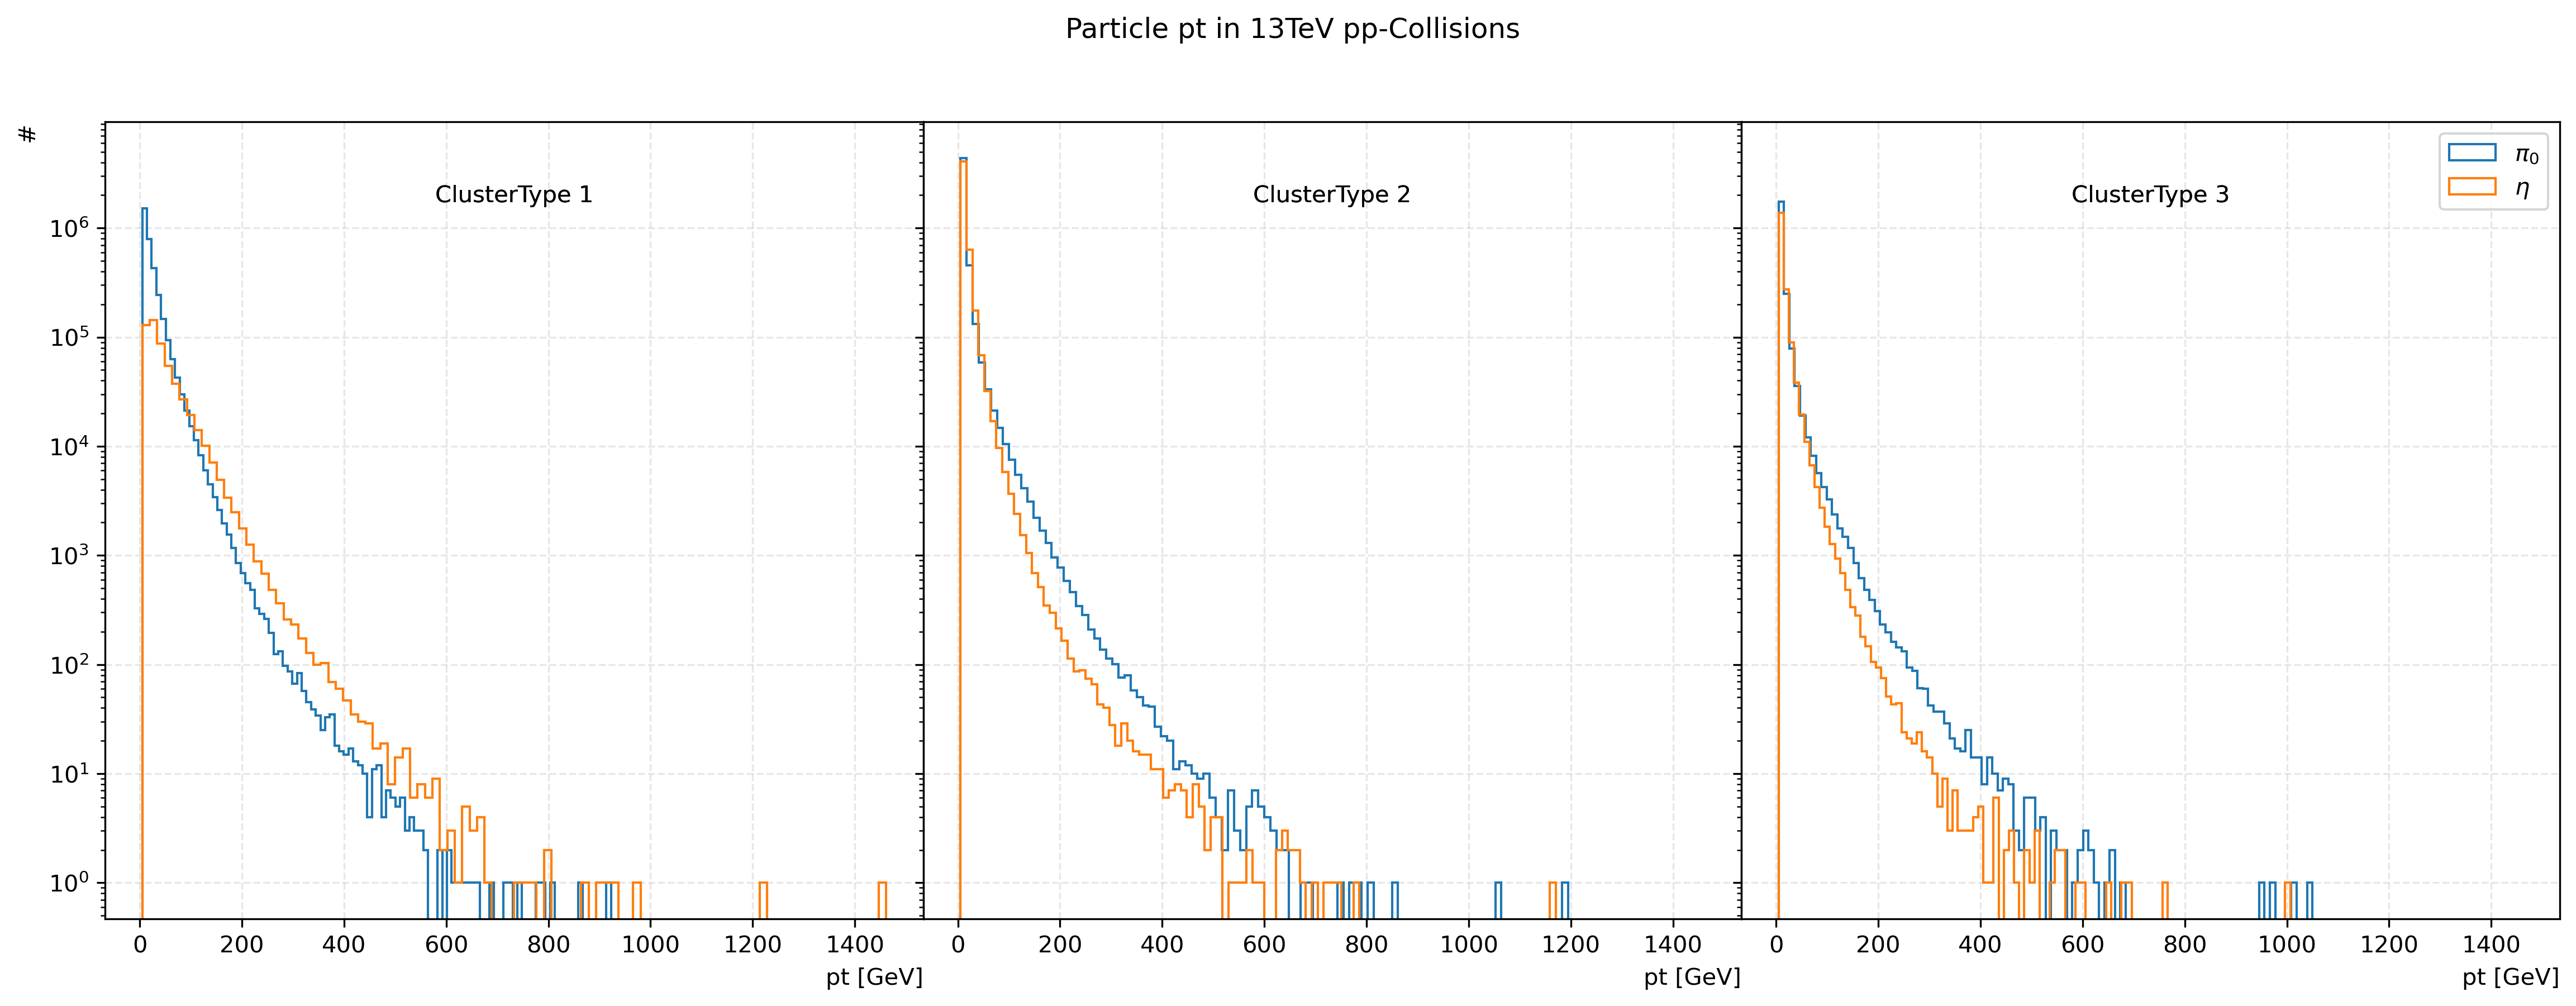

In [55]:
plot_part_pt_cltype(dicts[0:2], labels[0:2])

## Particle Eta and Phi

In [56]:
def plot_part_phi(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["PartPhi"], bins=50, histtype='step', log=True, label=labels[i])
    ax.set_title(" Particle Phi in 13TeV pp-Collisions")
    ax.set_xlabel("Phi", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/partphi.pdf", dpi=300, bbox_inches='tight')
    
def plot_part_phi_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["PartPhi"][dic["ClusterType"] == i+1], bins=50, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Phi", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1), horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle("Particle Phi in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/partphi_type.pdf", dpi=300, bbox_inches='tight')

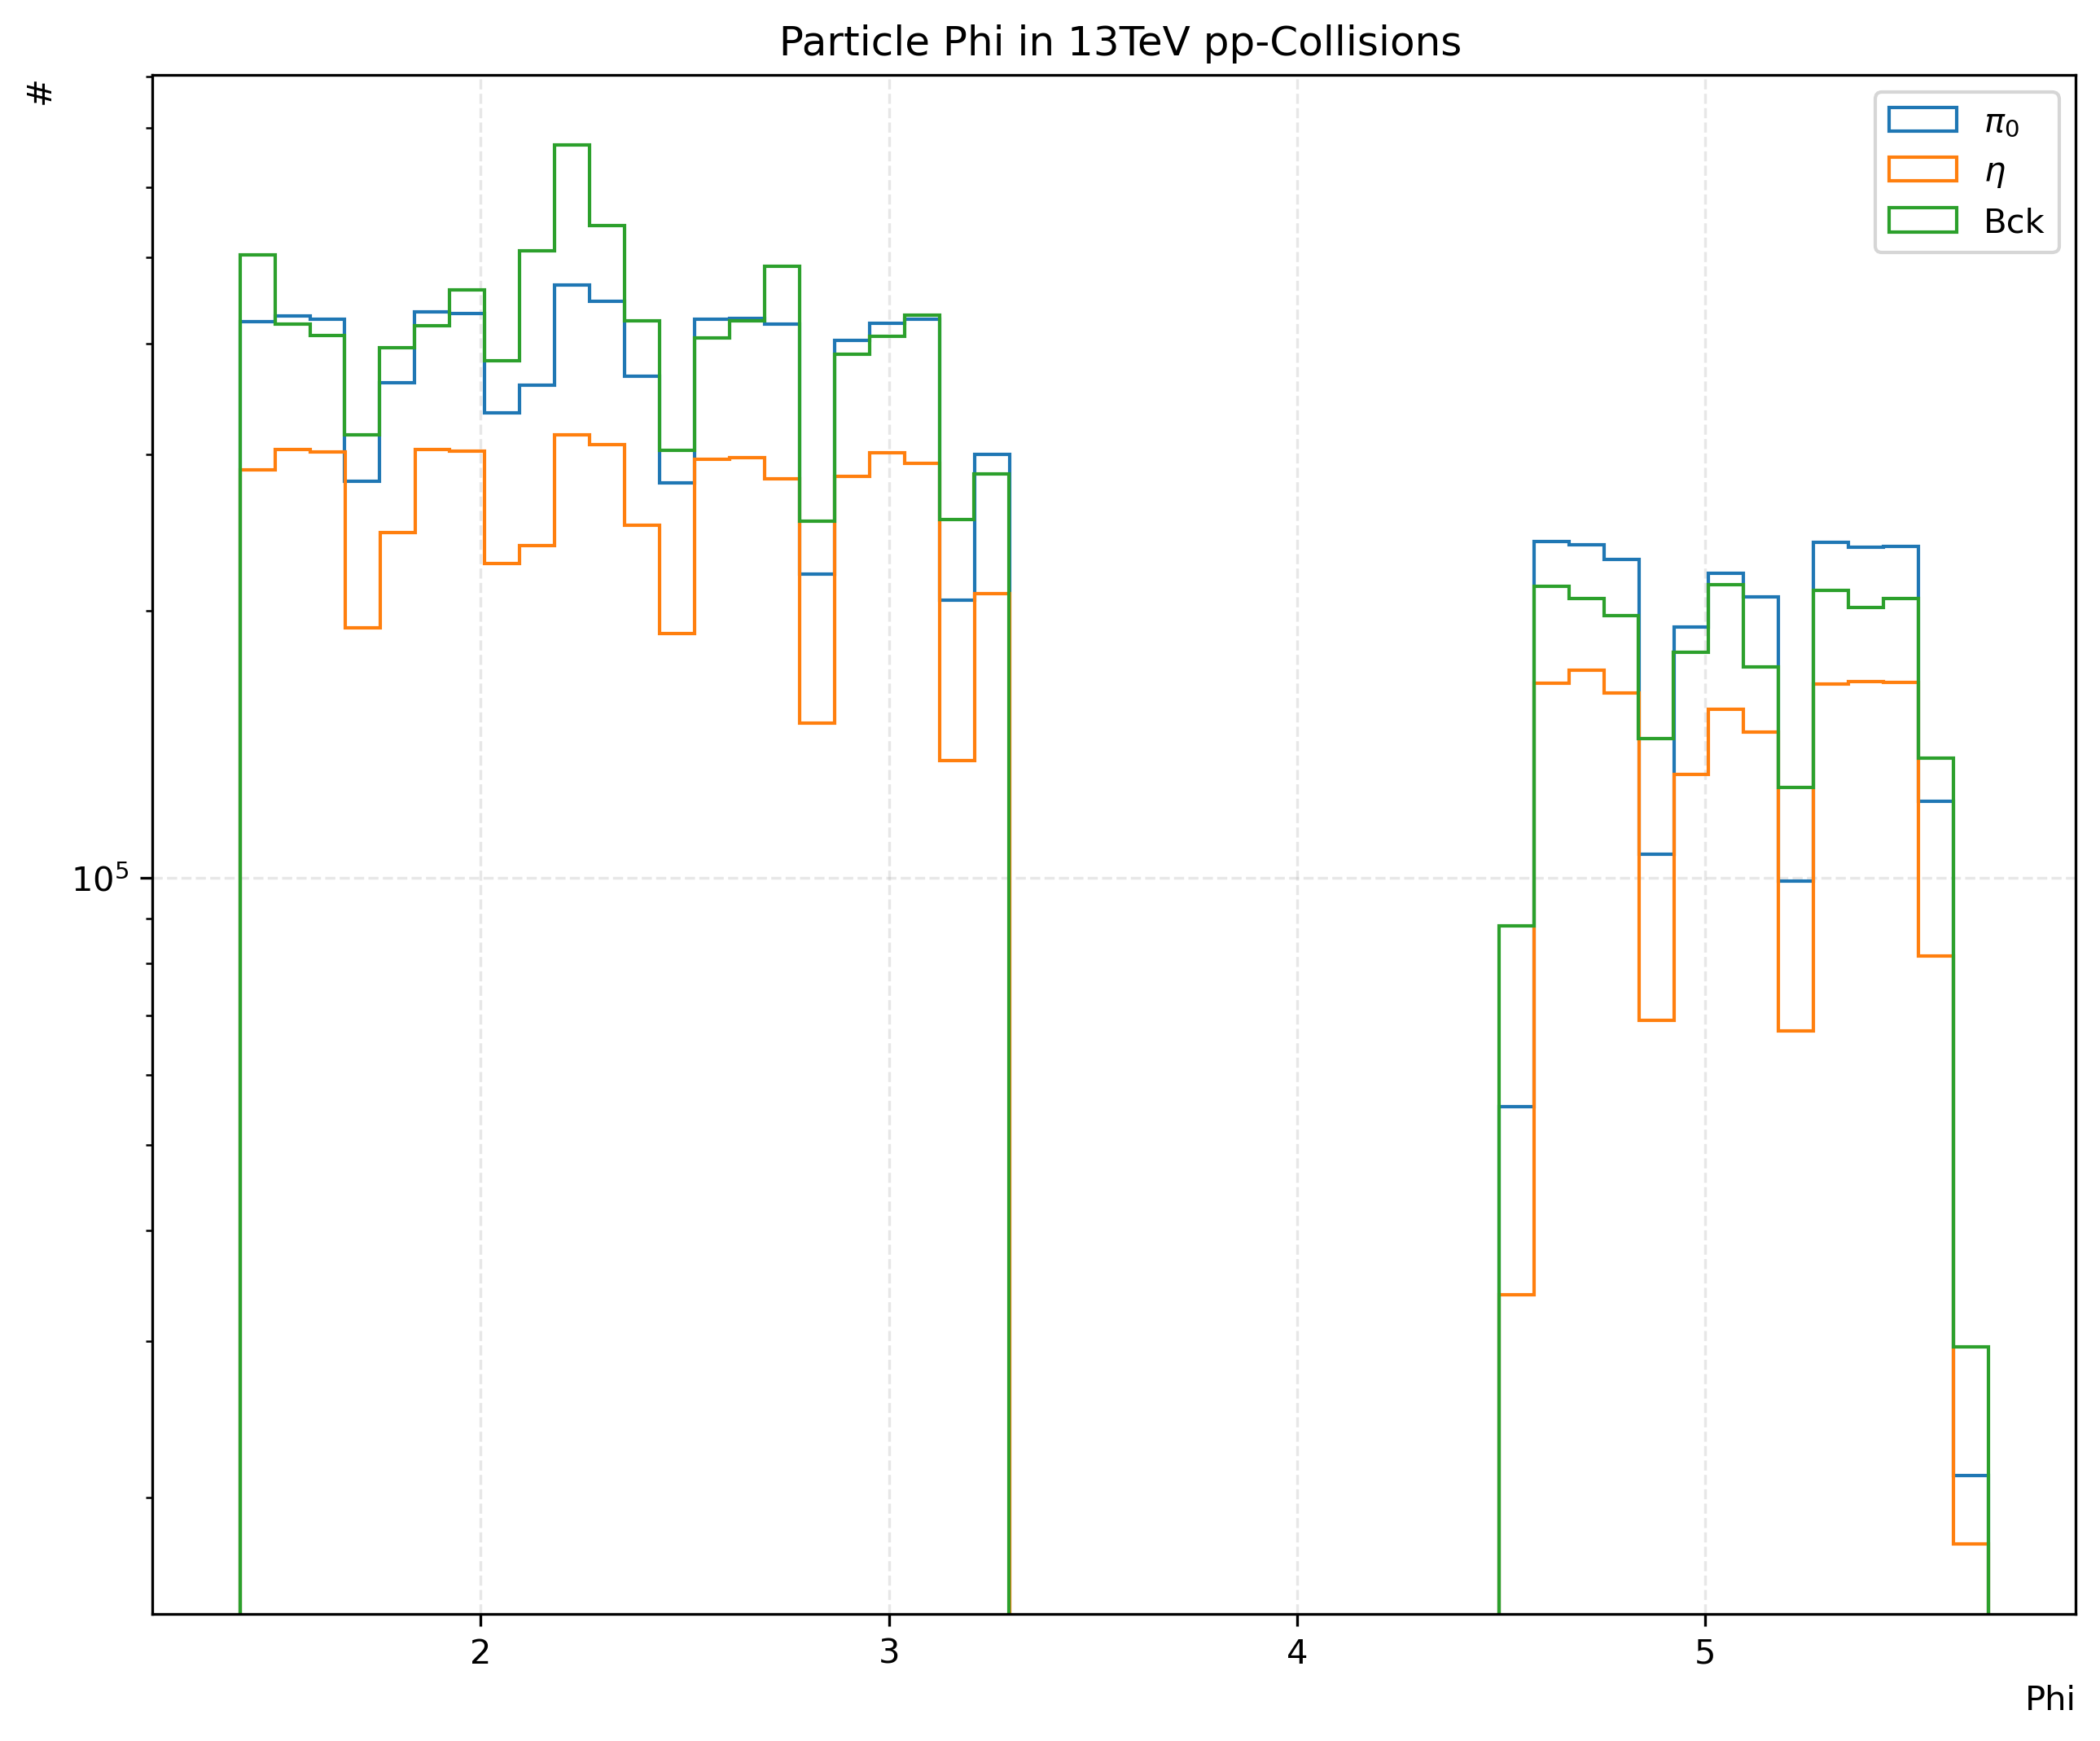

In [57]:
plot_part_phi(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


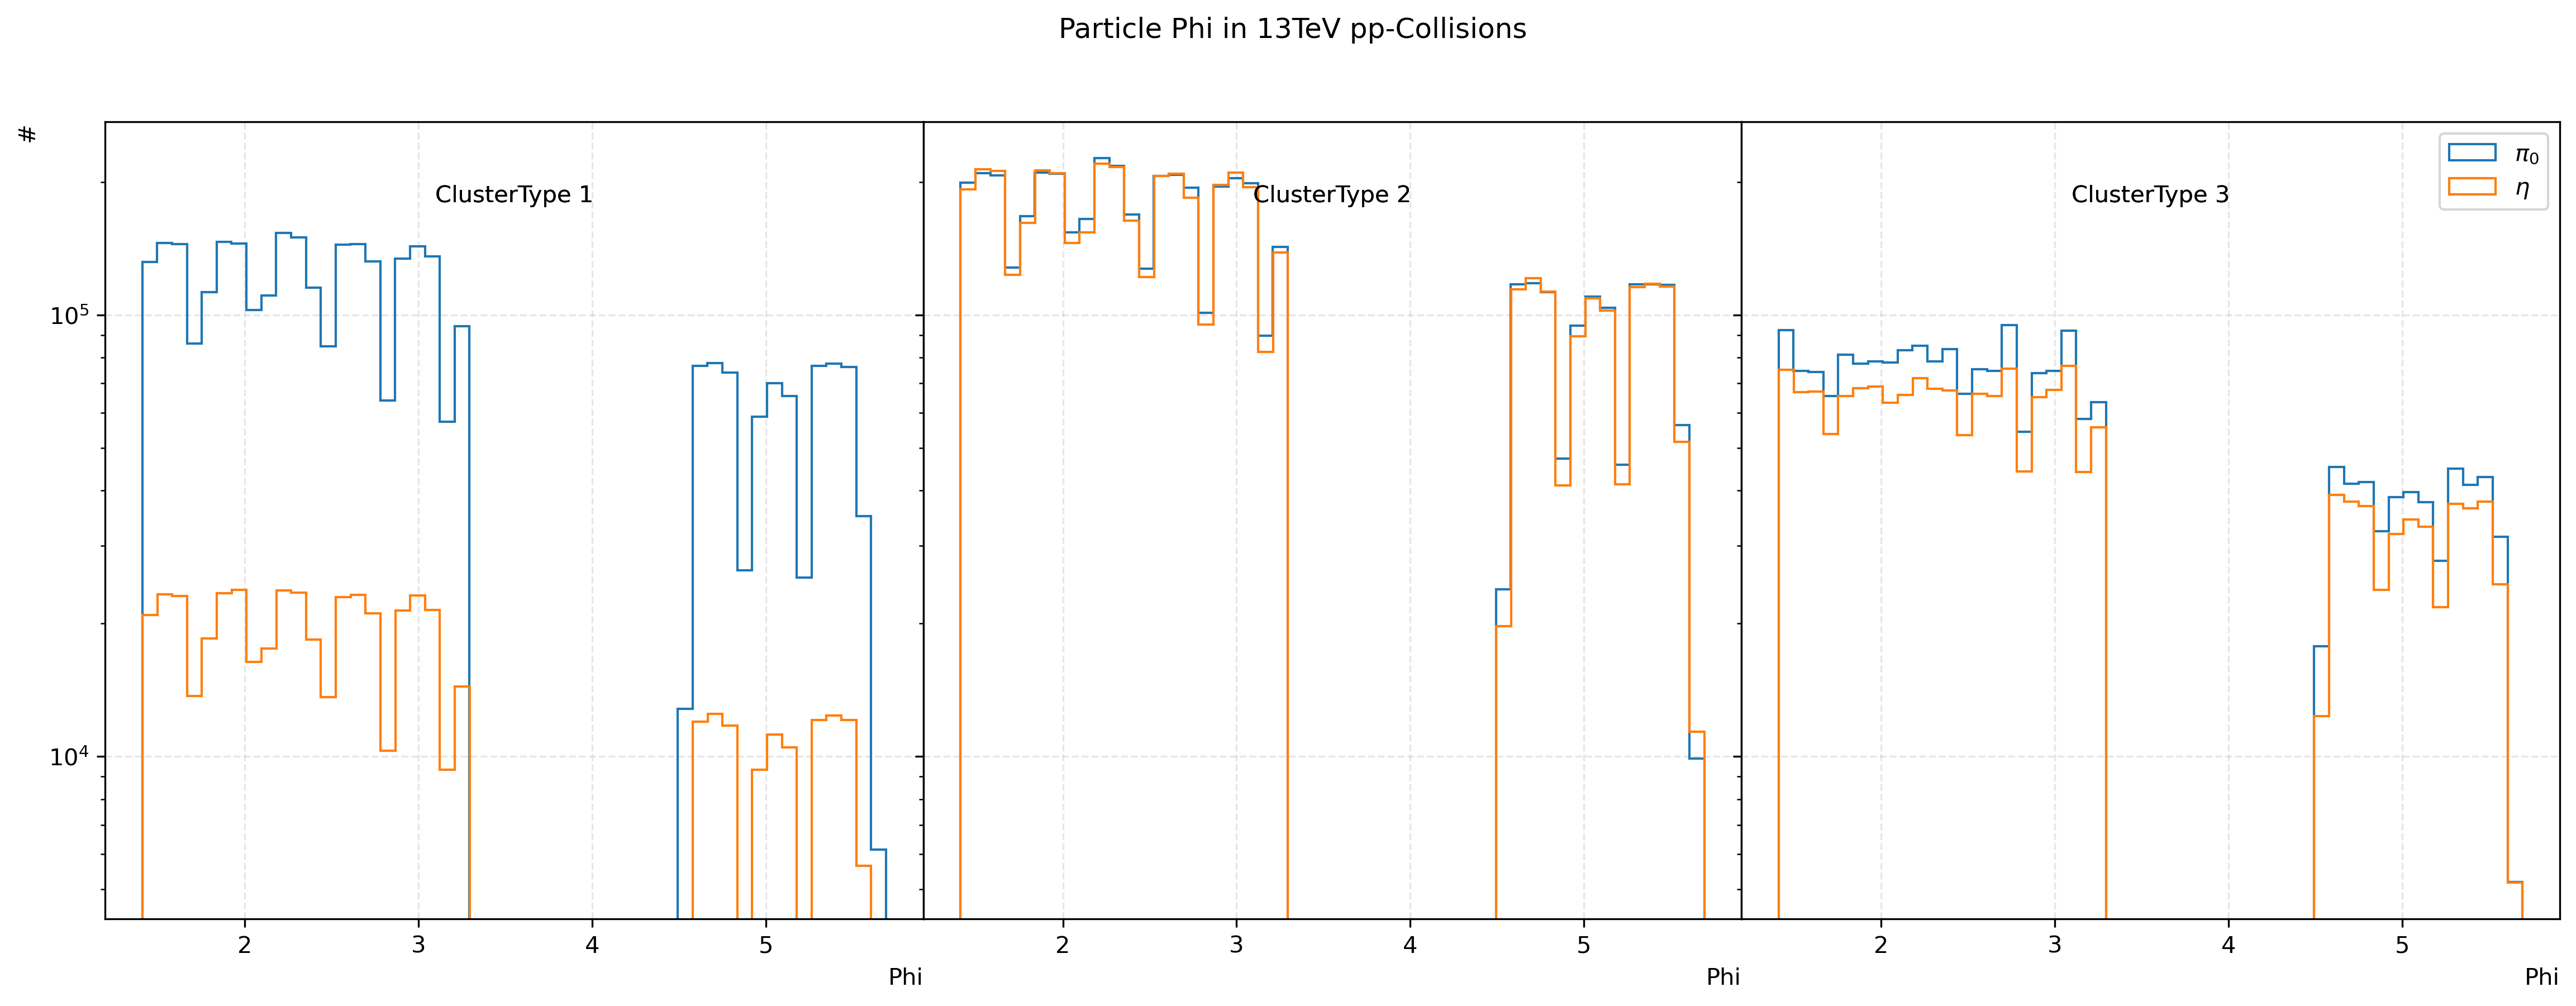

In [58]:
plot_part_phi_cltype(dicts[0:2], labels[0:2])

In [59]:
def plot_part_eta(dict_list, labels):
    ax = single_plot()
    for i, dic in enumerate(dict_list):
        ax.hist(dic["PartEta"], bins=50, histtype='step', log=True, label=labels[i])
    ax.set_title(" Particle Eta in 13TeV pp-Collisions")
    ax.set_xlabel("Eta", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/parteta.pdf", dpi=300, bbox_inches='tight')
    
def plot_part_eta_cltype(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["PartEta"][dic["ClusterType"] == i+1], bins=50, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Eta", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(0.5,0.9,"ClusterType {}".format(i+1), horizontalalignment='center', transform=ax.transAxes)
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle("Particle Eta in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/parteta_type.pdf", dpi=300, bbox_inches='tight')

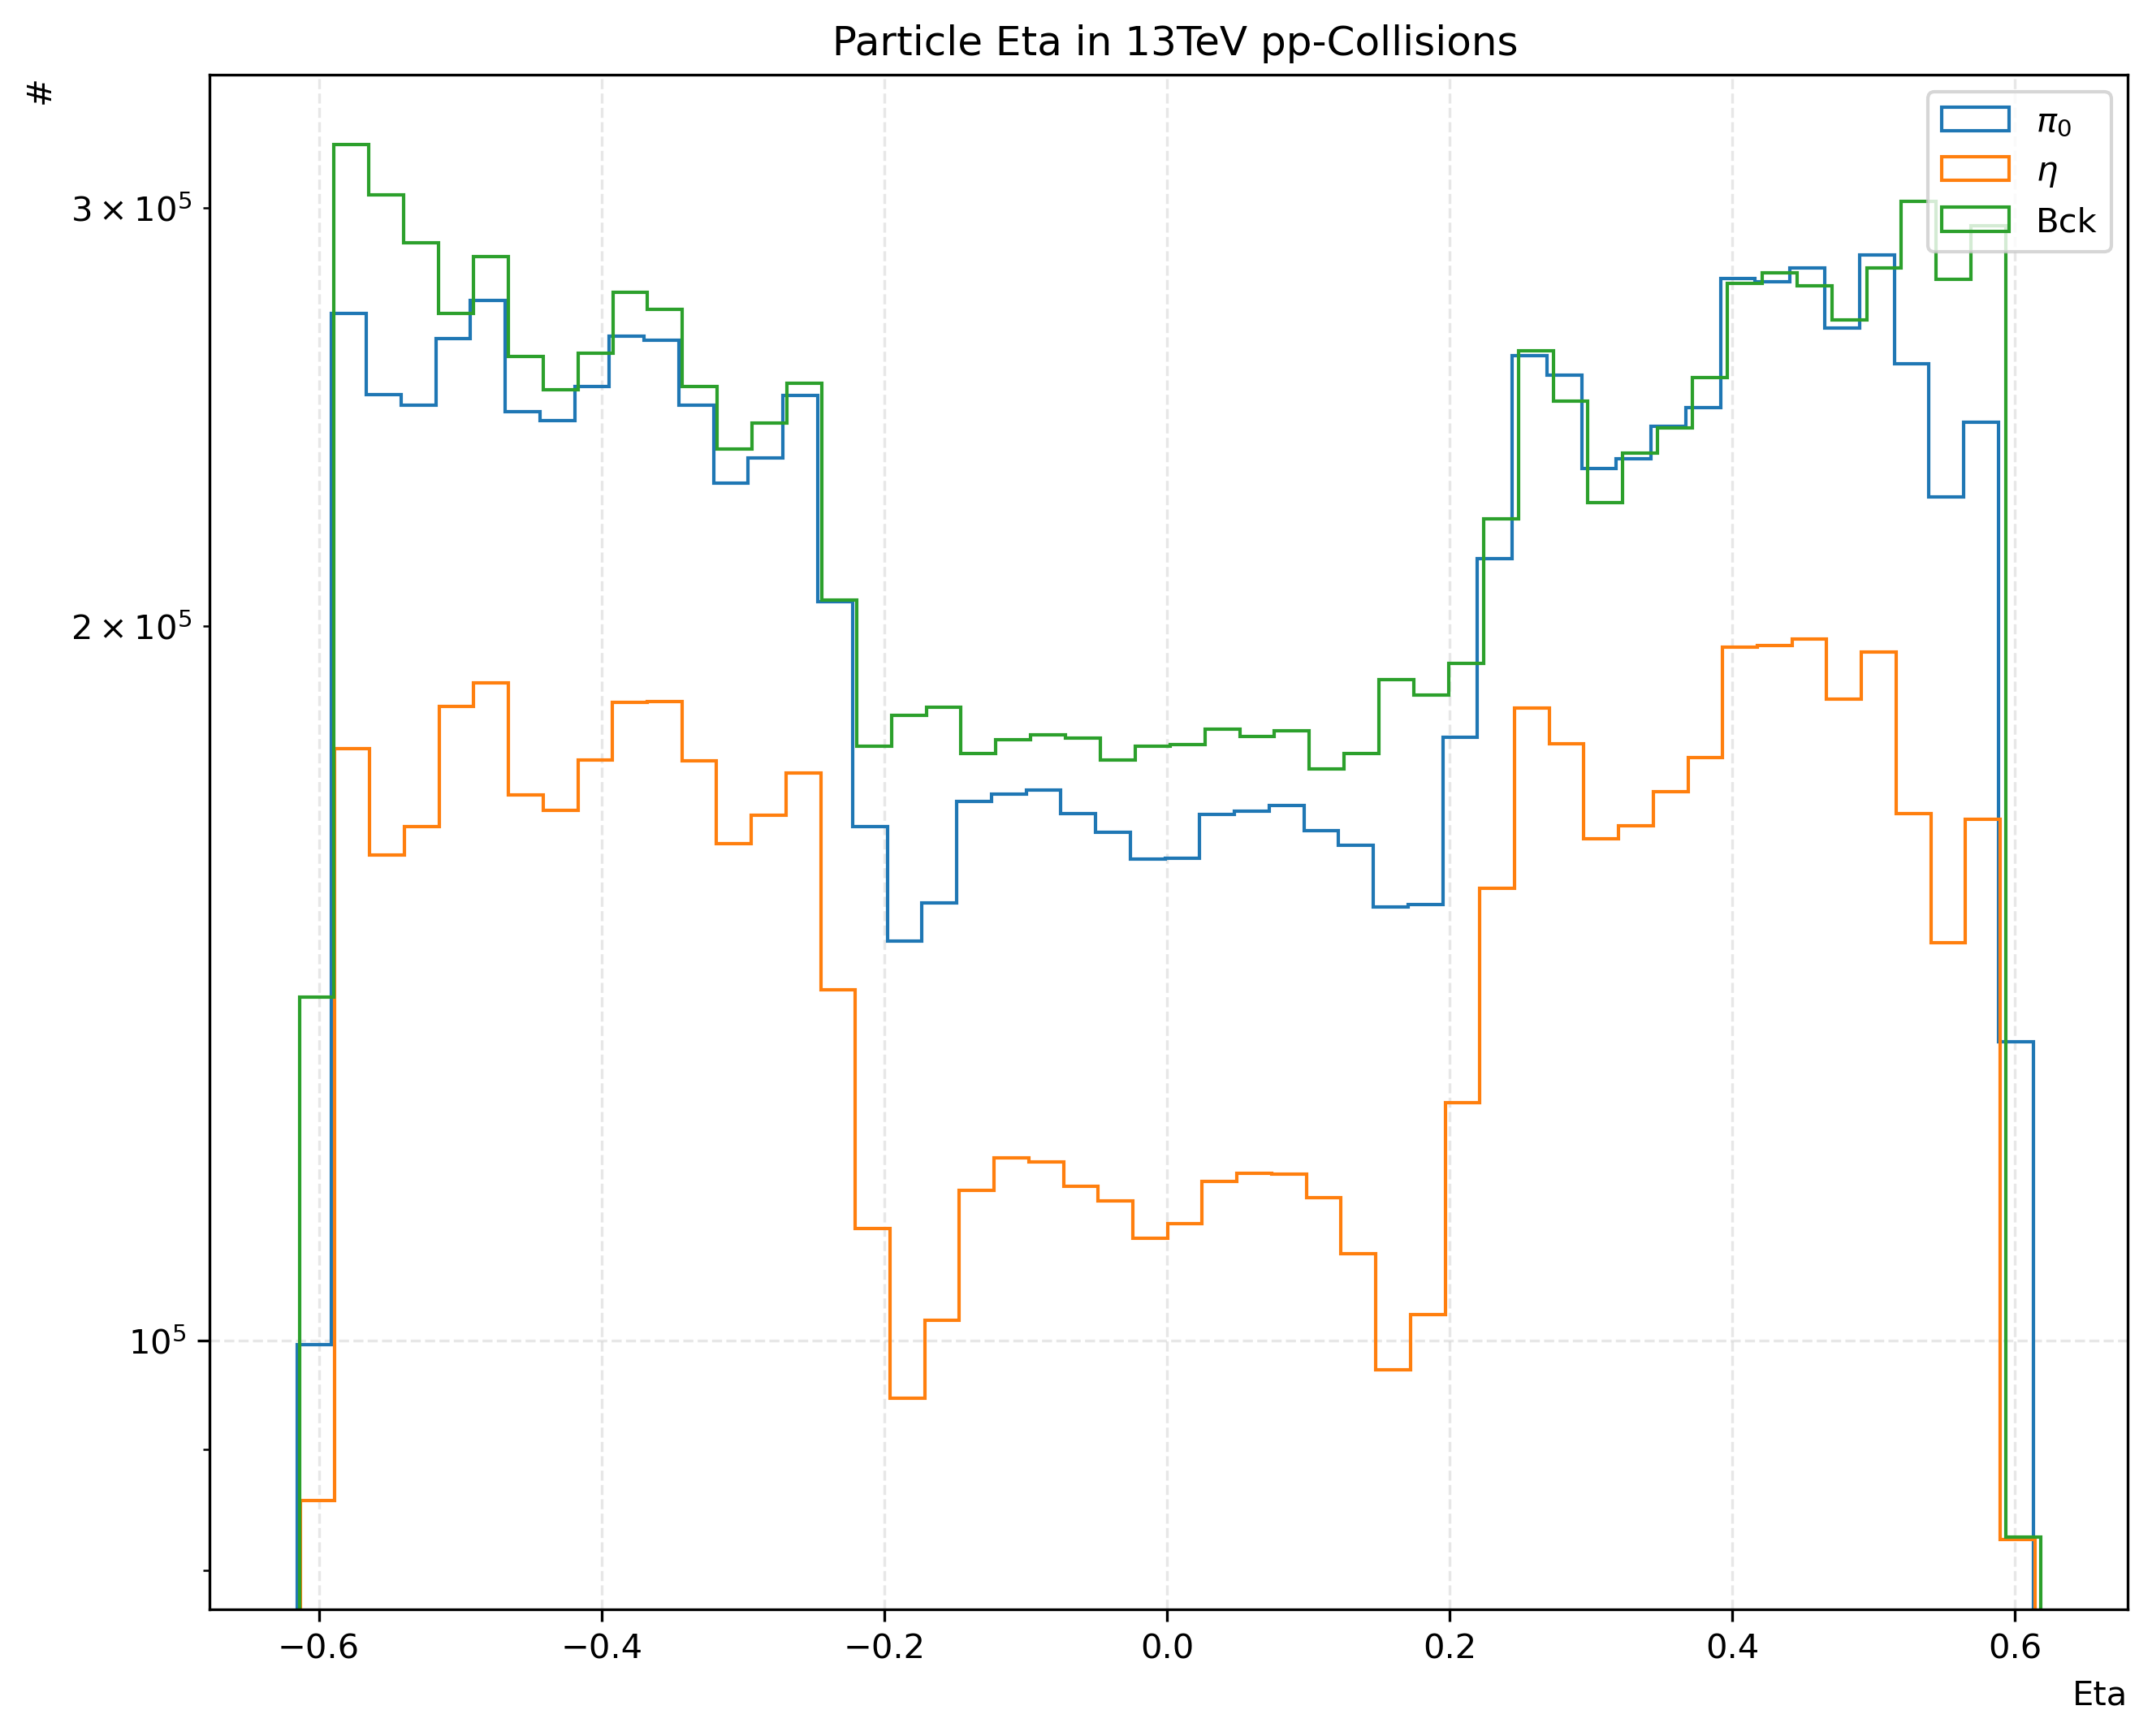

In [60]:
plot_part_eta(dicts, labels)

π0 ClusterType 1: 3438419.0
η ClusterType 1: 547969.0
π0 ClusterType 2: 5121329.0
η ClusterType 2: 5027857.0
π0 ClusterType 3: 2168265.0
η ClusterType 3: 1829294.0


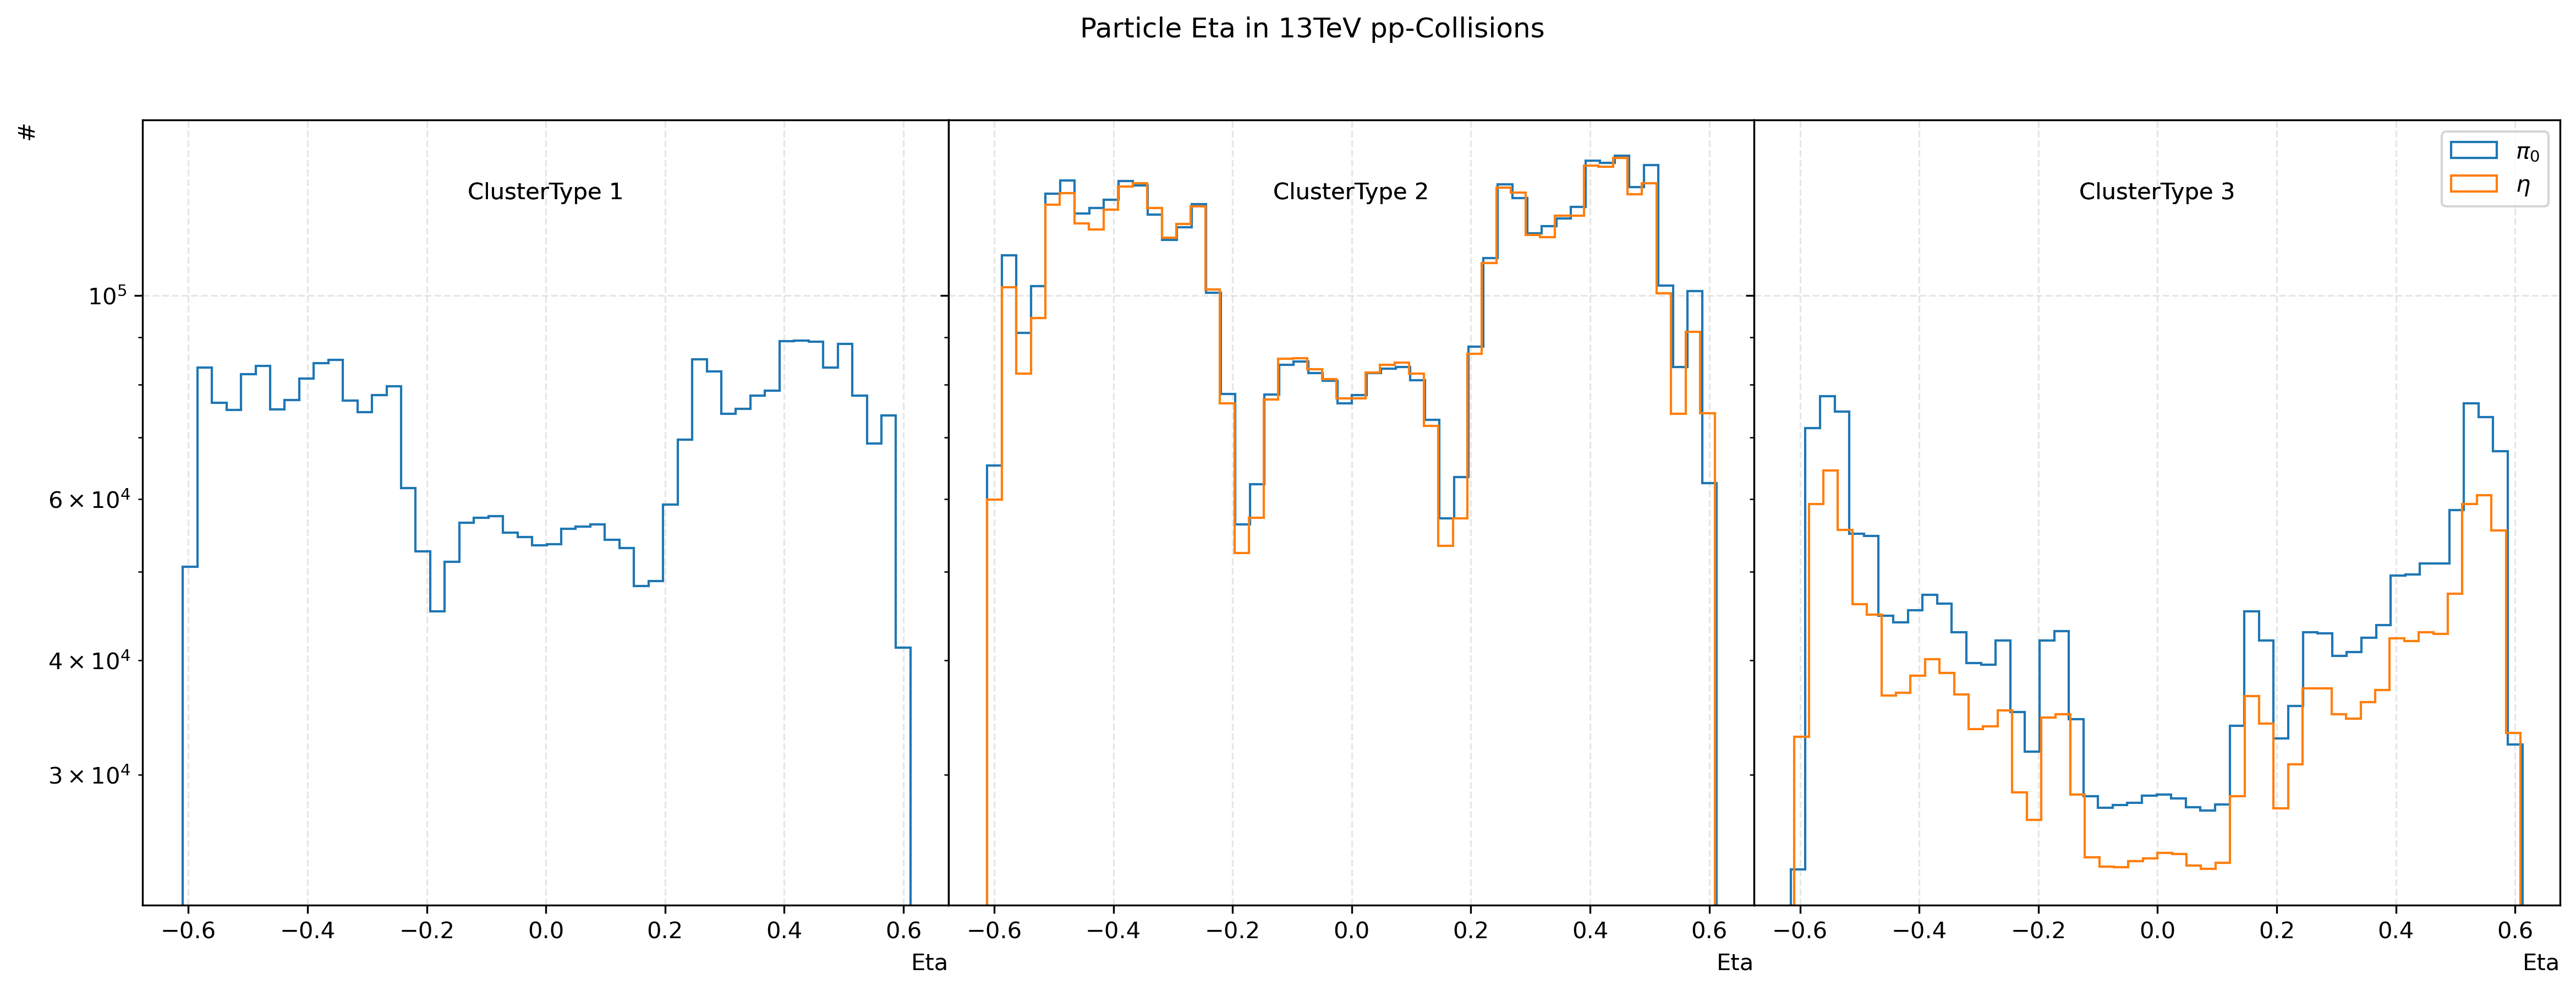

In [61]:
plot_part_eta_cltype(dicts[0:2], labels[0:2])

## Comparision Plots

In [62]:
def plot_comp_e(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        dic = dict_list[i]
        ax.hist(dic["ClusterE"], bins=100, histtype='step', log=True, label='Cluster Energy')
        ax.hist(dic["PartE"], bins=100, histtype='step', log=True, label='Particle Energy')
        ax.set_xlabel("Energy [GeV]", loc='right')
        if(i == 0):
            ax.set_ylabel("#", loc='top')
        ax.grid(b=True, linestyle='--', alpha=0.3)
        ax.text(0.5,0.9,"{}".format(labels[i]), horizontalalignment='center', transform=ax.transAxes)
        ax.legend()
        
            
    plt.suptitle("Comparing Particle and Cluster Energy in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    
    
    plt.savefig("Plots/comp_e.pdf", dpi=300, bbox_inches='tight')

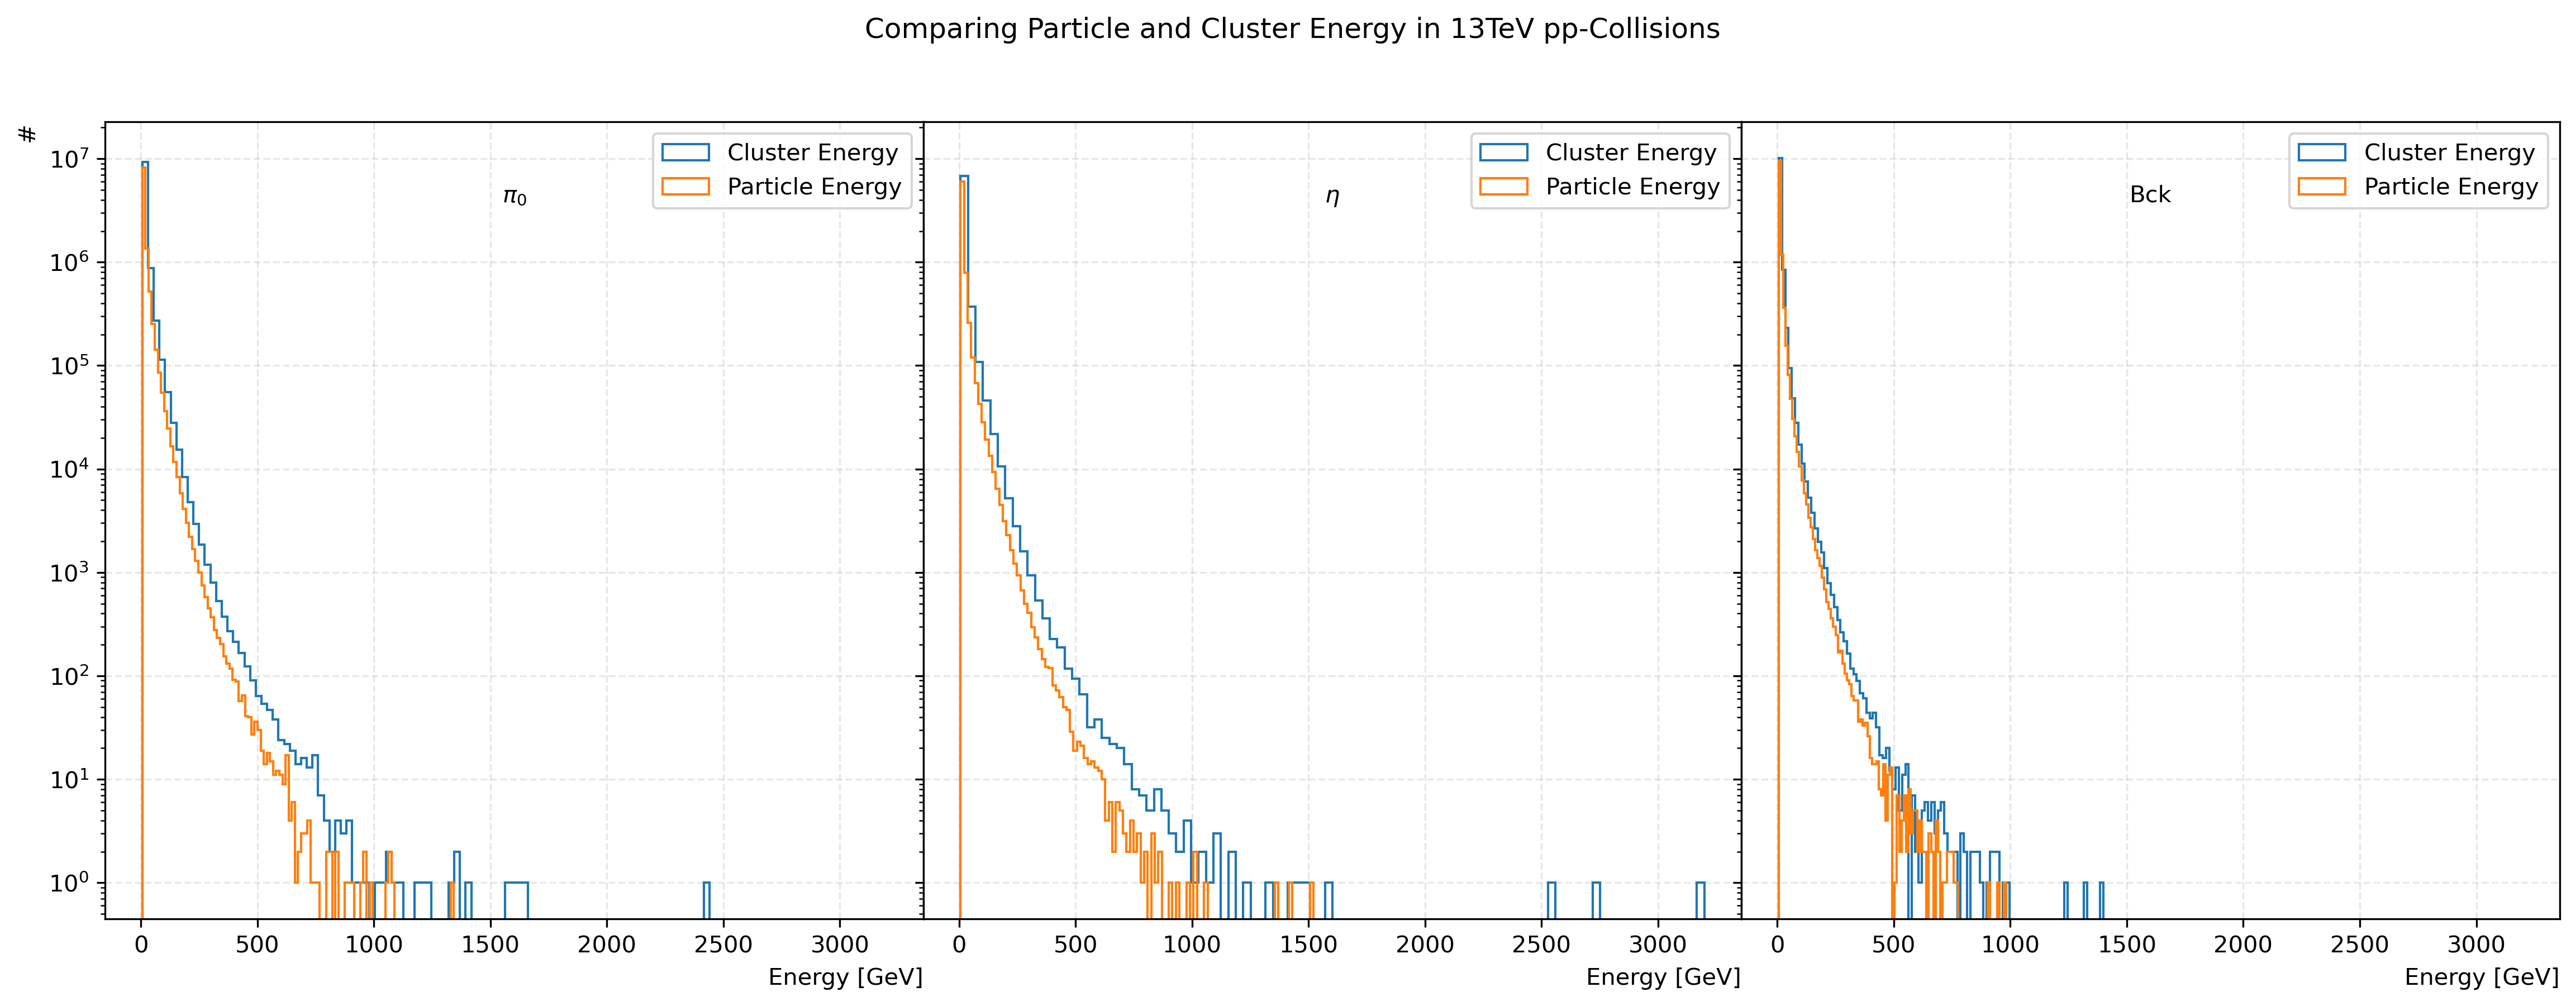

In [63]:
plot_comp_e(dicts, labels)

In [64]:
def plot_comp_pt(dict_list, labels):
    fig, axs = cl_plot()
    for i in range(3):
        ax = axs[i]
        dic = dict_list[i]
        ax.hist(dic["ClusterPt"], bins=100, histtype='step', log=True, label='Cluster Pt')
        ax.hist(dic["PartPt"], bins=100, histtype='step', log=True, label='Particle Pt')
        ax.set_xlabel("Pt [GeV]", loc='right')
        if(i == 0):
            ax.set_ylabel("#", loc='top')
        ax.grid(b=True, linestyle='--', alpha=0.3)
        ax.text(0.5,0.9,"{}".format(labels[i]), horizontalalignment='center', transform=ax.transAxes)
        ax.legend()
        
            
    plt.suptitle("Comparing Particle and Cluster Pt in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    
    
    plt.savefig("Plots/comp_pt.pdf", dpi=300, bbox_inches='tight')

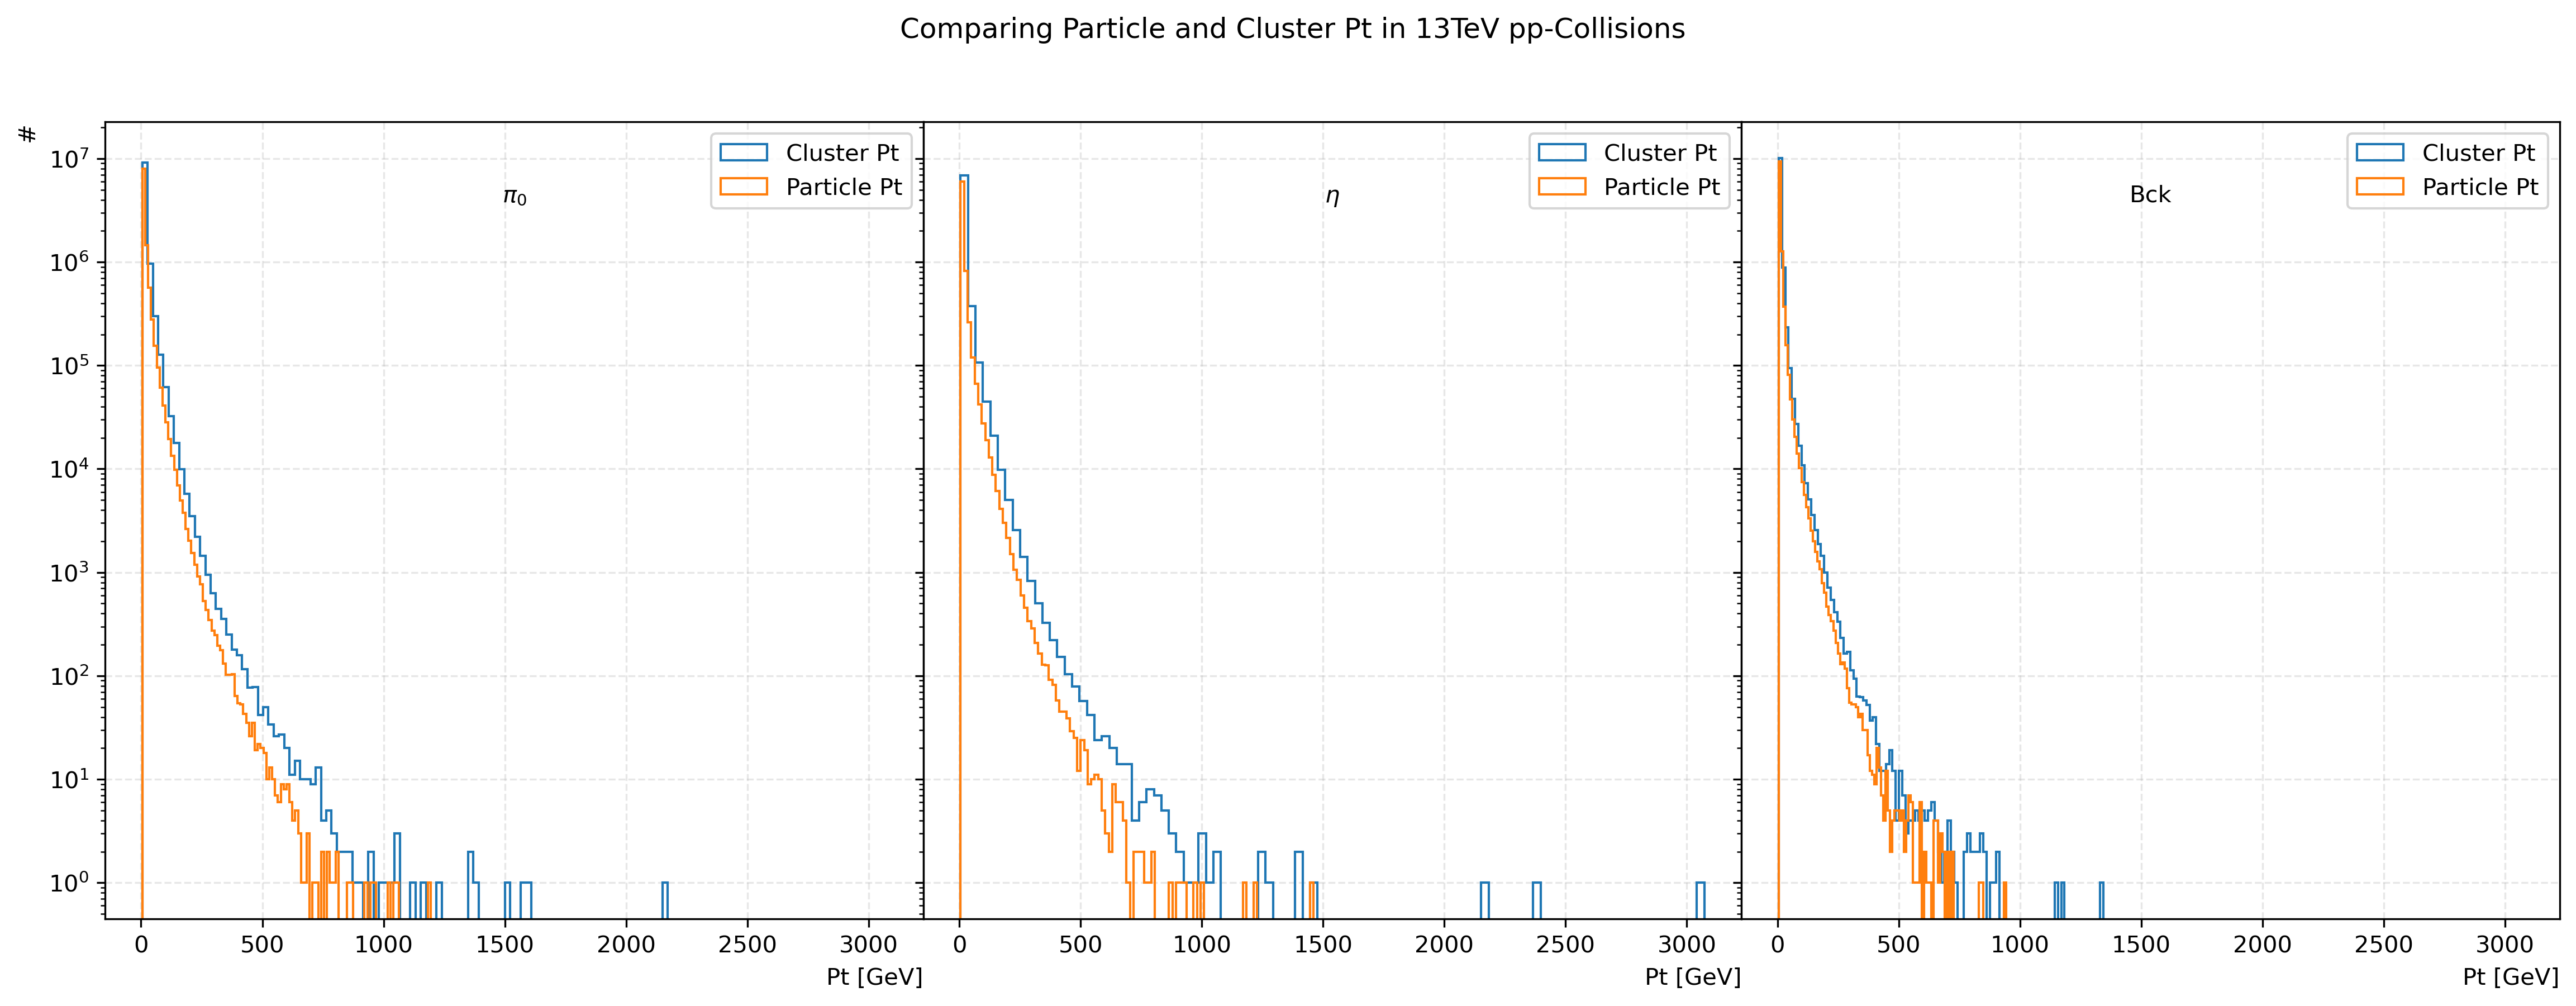

In [65]:
plot_comp_pt(dicts, labels)

In [66]:
def save_dicts(path, dic):
    if dic != bck:
        np.savez_compressed(path, ClusterN=dic["ClusterN"], Cluster=dic["Cluster"] 
                        , ClusterTiming=dic["ClusterTiming"], ClusterType=dic["ClusterType"], ClusterE=dic["ClusterE"]
                        ,ClusterPt=dic["ClusterPt"], ClusterModuleNumber=dic["ClusterModuleNumber"]
                        ,ClusterCol=dic["ClusterCol"], ClusterRow=dic["ClusterRow"], ClusterM20=dic["ClusterM20"]
                        ,ClusterM02=dic["ClusterM02"], ClusterDistFromVert = dic["ClusterDistFromVert"]
                        , PartE=dic["PartE"], PartPt=dic["PartPt"], PartEta=dic["PartEta"]
                        ,PartPhi=dic["PartPhi"], PartIsPrimary=dic["PartIsPrimary"], PartPID=dic["PartPID"])

    else:
        np.savez_compressed(path, ClusterN=dic["ClusterN"], Cluster=dic["Cluster"] 
                        , ClusterTiming=dic["ClusterTiming"], ClusterType=dic["ClusterType"], ClusterE=dic["ClusterE"]
                        ,ClusterPt=dic["ClusterPt"], ClusterModuleNumber=dic["ClusterModuleNumber"]
                        ,ClusterCol=dic["ClusterCol"], ClusterRow=dic["ClusterRow"], ClusterM20=dic["ClusterM20"]
                        ,ClusterM02=dic["ClusterM02"], ClusterDistFromVert = dic["ClusterDistFromVert"]
                        , PartE=dic["PartE"], PartPt=dic["PartPt"], PartEta=dic["PartEta"]
                        , PartPhi=dic["PartPhi"],  PartPID=dic["PartPID"])

In [67]:
save_dicts('Data-Raw/pi0', pi0)

In [ ]:
save_dicts('Data-Raw/eta', eta)

In [ ]:
save_dicts('Data-Raw/bck', bck)